
# Credit Risk Analysis

**One of the leading banks would like to predict bad customer while customer applying for loan. This model also called as PD Models (Probability of Default)**

**Credit scoring is perhaps one of the most "classic" applications for predictive modeling, to predict whether or not credit extended to an applicant will likely result in profit or losses for the lending institution. There are many variations and complexities regarding how exactly credit is extended to individuals, businesses, and other organizations for various purposes. But in all cases, a lender provides money to an individual or institution, and expects to be paid back in time with interest commensurate with the risk of default. Credit scoring is the set of decision models and their underlying techniques that aid lenders in the granting of consumer credit. These techniques determine who will get credit, how much credit they should get, and what operational strategies will enhance the profitability of the borrowers to the lenders. Further, they help to assess the risk in lending. Credit scoring is a dependable assessment of a person’s credit worthiness since it is based on actual data.**

**A lender commonly makes two types of decisions: first, whether to grant credit to a new applicant, and second, how to deal with existing applicants, including whether to increase their credit limits. In both cases, whatever the techniques used, it is critical that there is a large sample of previous customers with their application details, behavioral patterns, and subsequent credit history available. Most of the techniques use this sample to identify the connection between the characteristics of the consumers and their subsequent history.**



### **Data Description**: An Overview

 **This public dataset can be found on this [link](https://www.kaggle.com/code/llnormll/improve-model-performance-by-feature-selection/data?select=loan)**
   <BR>**This is a credit history of the customers from a financial institution.Agenda is to predict for possible credit defaulters upfront and help the financial institutions to take step accordingly.**
   <BR>**'member_id'**------------------**A unique LC assigned Id for the borrower member**
    <BR>**'loan_amnt'**-----------------**The listed amount of the loan applied for by the borrower**
   <BR>**'funded_amnt'**------------**actual amount funded to loans**
   <BR> **'term'**----------------- **The number of payments on the loan. Values are in months and can be either 36 or 60.**
   <BR> **'int_rate'**-------------- **interest rate**
   <BR> **'installment'**------------- **monthly payment** 
    <BR>**'grade'**---------------**Loan Creditor assigned loan grade**
   <BR> **'sub_grade'**----------------**credit rating**
    <BR>**'emp_length'**----------------**number of years of employment**
    <BR>**'home_ownership'**-------------------- **home ownership status of each borrower**
   <BR> **'issue_d'**-----------------**the month which the loan was funded**
    <BR>**'loan_status'**--------------- **current status of the loan (=target variable)**
     <BR> **'purpose'**------------------ **purpose of the loan**
   <BR> **'dti'**---------------------- **debt to monthly income ratio**
    <BR>**'delinq_2yrs'**-------------------- **number of 30+ days past-due incidences for last two years**
    <BR>**'earliest_cr_line'**---------------- **date each borrower's earliest reported credit line was opened**
   <BR> **'inq_last_6mths'**--------------------**number of inquiries in past 6 months**
    <BR>**'total_acc'**--------------------- **total number of credit lines** 
    <BR>**'pub_rec'** -------------------**number of derogatory public records**
   <BR>**'revol_bal'**--------------------------**total credit revolving balance**
    <BR>**'revol_util'**--------------------**total revolving utilization rate** 
    <BR>**'total_rec_late_fee'**-----------------**late fees received to date** 
    <BR>**'recoveries'**---------------**post charge off gross recovery**
    <BR>**'last_pymnt_d'**-----------------------**last month payment was received**
    <BR>**'last_pymnt_amnt'**---------------- **last month payment amount**
    <BR>**'last_credit_pull_d'**------------------ **the most recent month LC pulled credit for this loan**
    <BR>**'acc_now_delinq'** -------------------- **The number of accounts on which the borrower is now delinquent**
    <BR> **'total_pymnt'**--------------------- **total payments received to date**
    <BR>**'annual_inc'**------------**annual income**

# Notebook Description:

This notebook can be considered as a guide to **"End-to-End Steps in a Machine Learning Model"** to the best of my knowledge <br>
The steps described here are obviously not exhaustive and may require manual interventions according to individual project <br>

***
### Contents
**[Step 1: Development And Validation Sample](#Step-1:-Selecting-Development-&-Validation-Sample)**<br>
**[Step 2: Data Preparation](#Step-2:-Data-Preparation-:-EDA,-Preprocessing-and-Feature-Engineering)**<br>
**[Step 3: Feature Selection](#Step-3:-Feature-Selection)**<br>
**[Step 4: Model Development](#Step-4:-Model-Training-and-Hyperparameter-Tuning)**<br>
**[Step 5: Model Scoring](#Step-5:-Model-Scoring-&-Business-KPIs)**


***
Click on the links to Navigate to different sections

# Step 1: Selecting Development & Validation Sample
#### Select the Development and Validation Sample according to the availability of data - Can vary with kind of project <br>
**Development Sample**:
- This is the sample on which you'll prepare the Model
- All EDA, Pre-processing, Feature Engineering will be done on this sample <br>

**Validation Sample**
- This is the sample on which the model will be scored
- All features used in the model will be created separately in this data
- Only features that are selected in the final model will be derived from this sample
- Any preprocessing steps performed on Development sample will also have to be performed here with numbers derived from development sample
- For example, if you have used StandardScaler to normalize numeric features in Development sample, you have to use the same (Mean, std) from development sample to normalize the validation sample


#### Firstly, making label column (Target Variable)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

In [2]:
data=pd.read_csv('Downloads/loan.csv')

In [3]:
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,01-12-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,01-01-1985,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,01-01-2015,171.62,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,01-12-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,01-04-1999,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,01-04-2013,119.66,NaN,01-09-2013,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,01-12-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,01-11-2001,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,01-06-2014,649.91,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,01-12-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,01-02-1996,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,01-01-2015,357.48,NaN,01-01-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,01-12-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,01-01-1996,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,01-01-2016,67.79,Feb-16,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(887379, 74)

### Data Cleaning and Formatting
<BR>**There are 74 features in this dataset, and many of them show minor usability (mostly filled with NaNs, no variance, or duplicated to another). So I manually filtered the features that I found the most useful.**

In [5]:
attribs_to_use = [
    'member_id', 
    'loan_amnt',
    'funded_amnt',          # actual amount funded to loans
    'term',                 # number of payments (month)
    'int_rate',             # interest rate
    'installment',          # monthly payment 
    'grade',                #LC assigned loan grade
    'sub_grade',            # credit rating
    'emp_length',           # number of years of employment
    'home_ownership',       # home ownership status of each borrower
    'issue_d',              # the month which the loan was funded
    'loan_status',          # current status of the loan (=target variable)
    'purpose',              # purpose of the loan
    'dti',                  # debt to monthly income ratio
    'delinq_2yrs',          # number of 30+ days past-due incidences for last two years
    'earliest_cr_line',     # date each borrower's earliest reported credit line was opened
    'inq_last_6mths',       # number of inquiries in past 6 months
    'total_acc',            # total number of credit lines 
    'pub_rec',              # number of derogatory public records
    'revol_bal',            # total credit revolving balance
    'revol_util',           # total revolving utilization rate 
    'total_rec_late_fee',   # late fees received to date 
    'recoveries',           # post charge off gross recovery
    'last_pymnt_d',         # last month payment was received
    'last_pymnt_amnt',      # last month payment amount
    'last_credit_pull_d',   # the most recent month LC pulled credit for this loan
    'acc_now_delinq',       # number of delinquent accounts
     'total_pymnt',          # total payments received to date
    'annual_inc'
]

data1 = data[attribs_to_use]

In [6]:
data1.shape

(887379, 29)

In [7]:
data1.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,total_acc,pub_rec,revol_bal,revol_util,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,total_pymnt,annual_inc
0,1296599,5000,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,01-12-2011,Fully Paid,credit_card,27.65,0.0,01-01-1985,1.0,9.0,0.0,13648,83.7,0.00,0.00,01-01-2015,171.62,01-01-2016,0.0,5861.071414,24000.0
1,1314167,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,01-12-2011,Charged Off,car,1.00,0.0,01-04-1999,5.0,4.0,0.0,1687,9.4,0.00,117.08,01-04-2013,119.66,01-09-2013,0.0,1008.710000,30000.0
2,1313524,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,01-12-2011,Fully Paid,small_business,8.72,0.0,01-11-2001,2.0,10.0,0.0,2956,98.5,0.00,0.00,01-06-2014,649.91,01-01-2016,0.0,3003.653644,12252.0
3,1277178,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,01-12-2011,Fully Paid,other,20.00,0.0,01-02-1996,1.0,37.0,0.0,5598,21.0,16.97,0.00,01-01-2015,357.48,01-01-2015,0.0,12226.302210,49200.0
4,1311748,3000,3000,60 months,12.69,67.79,B,B5,1 year,RENT,01-12-2011,Current,other,17.94,0.0,01-01-1996,0.0,38.0,0.0,27783,53.9,0.00,0.00,01-01-2016,67.79,01-01-2016,0.0,3242.170000,80000.0


In [8]:
data1.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [9]:
data1['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

 #### Create label Column : Description about loan status

* Issued:Recently issued a fresh loan to borrower
* Current - All outstanding payments are paid up to date
* Fully Paid - All outstanding payments are paid up and loan is finished
* In Grace Period - 1-15 days passed after the due date
* Late (16-30 days) - 16-30 days passed after the due date
* Late (31-120 days) - 31-120 days passed after the due date
* Default - The borrower is not able to make outstanding payments for an extended period of time
* Charged Off - A charge-off usually occurs when the creditor has deemed an outstanding debt is uncollectible
<BR>**In this column, the value 0 will be filled with the correct conditions: 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current'
Meanwhile, the value of 1 will be filled with incorrect conditions: 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'**

In [10]:
# removed the 'Issued' class since these loans just got approved and have not begun any repayment processes yet
issue = data1['loan_status'] == 'Issued'
data_filter_iss = data1[~issue]
cu = data1['loan_status'] == 'Current'

data2 = data_filter_iss[~cu]

label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

In [11]:
data2['loan_status'].value_counts()

Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [15]:
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

data2.loc[:, 'label'] = data2['loan_status'].apply(classify_label)


In [16]:
data2.shape

(277140, 30)

In [19]:
dev_mem = data2.loc[list(dev.index), ['member_id', 'loan_status']]

In [20]:
dev_mem

,member_id,loan_status
52913,11071588,Fully Paid
347762,23362471,Fully Paid
134464,6787204,Fully Paid
51818,10788810,Fully Paid
21482,823300,Fully Paid
...,...,...
106191,8124645,Fully Paid
201450,1751290,Fully Paid
22870,799049,Fully Paid
14798,961275,Fully Paid


In [21]:
val_mem = data2.loc[list(val.index), ['member_id', 'loan_status']]

In [22]:
val_mem

,member_id,loan_status
688882,58830374,Fully Paid
186768,2119269,Fully Paid
159675,4577890,Fully Paid
163153,4219178,Fully Paid
314305,28740876,Default
...,...,...
329795,19255723,Fully Paid
297510,31297275,Late (31-120 days)
79021,9400893,Charged Off
68917,10351097,Fully Paid


In [27]:

pd.concat([dev_mem.loan_status.value_counts(), 
                dev_mem.loan_status.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))


,counts,percentage
Fully Paid,166161,74.944523
Charged Off,36203,16.328841
Late (31-120 days),9246,4.170275
In Grace Period,5011,2.260139
Late (16-30 days),1876,0.846143
Does not meet the credit policy. Status:Fully Paid,1608,0.725265
Default,974,0.439309
Does not meet the credit policy. Status:Charged Off,633,0.285506


In [24]:
dev_mem.shape

(221712, 2)

In [29]:
val_mem.shape

(55428, 2)

In [30]:
data2.member_id.shape

(277140,)

In [28]:

pd.concat([val_mem.loan_status.value_counts(), 
                val_mem.loan_status.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))


,counts,percentage
Fully Paid,41562,74.983763
Charged Off,9045,16.318467
Late (31-120 days),2345,4.230714
In Grace Period,1242,2.240745
Late (16-30 days),481,0.867792
Does not meet the credit policy. Status:Fully Paid,380,0.685574
Default,245,0.442015
Does not meet the credit policy. Status:Charged Off,128,0.230930


### This shows that the distribution of multiple categories in label 0 or 1 has same distribution.

### Forming development , validation dataframe

In [31]:
from sklearn.model_selection import train_test_split

dev,val=train_test_split(data2,test_size=0.2,stratify=data2["label"])

In [32]:
dev.shape

(221712, 30)

In [33]:
val.shape

(55428, 30)

In [34]:
dev.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,total_acc,pub_rec,revol_bal,revol_util,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,total_pymnt,annual_inc,label
92039,8723970,8875,8875,36 months,15.22,308.62,C,C3,1 year,RENT,01-09-2013,Fully Paid,credit_card,16.23,0.0,01-06-2007,0.0,13.0,0.0,5589,67.3,0.00,0.0,01-05-2015,4797.44,01-06-2015,0.0,10660.573530,31200.0,0
451585,12520056,28000,28000,60 months,13.98,651.23,C,C1,5 years,MORTGAGE,01-01-2014,Fully Paid,credit_card,8.41,0.0,01-05-1997,0.0,38.0,0.0,40399,51.8,65.12,0.0,01-11-2015,22350.17,01-10-2015,0.0,34072.310000,170000.0,0
16610,925462,6000,6000,36 months,11.11,196.75,B,B5,5 years,RENT,01-04-2011,Fully Paid,credit_card,24.80,0.0,01-02-2001,3.0,26.0,0.0,8612,69.7,0.00,0.0,01-05-2014,226.74,01-10-2015,0.0,7076.346085,45000.0,0
301642,30955815,12000,12000,60 months,16.99,298.17,D,D3,10+ years,RENT,01-10-2014,Fully Paid,small_business,23.72,0.0,01-02-2001,0.0,16.0,1.0,14544,79.9,0.00,0.0,01-05-2015,11418.67,01-10-2015,0.0,13207.690000,75000.0,0
37347,414634,6000,6000,36 months,14.74,207.23,D,D3,10+ years,MORTGAGE,01-03-2009,Fully Paid,debt_consolidation,4.96,0.0,01-06-1998,2.0,31.0,0.0,3402,47.9,0.00,0.0,01-08-2011,1780.33,01-07-2011,0.0,7371.050000,100824.0,0


In [35]:
val.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,total_acc,pub_rec,revol_bal,revol_util,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,total_pymnt,annual_inc,label
358351,22391027,2500,2500,36 months,12.99,84.23,C,C1,10+ years,MORTGAGE,01-07-2014,Fully Paid,other,17.95,0.0,01-05-2001,0.0,16.0,0.0,6022,88.6,0.0,0.0,01-12-2015,1533.88,01-12-2015,0.0,2881.5600,48000.0,0
316150,28350383,2000,2000,36 months,6.49,61.29,A,A2,10+ years,MORTGAGE,01-08-2014,Fully Paid,debt_consolidation,26.53,0.0,01-04-1996,1.0,25.0,0.0,13949,82.1,0.0,0.0,01-12-2015,1279.01,01-12-2015,0.0,2137.0700,67000.0,0
377370,19827652,14000,14000,36 months,9.17,446.31,B,B1,10+ years,MORTGAGE,01-06-2014,Fully Paid,credit_card,17.49,0.0,01-07-2003,0.0,21.0,0.0,14507,44.2,0.0,0.0,01-02-2015,11715.09,01-06-2015,0.0,14839.2600,90000.0,0
152804,5024000,15000,15000,36 months,12.12,499.08,B,B3,2 years,MORTGAGE,01-04-2013,Fully Paid,debt_consolidation,12.40,1.0,01-01-2000,1.0,37.0,0.0,10798,50.7,0.0,0.0,01-08-2014,9497.25,01-01-2016,0.0,16981.7487,72000.0,0
22008,814994,7000,7000,36 months,14.09,239.55,D,D1,4 years,MORTGAGE,01-12-2010,Fully Paid,debt_consolidation,13.38,1.0,01-10-1997,1.0,20.0,0.0,13024,86.3,0.0,0.0,01-01-2014,252.83,01-01-2016,0.0,8621.6300,61240.0,0


In [36]:
val.to_csv("Downloads/Validation_Sample.csv", index = False)
val.to_csv("Downloads/Development_Sample.csv", index = False)

In [37]:
print("Development Sample Dimension: {}".format(dev.shape))
print("Development Target Ratio: \n{}".format(dev.label.value_counts()))
print("Event Rate: %0.2f%%" %((dev.label.value_counts()[1]/(dev.label.value_counts()[0]+dev.label.value_counts()[1]))*100))

Development Sample Dimension: (221712, 30)
Development Target Ratio: 
0    167769
1     53943
Name: label, dtype: int64
Event Rate: 24.33%


In [38]:
print("Validation Sample Dimension: {}".format(val.shape))
print("Validation Target Ratio: \n{}".format(val.label.value_counts()))
print("Event Rate: %0.2f%%" %((val.label.value_counts()[1]/(val.label.value_counts()[0]+val.label.value_counts()[1]))*100))

Validation Sample Dimension: (55428, 30)
Validation Target Ratio: 
0    41942
1    13486
Name: label, dtype: int64
Event Rate: 24.33%


# <center> End of Step 1
**[Click here to go back to Content](#Notebook-Description:)**

# Step 2: Data Preparation : EDA, Preprocessing and Feature Engineering

#### Data Preparation step will take the raw development sample as input and return a clean, processed dataframe which will be the input of our model

- **EDA**: Perform Basic EDA on development sample
  - Understand the data - read and understand column description - Interpret a sample of rows
  - Check data types and seggregate numeric, categorical and date variables
  - In case of inconsistancy of datatype, first convert the variables into its correct datatype - For example, if date variable has come as object, convert it to datetime format
  - Check missing values - identify the variables with missing values
  - Find out insights from the data - each insights will then be converted into features

- **Pre-Processing**: Imputation, Encoding, Normalization of development sample - do not overwrite
  - Imputation of missing values can be done by mean, median, zero depending on the variable and its interpretation - There is no one-fit-all solution of missing value imputation
  - Convert categorical variables to numeric using Label encoding, target encoding or creating dummies
  - Normalize or Scale numeric features

- **Feature Engineering**: Create features using development sample
  - Use weight of evidence (if applicable) and create woe features
  - Craete binary flag variable from the insights derived in EDA
  - Think and create as much as features as possible - can be intuitive - can be mathematical like interactive features, polynomial features
  
- **Bringing Everything Together**: Final feature list will include
  - ID, Target
  - Dummy variables of categorical raw features
  - Scaled numeric features
  - WOE features
  - User Derived Features
  - Ideallly the Output dataframe should contain (N+2) features where N is the total number of features created



## 1. EDA

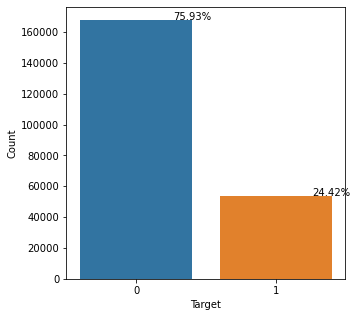

In [39]:
import seaborn as sns
plt.figure(figsize=(5,5))
ax=sns.countplot(x="label",data=dev)
plt.xlabel("Target")
plt.ylabel("Count")
for p in ax.patches:
    percentage='{:.2f}%'.format(100*p.get_height()/220941)
    x=p.get_x()+p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y),ha='center')
plt.show()

#### Finding: The Proportion of two classes in the dataset is very different so we interpret that our dataset is imbalanced.

In [40]:
raw_feat=dev.columns

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

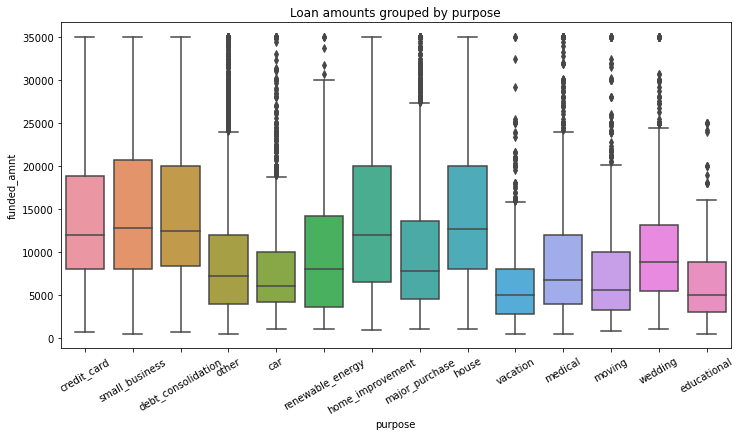

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='funded_amnt', data=dev)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

In [42]:
dev_copy = dev.copy(deep=True)

### Create User Derived Features
- Convert each **Insight** obtained from EDA into a Binary Flag variable
- Use a prefix on each derived feature like "derived" in order to quickly filter feature names

### Overfunding
***The next thing I wanted to see is how far each borrower's loan amount is from a median loan amount of each purpose category they belong to, hoping this might capture overfunding.***

In [43]:
# calculate third quantile loan amounts for each group in purpose category
purpose_over = dict(dev_copy.groupby('purpose')['funded_amnt'].quantile(0.75))
dev_copy['derived_overfunding'] = dev_copy['funded_amnt'] - dev_copy['purpose'].map(purpose_over)

In [44]:
purpose_over

{'car': 10000.0,
 'credit_card': 18825.0,
 'debt_consolidation': 20000.0,
 'educational': 8850.0,
 'home_improvement': 20000.0,
 'house': 20050.0,
 'major_purchase': 13625.0,
 'medical': 12000.0,
 'moving': 10000.0,
 'other': 12000.0,
 'renewable_energy': 14187.5,
 'small_business': 20687.5,
 'vacation': 8000.0,
 'wedding': 13200.0}

In [45]:
purpose_over=pd.DataFrame([purpose_over])

In [46]:
purpose_over

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,18825.0,20000.0,8850.0,20000.0,20050.0,13625.0,12000.0,10000.0,12000.0,14187.5,20687.5,8000.0,13200.0


In [47]:
purpose_over.to_csv("Downloads/purpose_over.csv", index = False)

In [48]:
# calculate median loan amounts for each group in purpose category
purpose_median = dict(dev_copy.groupby('purpose')['funded_amnt'].median())
dev_copy['derived_funded_amount&purpose'] = dev_copy['funded_amnt'] - dev_copy['purpose'].map(purpose_median)

### Credit events
<BR> **The next thing to check is if there are borrowers whose official credit report was pulled after their last payment date. If so, it might indicate that they have applied for another loans or had some types of credit events/reports, all of which might affect their existing loan repayment.**

In [49]:
dev_copy.shape

(221712, 32)

In [50]:
# select date columns
date_columns = [
    'issue_d', 
    'earliest_cr_line', 
    'last_pymnt_d', 
    'last_credit_pull_d']
# format dates
for col in date_columns:
    dev_copy.loc[:, col] = pd.to_datetime(dev_copy[col])

dev_copy[date_columns].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
92039,2013-01-09,2007-01-06,2015-01-05,2015-01-06
451585,2014-01-01,1997-01-05,2015-01-11,2015-01-10
16610,2011-01-04,2001-01-02,2014-01-05,2015-01-10
301642,2014-01-10,2001-01-02,2015-01-05,2015-01-10
37347,2009-01-03,1998-01-06,2011-01-08,2011-01-07


In [51]:
# check if a borrower's credit was pulled by LC after one's last payment date
dev_copy['derived_credit_pull_after_last_pay'] = (dev_copy['last_credit_pull_d'] - dev_copy['last_pymnt_d']).dt.days
dev_copy['derived_credit_pull_after_last_pay'] = np.where(dev_copy['derived_credit_pull_after_last_pay'] > 0, 1, 0)

### Overpayment
**Some borrowers pay in lumpsum to repay their outstanding loans possibly for early repayment. Suppose good borrowers(who actively repay their loans) might be willing to repay amounts more than what they are scheduled to because they want to save interest costs. Comparing last_pymnt_amnt and installment(pre-calculated monthly payment schedule) might capture this overpayment trait of good borrowers.**

In [52]:
# manually calculate a loan duration from issue date until last payment date in a monthly basis
dev_copy['derived_duration'] = np.round((dev_copy['last_pymnt_d'] - dev_copy['issue_d']).dt.days / 31)

# calculate total sceduled payment 
total_scheduled_pay = dev_copy['installment'] * dev_copy['derived_duration']

# calculate the payment gap between actual and scheduled 
dev_copy['derived_pay_gap'] = dev_copy['total_pymnt'] - total_scheduled_pay

In [53]:
data0=dev_copy.copy()

In [54]:
dev_copy['derived_gap'] = np.round((dev_copy['issue_d'] - dev_copy['earliest_cr_line']).dt.days / 31)
quant=dev_copy['derived_gap'].quantile(0.25)
binns = [0,129,1000]   
names = ['0','1']    # 0 = new customer and 1= old customer
dev_copy['derived_issue_date'] = pd.cut(x=dev_copy.derived_gap, bins=binns, labels=names, right=True)
dev_copy['derived_issue_date']=dev_copy.derived_issue_date.astype(float)

<AxesSubplot:xlabel='total_pymnt'>

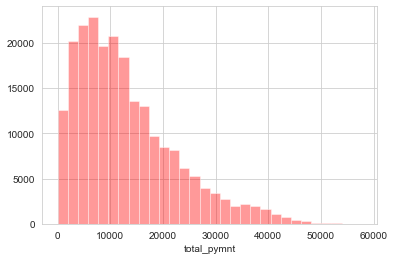

In [55]:
sns.set_style('whitegrid')
sns.distplot(dev['total_pymnt'], kde = False, color ='red', bins = 30)

<AxesSubplot:xlabel='total_pymnt', ylabel='Density'>

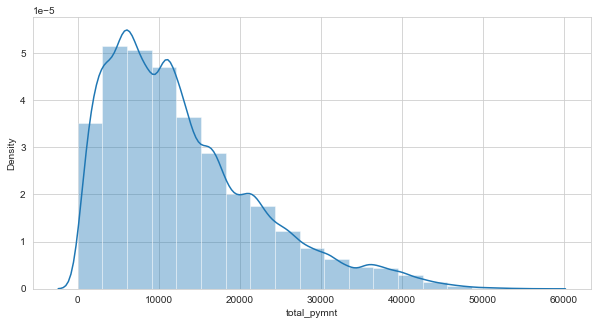

In [56]:
plt.figure(figsize=(10,5))
sns.distplot(dev['total_pymnt'],bins='sturges')

In [57]:
from scipy.stats import skew
skew(dev['total_pymnt'], bias=False)

1.0971718767578096

<AxesSubplot:xlabel='derived_total_payment', ylabel='Density'>

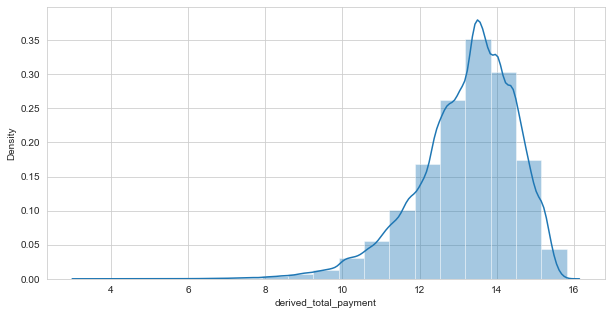

In [58]:
dev_copy['derived_total_payment']= np.log2(dev_copy['total_pymnt'])
dev_copy['derived_total_payment'].replace([np.inf, -np.inf],np.nan, inplace=True)
plt.figure(figsize=(10,5))
sns.distplot(dev_copy['derived_total_payment'],bins='sturges')

In [59]:
skew(dev_copy['derived_total_payment'], bias=False)

nan

In [60]:
dev_copy['derived_credit_line'] = (dev_copy['earliest_cr_line'] - dev_copy['last_pymnt_d']).dt.days

In [61]:
dev_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221712 entries, 92039 to 92705
Data columns (total 39 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   member_id                           221712 non-null  int64         
 1   loan_amnt                           221712 non-null  int64         
 2   funded_amnt                         221712 non-null  int64         
 3   term                                221712 non-null  object        
 4   int_rate                            221712 non-null  float64       
 5   installment                         221712 non-null  float64       
 6   grade                               221712 non-null  object        
 7   sub_grade                           221712 non-null  object        
 8   emp_length                          212859 non-null  object        
 9   home_ownership                      221712 non-null  object        
 10  issue

In [62]:
 from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()

 dev_copy['grade']=label.fit_transform(dev_copy['grade'])
dev_copy['sub_grade']=label.fit_transform(dev_copy['sub_grade'])

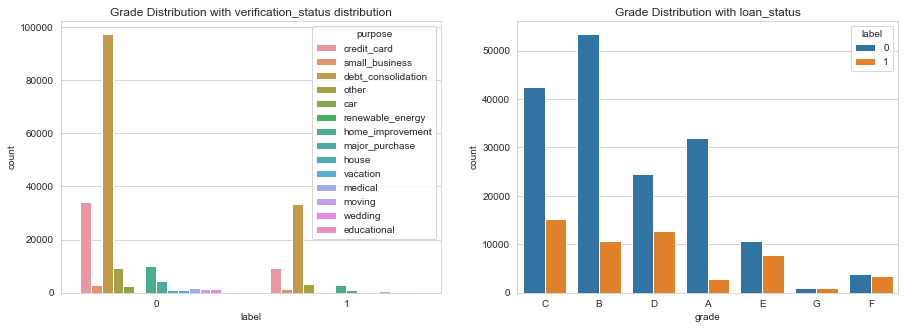

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=dev, x='label', hue='purpose', ax=ax1).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=dev, x='grade', hue='label', ax=ax2).set_title("Grade Distribution with loan_status");

### Analysis :
* **The number of Borrowers with high grade will be small compared to low grade**
* **Most money borrowers' goals from labels 0 and 1 are debt consolidation**
* **The highest number of grades who were able to complete the loan was grade 4, while the most failed to complete the loan was grade 3**


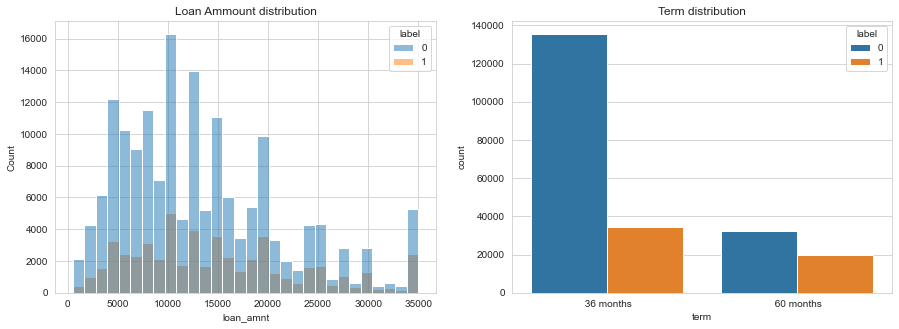

In [64]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(dev, x='loan_amnt',hue="label", bins=30, ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=dev, x='term', hue="label", ax=ax[1]).set_title("Term distribution");

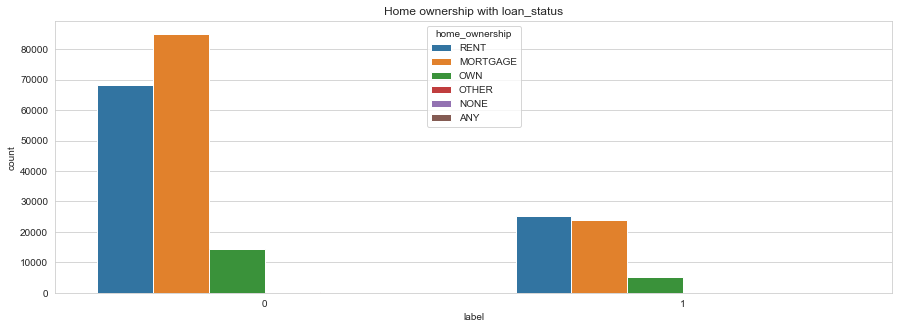

In [65]:
fig, ax = plt.subplots(1,figsize=(15,5))
sns.countplot(data=dev, hue='home_ownership', x='label', ax=ax).set_title("Home ownership with loan_status");

### Analysis :
* **The nominal value of the largest debt is 10000 USD**
* **The maximum maturity is 36 months, while for 60 months it is almost a third**


In [66]:
dev.shape

(221712, 30)

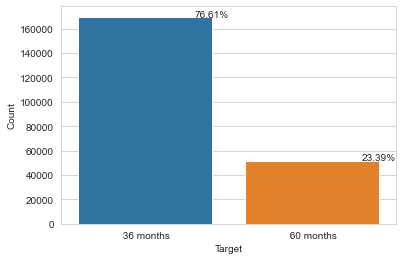

In [67]:
plt.figure()
ax=sns.countplot(x="term",data=dev)
plt.xlabel("Target")
plt.ylabel("Count")
for p in ax.patches:
    percentage='{:.2f}%'.format(100*p.get_height()/221712)
    x=p.get_x()+p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y),ha='center')
plt.show()

#### Findings: Mostly customers prefer short term loan.

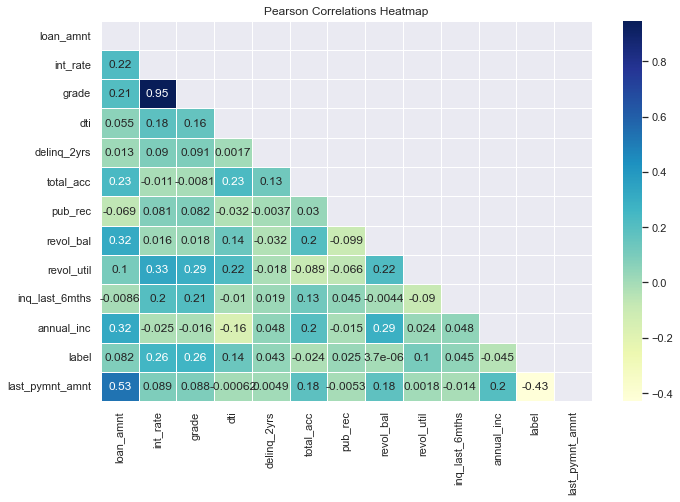

In [68]:
corr = dev_copy[['loan_amnt', 'int_rate', 'grade','dti', 'emp_length', 'delinq_2yrs','total_acc',  'pub_rec','revol_bal',
    'revol_util',
    'inq_last_6mths','home_ownership', 'annual_inc','purpose','label','last_pymnt_amnt']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

### Findings:
**The amount of credit is very dependent on the annual income of the borrower.
The Interest Rate is negatively correlated with Credit rating of the customer by the credit bureau. thus we can say that the customer of low credit rating have to pay a high interest rate.**

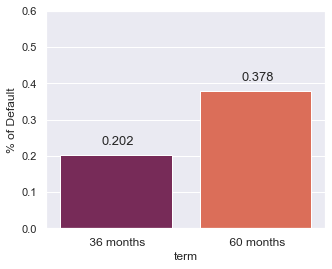

In [69]:
plt.figure(figsize=(5,4))

ax = sns.barplot(x = "term", y = "label", data = dev, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks( fontsize = 12)

for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.3, p.get_height()+0.03),fontsize=13)

plt.show()

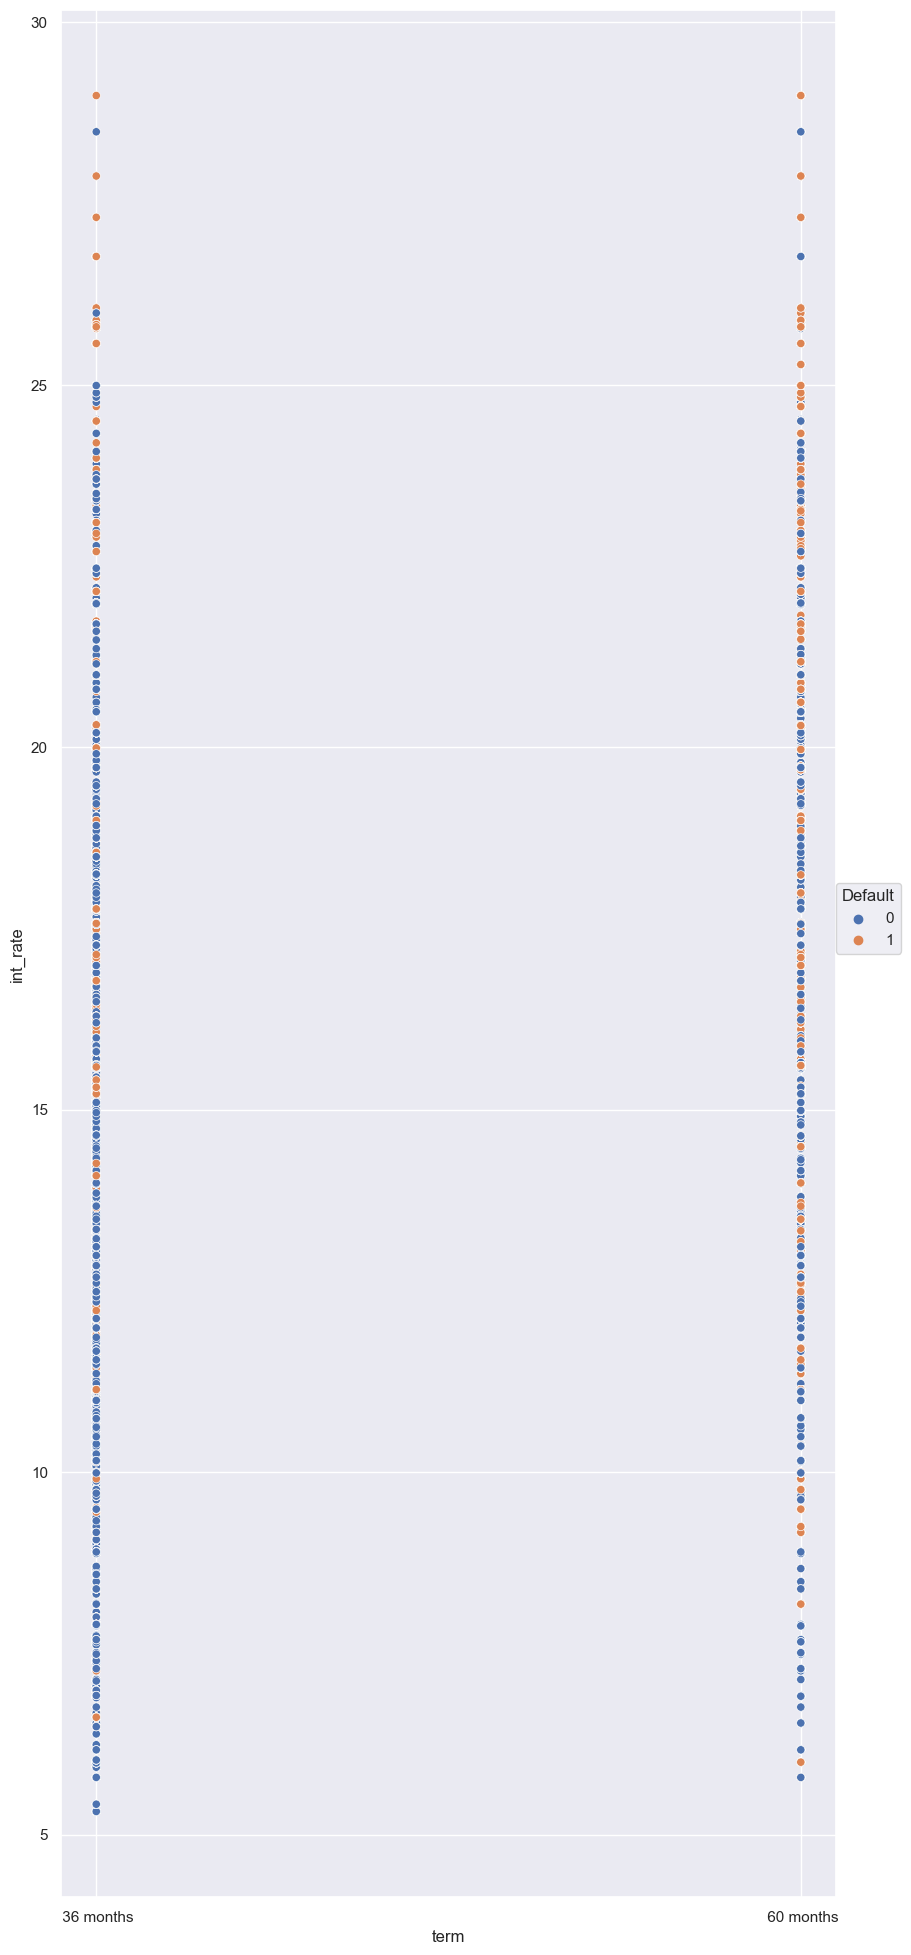

In [70]:
plt.figure(figsize=(10,25),dpi=100)
sns.scatterplot(data=dev,x='term',y='int_rate',hue='label')
plt.legend(loc=(1,0.5),title = "Default")

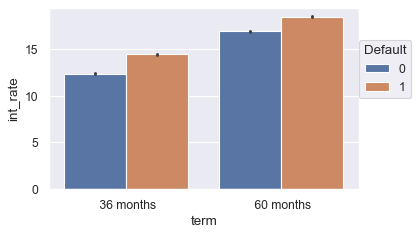

In [71]:
plt.figure(figsize=(5,3),dpi=80)
sns.barplot(data=dev,x='term',y='int_rate',hue='label')
plt.legend(loc=(1,0.5),title = "Default")

#### Findings: The customers of long term loan has to pay a hight interest rate thus the chance to be defaulter is more for them.

In [72]:
dev_copy['derived_term_b']=np.where(((dev_copy['term']=='36 months')&(dev_copy['int_rate']>16))|((dev_copy['term']=='60 months')&(dev_copy['int_rate']>14)),1,0)

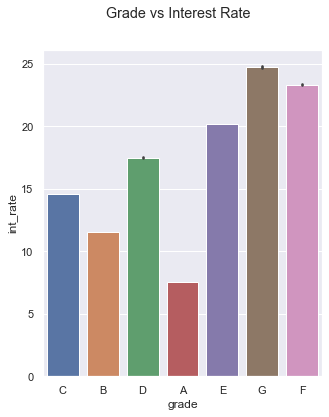

In [73]:
fig, axes = plt.subplots(1,1,figsize = (5,6))
fig.suptitle('Grade vs Interest Rate')
sns.barplot(ax = axes,x=dev['grade'],y = dev['int_rate'])
plt.show()

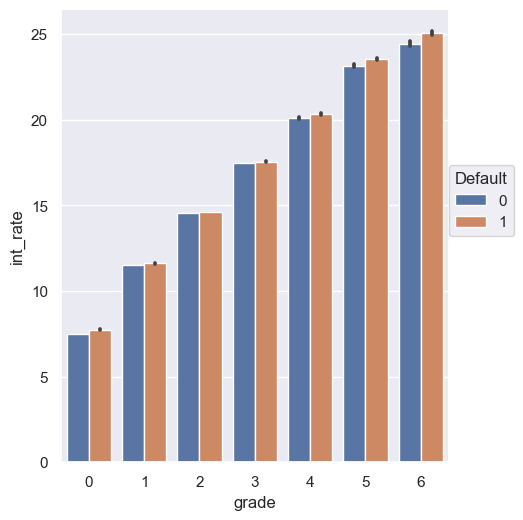

In [74]:
plt.figure(figsize=(5,6),dpi=100)
sns.barplot(data=dev_copy,x='grade',y='int_rate',hue='label')
plt.legend(loc=(1,0.5),title = "Default")

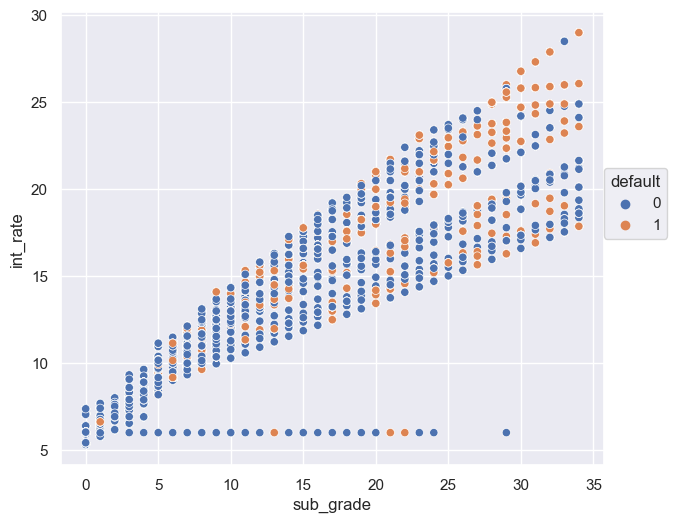

In [75]:
plt.figure(figsize=(7,6),dpi=100)
sns.scatterplot(data=dev_copy,x='sub_grade',y='int_rate',hue='label')
plt.legend(loc=(1,0.5),title = "default")

#### Findings: The customers of high sub_grade has to pay a high interest thus the chance to be defaulter rises as we see from above plot that the with the increase of subgrade ,interest rate  rises and the count of orange dot also increses.

In [76]:
dev_copy['derived_subgrade_b']=np.where((dev_copy['sub_grade']>10) & (dev_copy['int_rate']>14) , 1,0)

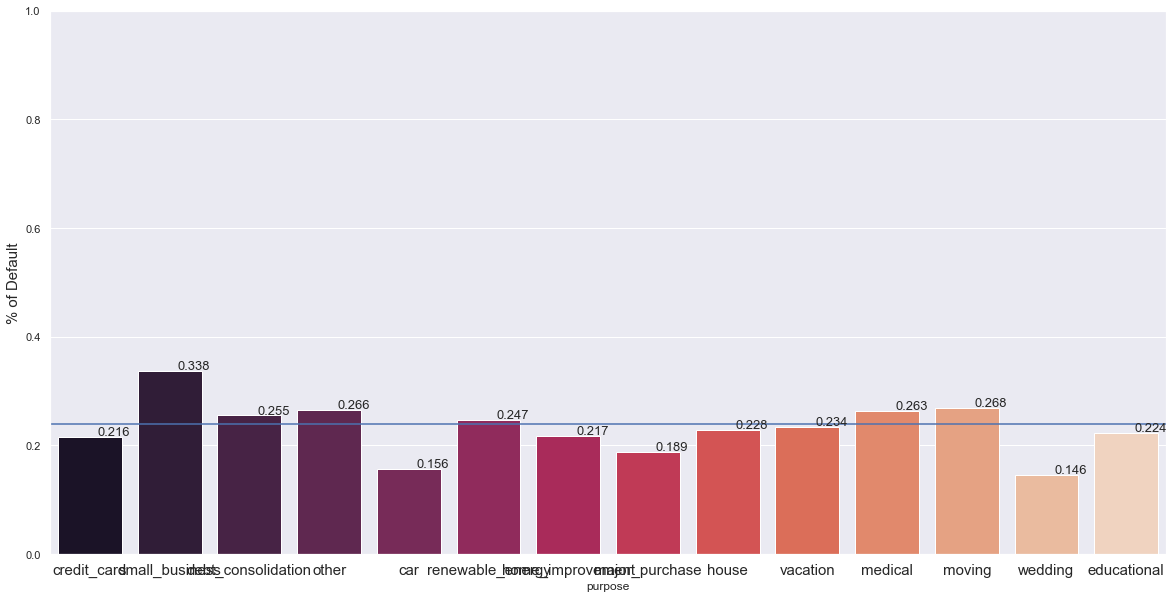

In [77]:
plt.figure(figsize=(20,10))

ax = sns.barplot(x = "purpose", y = "label", data = dev, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 15)
plt.ylim(0,1)
plt.xticks( fontsize =15)

for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.5, p.get_height()+0.003),fontsize=13)
ax.axhline(0.24)
plt.show()

In [78]:
dev_copy.purpose.unique()

array(['credit_card', 'small_business', 'debt_consolidation', 'other',
       'car', 'renewable_energy', 'home_improvement', 'major_purchase',
       'house', 'vacation', 'medical', 'moving', 'wedding', 'educational'],
      dtype=object)

In [79]:
dev_copy['derived_purpose_b']=np.where((dev_copy['purpose']=='debt_consolidation') | (dev_copy['purpose']=='small_business')|(dev_copy['purpose']=='other')|(dev_copy['purpose']=='medical')|(dev_copy['purpose']=='moving') |(dev_copy['purpose']=='renewable_energy'), 1,0)

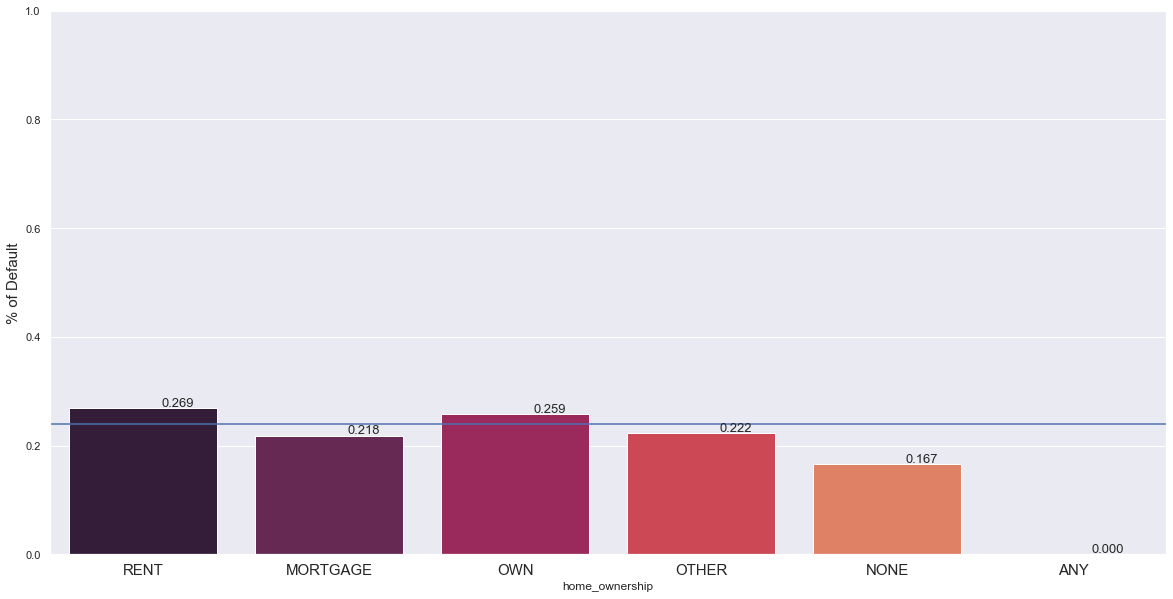

In [80]:
plt.figure(figsize=(20,10))

ax = sns.barplot(x = "home_ownership", y = "label", data = dev, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 15)
plt.ylim(0,1)
plt.xticks( fontsize =15)

for p in ax.patches:
    ax.annotate("%.3f" %(p.get_height()), (p.get_x()+0.5, p.get_height()+0.003),fontsize=13)
ax.axhline(0.24)
plt.show()

In [81]:
dev_copy['derived_home_b']=np.where( (dev_copy['home_ownership']=='RENT')|(dev_copy['home_ownership']=='OWN'), 1,0)

In [82]:
churn0 = dev.groupby(['label','acc_now_delinq']).count().transpose()[0]
churn1 = dev.groupby(['label','acc_now_delinq']).count().transpose()[1]

<AxesSubplot:xlabel='acc_now_delinq', ylabel='Rate Customers default(%)'>

<Figure size 360x432 with 0 Axes>

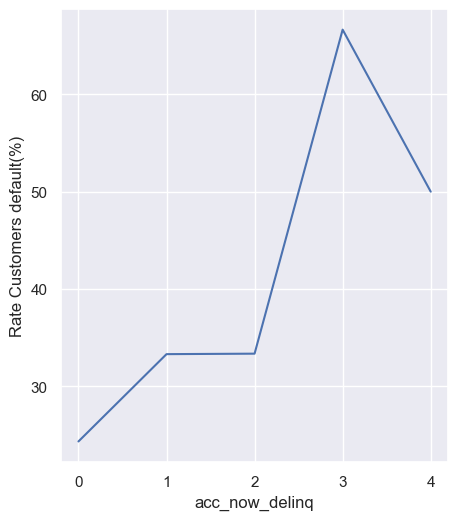

In [83]:
plt.figure(figsize=(5,6))
churn_rate = 100 * churn1/(churn0+churn1)
plt.figure(figsize=(5,6),dpi=100)
plt.ylabel('Rate Customers default(%)')
churn_rate.iloc[0].plot()

In [84]:
dev_copy['derived_delinq_b']=np.where((dev_copy['acc_now_delinq']>=2) , 1,0)

In [85]:
churn000 = dev.groupby(['label','inq_last_6mths']).count().transpose()[0]
churn111 = dev.groupby(['label','inq_last_6mths']).count().transpose()[1]

<AxesSubplot:xlabel='inq_last_6mths', ylabel='Rate Customers default(%)'>

<Figure size 504x360 with 0 Axes>

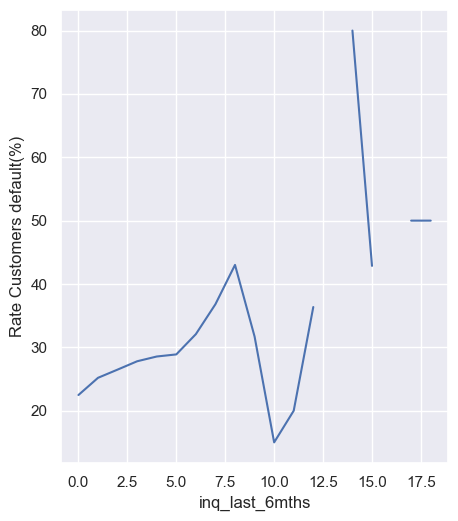

In [86]:
plt.figure(figsize=(7,5))
churn_rate = 100 * churn111/(churn000+churn111)
plt.figure(figsize=(5,6),dpi=100)
plt.ylabel('Rate Customers default(%)')
churn_rate.iloc[0].plot()

In [87]:
dev_copy['derived_inquiry_b']=np.where((dev_copy['inq_last_6mths']>=4) , 1,0)

In [88]:
churn0 = dev_copy.groupby(['label','delinq_2yrs']).count().transpose()[0]
churn1 = dev_copy.groupby(['label','delinq_2yrs']).count().transpose()[1]

<AxesSubplot:xlabel='delinq_2yrs', ylabel='Rate Customers default(%)'>

<Figure size 360x432 with 0 Axes>

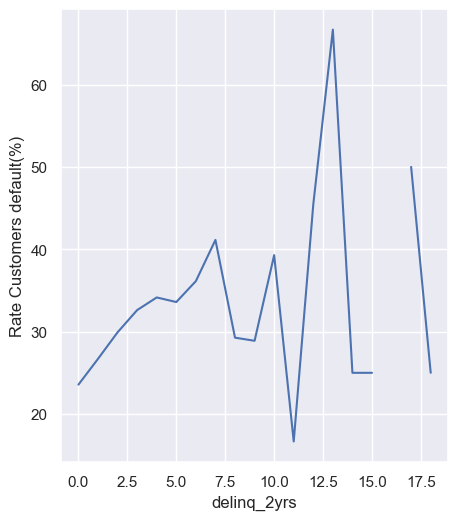

In [89]:
plt.figure(figsize=(5,6))
churn_rate = 100 * churn1/(churn0+churn1)
plt.figure(figsize=(5,6),dpi=100)
plt.ylabel('Rate Customers default(%)')
churn_rate.iloc[0].plot()

In [90]:
dev_copy.inq_last_6mths.unique()

array([ 0.,  3.,  2.,  1.,  4.,  6.,  5., nan, 25.,  7.,  9., 14., 10.,
        8., 18., 15., 12., 11., 17., 16., 19., 13., 24., 31.])

In [91]:
column = [x for x in dev_copy.columns if x not in (['member_id', 'label', 'loan_status','grade','sub_grade'])]

In [92]:
column

['loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'home_ownership',
 'issue_d',
 'purpose',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'total_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'acc_now_delinq',
 'total_pymnt',
 'annual_inc',
 'derived_overfunding',
 'derived_funded_amount&purpose',
 'derived_credit_pull_after_last_pay',
 'derived_duration',
 'derived_pay_gap',
 'derived_gap',
 'derived_issue_date',
 'derived_total_payment',
 'derived_credit_line',
 'derived_term_b',
 'derived_subgrade_b',
 'derived_purpose_b',
 'derived_home_b',
 'derived_delinq_b',
 'derived_inquiry_b']

In [93]:
dev_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221712 entries, 92039 to 92705
Data columns (total 45 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   member_id                           221712 non-null  int64         
 1   loan_amnt                           221712 non-null  int64         
 2   funded_amnt                         221712 non-null  int64         
 3   term                                221712 non-null  object        
 4   int_rate                            221712 non-null  float64       
 5   installment                         221712 non-null  float64       
 6   grade                               221712 non-null  int32         
 7   sub_grade                           221712 non-null  int32         
 8   emp_length                          212859 non-null  object        
 9   home_ownership                      221712 non-null  object        
 10  issue

In [94]:
import re
# copy the feature
emp_length = dev_copy['emp_length'].copy()

# select not null values
emp_length_nonull = emp_length.dropna()

# manually replace '< 1 year' to '0'
emp_length_nonull = emp_length_nonull.replace('< 1 year', '0')

# format the rest by removing all strings except for numbers
emp_length_encode = [re.sub('[<years+ ]', '', txt) for txt in emp_length_nonull]

# squeeze back to the original dataset
emp_length[emp_length.notnull()] = np.squeeze(emp_length_encode)
dev_copy.loc[:, 'emp_length'] = emp_length

dev_copy['emp_length']
dev_copy['emp_length']=dev_copy.emp_length.astype(float)

In [95]:
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
num_column =dev_copy[column].select_dtypes(include=numerics).columns

In [96]:
num_column

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'emp_length',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'total_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'acc_now_delinq', 'total_pymnt', 'annual_inc',
       'derived_overfunding', 'derived_funded_amount&purpose',
       'derived_credit_pull_after_last_pay', 'derived_duration',
       'derived_pay_gap', 'derived_gap', 'derived_issue_date',
       'derived_total_payment', 'derived_credit_line', 'derived_term_b',
       'derived_subgrade_b', 'derived_purpose_b', 'derived_home_b',
       'derived_delinq_b', 'derived_inquiry_b'],
      dtype='object')

In [97]:
dev_copy.shape

(221712, 45)

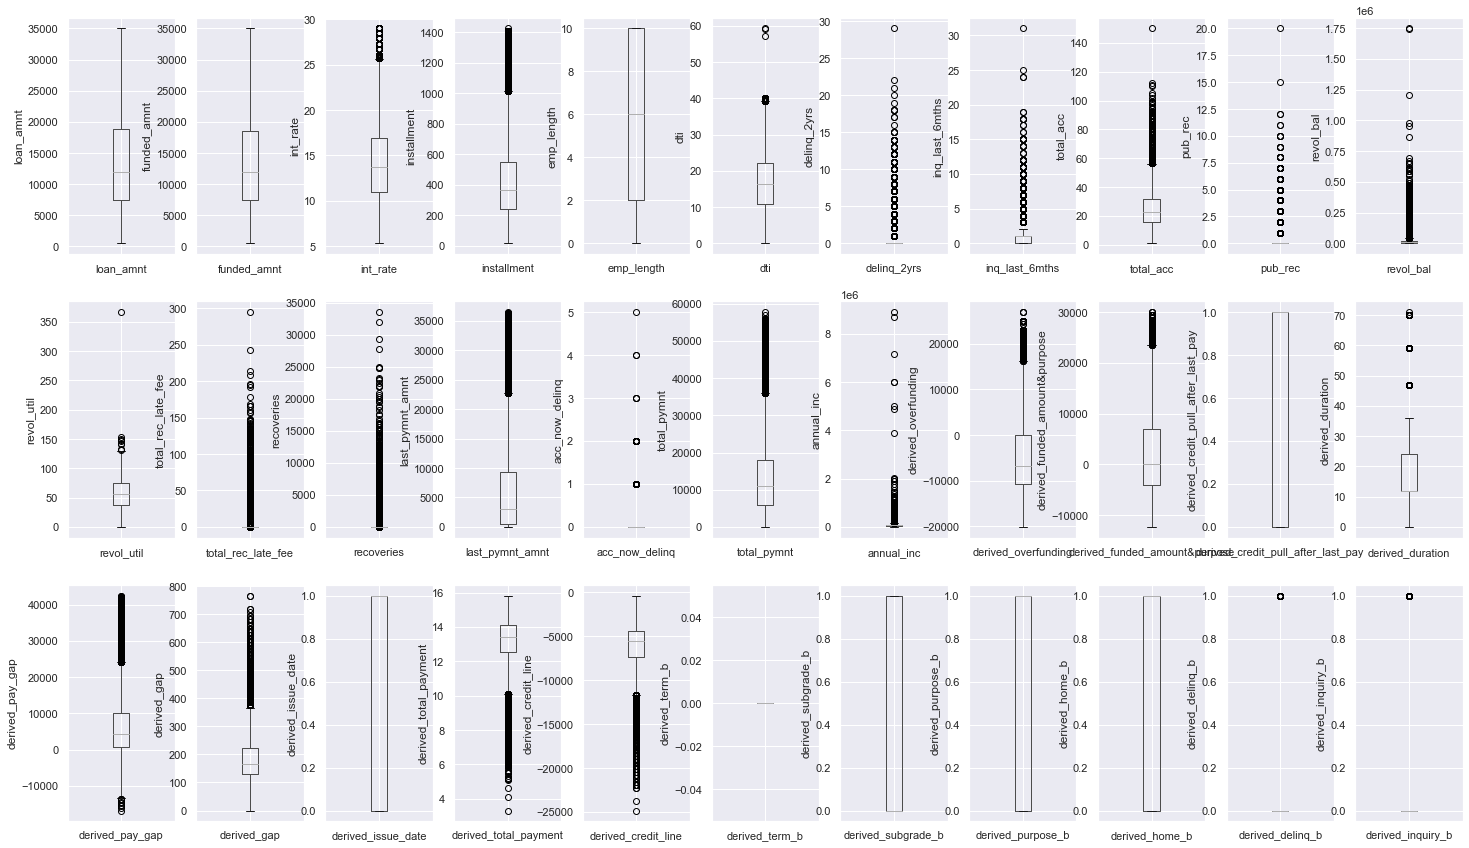

In [98]:
plt.figure(figsize=(25,20))
for i in range(len(num_column)):
    plt.subplot(4, 11, i+1)
    fig = dev_copy.boxplot(column=num_column[i])
    fig.set_title('')
    fig.set_ylabel(num_column[i])

In [99]:
num_column=num_column.drop(['loan_amnt', 'funded_amnt','emp_length','derived_term_b', 'derived_subgrade_b', 'derived_purpose_b',
       'derived_home_b', 'derived_delinq_b', 'derived_inquiry_b','derived_issue_date','derived_credit_pull_after_last_pay','pub_rec','total_rec_late_fee','recoveries','delinq_2yrs','acc_now_delinq'])

In [100]:
def iqr_capping(data, cols, factor):
    
    for col in cols:
        
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        data[col] = np.where(data[col]>upper_whisker, upper_whisker,np.where(data[col]<lower_whisker, lower_whisker, data[col]))

In [101]:
outliers_n=dev_copy[num_column].copy()

In [102]:
num_column

Index(['int_rate', 'installment', 'dti', 'inq_last_6mths', 'total_acc',
       'revol_bal', 'revol_util', 'last_pymnt_amnt', 'total_pymnt',
       'annual_inc', 'derived_overfunding', 'derived_funded_amount&purpose',
       'derived_duration', 'derived_pay_gap', 'derived_gap',
       'derived_total_payment', 'derived_credit_line'],
      dtype='object')

In [103]:
num_feature=['int_rate', 'installment', 'dti', 'inq_last_6mths', 'total_acc',
       'revol_bal', 'revol_util', 'last_pymnt_amnt', 'total_pymnt',
       'annual_inc', 'derived_overfunding', 'derived_funded_amount&purpose',
       'derived_duration', 'derived_pay_gap', 'derived_gap',
       'derived_total_payment', 'derived_credit_line','label']

In [104]:
corr_matrix=dev_copy[num_feature].corr()
corr_matrix["label"].sort_values(ascending=False)


label                            1.000000
int_rate                         0.258036
dti                              0.141645
revol_util                       0.104310
derived_funded_amount&purpose    0.081111
derived_overfunding              0.078241
installment                      0.064355
inq_last_6mths                   0.045453
derived_credit_line              0.037787
revol_bal                        0.000004
derived_gap                     -0.011797
total_acc                       -0.023546
annual_inc                      -0.045433
derived_duration                -0.177259
total_pymnt                     -0.397148
derived_pay_gap                 -0.410060
last_pymnt_amnt                 -0.429067
derived_total_payment           -0.495633
Name: label, dtype: float64

In [105]:
dev_copy.shape

(221712, 45)

In [106]:
outliers_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221712 entries, 92039 to 92705
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   int_rate                       221712 non-null  float64
 1   installment                    221712 non-null  float64
 2   dti                            221712 non-null  float64
 3   inq_last_6mths                 221684 non-null  float64
 4   total_acc                      221684 non-null  float64
 5   revol_bal                      221712 non-null  int64  
 6   revol_util                     221500 non-null  float64
 7   last_pymnt_amnt                221712 non-null  float64
 8   total_pymnt                    221712 non-null  float64
 9   annual_inc                     221708 non-null  float64
 10  derived_overfunding            221712 non-null  float64
 11  derived_funded_amount&purpose  221712 non-null  float64
 12  derived_duration           

In [107]:
iqr_capping(outliers_n, num_column, 1.5)

In [108]:
outliers_n.columns

Index(['int_rate', 'installment', 'dti', 'inq_last_6mths', 'total_acc',
       'revol_bal', 'revol_util', 'last_pymnt_amnt', 'total_pymnt',
       'annual_inc', 'derived_overfunding', 'derived_funded_amount&purpose',
       'derived_duration', 'derived_pay_gap', 'derived_gap',
       'derived_total_payment', 'derived_credit_line'],
      dtype='object')

In [109]:
outliers_n

,int_rate,installment,dti,inq_last_6mths,total_acc,revol_bal,revol_util,last_pymnt_amnt,total_pymnt,annual_inc,derived_overfunding,derived_funded_amount&purpose,derived_duration,derived_pay_gap,derived_gap,derived_total_payment,derived_credit_line
92039,15.22,308.62,16.23,0.0,13.0,5589.0,67.3,4797.44,10660.573530,31200.0,-9950.0,-3125.0,23.0,3562.313530,71.0,13.379997,-2921.0
451585,13.98,651.23,8.41,0.0,38.0,38948.5,51.8,22350.17,34072.310000,150000.0,9175.0,16000.0,12.0,24237.985520,200.0,15.056312,-6580.0
16610,11.11,196.75,24.80,2.5,26.0,8612.0,69.7,226.74,7076.346085,45000.0,-12825.0,-6000.0,35.0,190.096085,118.0,12.788789,-4751.0
301642,16.99,298.17,23.72,0.0,16.0,14544.0,79.9,11418.67,13207.690000,75000.0,-8687.5,-800.0,12.0,9629.650000,153.0,13.689091,-5116.0
37347,14.74,207.23,4.96,2.0,31.0,3402.0,47.9,1780.33,7371.050000,100824.0,-14000.0,-6500.0,24.0,2397.530000,130.0,12.847654,-4750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344205,18.99,389.03,17.22,0.0,10.0,8502.0,75.9,389.03,6613.510000,60000.0,-5000.0,2500.0,12.0,1945.150000,129.0,12.691200,-4384.0
205664,13.11,674.94,21.57,0.0,35.0,16877.0,66.2,14858.52,22280.000000,95000.0,0.0,7500.0,12.0,14180.720000,224.0,14.443462,-7310.0
14383,12.99,161.71,9.45,1.0,14.0,1184.0,30.4,170.64,5819.292246,39996.0,-7200.0,-2400.0,35.0,159.442246,94.0,12.506628,-4023.0
174345,17.77,360.38,15.90,2.5,15.0,6004.0,60.6,360.38,5043.760000,40000.0,-8825.0,-2000.0,12.0,719.200000,94.0,12.300284,-3286.0


In [110]:
outliers_column_n = ['derived_outliers_' + x + '_n' for x in outliers_n.columns]

In [111]:
outliers_column_n

['derived_outliers_int_rate_n',
 'derived_outliers_installment_n',
 'derived_outliers_dti_n',
 'derived_outliers_inq_last_6mths_n',
 'derived_outliers_total_acc_n',
 'derived_outliers_revol_bal_n',
 'derived_outliers_revol_util_n',
 'derived_outliers_last_pymnt_amnt_n',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_annual_inc_n',
 'derived_outliers_derived_overfunding_n',
 'derived_outliers_derived_funded_amount&purpose_n',
 'derived_outliers_derived_duration_n',
 'derived_outliers_derived_pay_gap_n',
 'derived_outliers_derived_gap_n',
 'derived_outliers_derived_total_payment_n',
 'derived_outliers_derived_credit_line_n']

In [112]:
outliers_n.columns=outliers_column_n

In [113]:
outliers_n

,derived_outliers_int_rate_n,derived_outliers_installment_n,derived_outliers_dti_n,derived_outliers_inq_last_6mths_n,derived_outliers_total_acc_n,derived_outliers_revol_bal_n,derived_outliers_revol_util_n,derived_outliers_last_pymnt_amnt_n,derived_outliers_total_pymnt_n,derived_outliers_annual_inc_n,derived_outliers_derived_overfunding_n,derived_outliers_derived_funded_amount&purpose_n,derived_outliers_derived_duration_n,derived_outliers_derived_pay_gap_n,derived_outliers_derived_gap_n,derived_outliers_derived_total_payment_n,derived_outliers_derived_credit_line_n
92039,15.22,308.62,16.23,0.0,13.0,5589.0,67.3,4797.44,10660.573530,31200.0,-9950.0,-3125.0,23.0,3562.313530,71.0,13.379997,-2921.0
451585,13.98,651.23,8.41,0.0,38.0,38948.5,51.8,22350.17,34072.310000,150000.0,9175.0,16000.0,12.0,24237.985520,200.0,15.056312,-6580.0
16610,11.11,196.75,24.80,2.5,26.0,8612.0,69.7,226.74,7076.346085,45000.0,-12825.0,-6000.0,35.0,190.096085,118.0,12.788789,-4751.0
301642,16.99,298.17,23.72,0.0,16.0,14544.0,79.9,11418.67,13207.690000,75000.0,-8687.5,-800.0,12.0,9629.650000,153.0,13.689091,-5116.0
37347,14.74,207.23,4.96,2.0,31.0,3402.0,47.9,1780.33,7371.050000,100824.0,-14000.0,-6500.0,24.0,2397.530000,130.0,12.847654,-4750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344205,18.99,389.03,17.22,0.0,10.0,8502.0,75.9,389.03,6613.510000,60000.0,-5000.0,2500.0,12.0,1945.150000,129.0,12.691200,-4384.0
205664,13.11,674.94,21.57,0.0,35.0,16877.0,66.2,14858.52,22280.000000,95000.0,0.0,7500.0,12.0,14180.720000,224.0,14.443462,-7310.0
14383,12.99,161.71,9.45,1.0,14.0,1184.0,30.4,170.64,5819.292246,39996.0,-7200.0,-2400.0,35.0,159.442246,94.0,12.506628,-4023.0
174345,17.77,360.38,15.90,2.5,15.0,6004.0,60.6,360.38,5043.760000,40000.0,-8825.0,-2000.0,12.0,719.200000,94.0,12.300284,-3286.0


In [114]:
dev_copy= pd.concat([dev_copy, outliers_n], axis=1)
dev_copy.shape

(221712, 62)

In [115]:
dev_copy_1=dev_copy.copy()
dev_copy_1.shape

(221712, 62)

In [116]:
outliers_column_nnn=['derived_outliers_int_rate_n',
 'derived_outliers_installment_n',
 'derived_outliers_dti_n',
 'derived_outliers_inq_last_6mths_n',
 'derived_outliers_total_acc_n',
 'derived_outliers_revol_bal_n',
 'derived_outliers_revol_util_n',
 'derived_outliers_last_pymnt_amnt_n',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_annual_inc_n',
 'derived_outliers_derived_overfunding_n',
 'derived_outliers_derived_funded_amount&purpose_n',
 'derived_outliers_derived_duration_n',
 'derived_outliers_derived_pay_gap_n',
 'derived_outliers_derived_gap_n',
 'derived_outliers_derived_total_payment_n',
 'derived_outliers_derived_credit_line_n','label']

In [117]:
corr_matrix1=dev_copy[outliers_column_nnn].corr()
corr_matrix1["label"].sort_values(ascending=False)


label                                               1.000000
derived_outliers_int_rate_n                         0.258017
derived_outliers_dti_n                              0.141622
derived_outliers_revol_util_n                       0.104268
derived_outliers_derived_funded_amount&purpose_n    0.081131
derived_outliers_derived_overfunding_n              0.078262
derived_outliers_installment_n                      0.065946
derived_outliers_inq_last_6mths_n                   0.045926
derived_outliers_derived_credit_line_n              0.041887
derived_outliers_revol_bal_n                        0.009615
derived_outliers_derived_gap_n                     -0.014670
derived_outliers_total_acc_n                       -0.024488
derived_outliers_annual_inc_n                      -0.075750
derived_outliers_derived_duration_n                -0.178476
derived_outliers_total_pymnt_n                     -0.406781
derived_outliers_derived_pay_gap_n                 -0.429577
derived_outliers_last_py

In [118]:
corr_features =['derived_outliers_int_rate_n','derived_outliers_dti_n','revol_util','derived_outliers_derived_funded_amount&purpose_n','derived_outliers_derived_overfunding_n','installment','inq_last_6mths','derived_credit_line','revol_bal','derived_gap','total_acc','annual_inc','derived_duration','total_pymnt','derived_pay_gap','last_pymnt_amnt','derived_outliers_derived_total_payment_n']

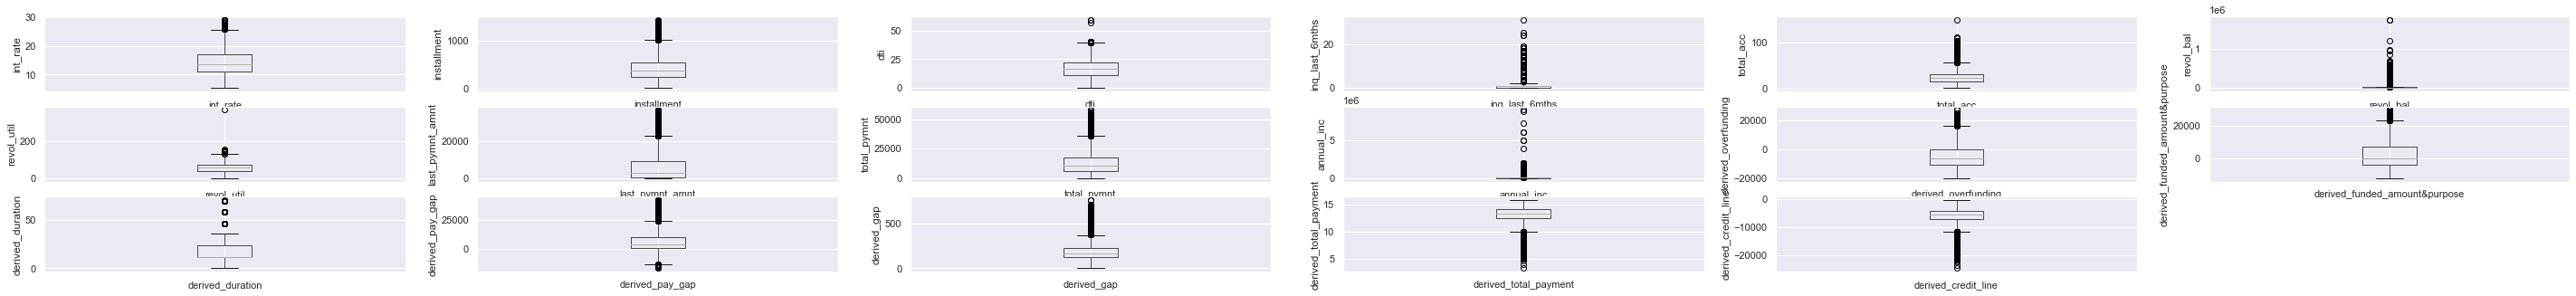

In [119]:
plt.figure(figsize=(50,40))
for i in range(len(num_column)):
    plt.subplot(22, 6, i+1)
    fig = dev_copy.boxplot(column=num_column[i])
    fig.set_title('')
    fig.set_ylabel(num_column[i])

In [120]:
def iqr_cappingg(data, cols, factor):
    
    for col in cols:
        
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        data[col] = np.where((data[col]>upper_whisker) | (data[col]<lower_whisker), 1,0)

In [121]:
outliers_b=dev_copy[num_column].copy()

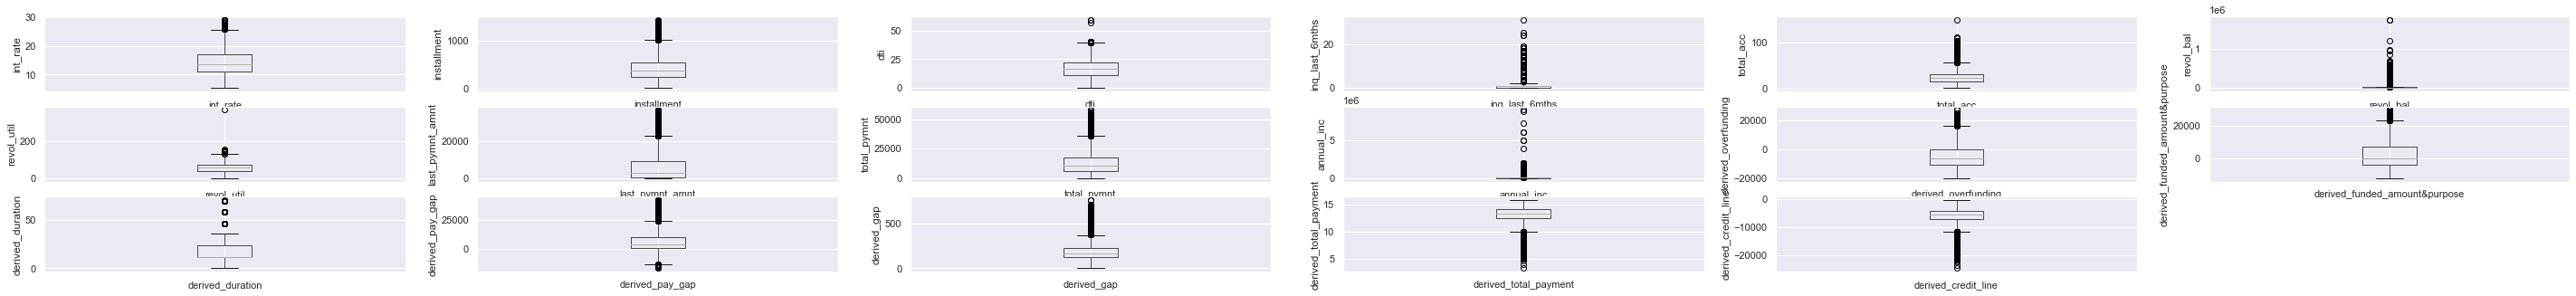

In [122]:
plt.figure(figsize=(50,40))
for i in range(len(num_column)):
    plt.subplot(22, 6, i+1)
    fig = dev_copy.boxplot(column=num_column[i])
    fig.set_title('')
    fig.set_ylabel(num_column[i])

In [123]:
iqr_cappingg(outliers_b, num_column, 1.5)

In [124]:
outliers_column_b = ['derived_outliers_'+x+'_b' for x in outliers_b.columns]

In [125]:
outliers_b.columns=outliers_column_b

In [126]:
outliers_b

,derived_outliers_int_rate_b,derived_outliers_installment_b,derived_outliers_dti_b,derived_outliers_inq_last_6mths_b,derived_outliers_total_acc_b,derived_outliers_revol_bal_b,derived_outliers_revol_util_b,derived_outliers_last_pymnt_amnt_b,derived_outliers_total_pymnt_b,derived_outliers_annual_inc_b,derived_outliers_derived_overfunding_b,derived_outliers_derived_funded_amount&purpose_b,derived_outliers_derived_duration_b,derived_outliers_derived_pay_gap_b,derived_outliers_derived_gap_b,derived_outliers_derived_total_payment_b,derived_outliers_derived_credit_line_b
92039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
451585,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
16610,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
301642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174345,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
dev_copy= pd.concat([dev_copy, outliers_b], axis=1)

In [128]:
dev_copy=dev_copy.drop(corr_features,axis=1)


In [129]:
dev_copy.shape

(221712, 62)

In [130]:
dev_copy.isnull().sum()

member_id                                   0
loan_amnt                                   0
funded_amnt                                 0
term                                        0
int_rate                                    0
                                           ..
derived_outliers_derived_duration_b         0
derived_outliers_derived_pay_gap_b          0
derived_outliers_derived_gap_b              0
derived_outliers_derived_total_payment_b    0
derived_outliers_derived_credit_line_b      0
Length: 62, dtype: int64

### Getting Dummies Values

In [131]:
dev_copy['home_ownership'] = dev_copy['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [132]:
dummies= pd.get_dummies(dev_copy[['term','home_ownership','purpose']],drop_first=True)

In [133]:
dummies

,term_ 60 months,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
92039,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
451585,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16610,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
301642,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
37347,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344205,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
205664,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14383,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
174345,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
dev_copy= pd.concat([dev_copy, dummies], axis=1)

In [135]:
dev_copy

,member_id,loan_amnt,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,pub_rec,total_rec_late_fee,recoveries,last_pymnt_d,last_credit_pull_d,acc_now_delinq,label,derived_overfunding,derived_funded_amount&purpose,derived_credit_pull_after_last_pay,derived_issue_date,derived_total_payment,derived_term_b,derived_subgrade_b,derived_purpose_b,derived_home_b,derived_delinq_b,derived_inquiry_b,derived_outliers_installment_n,derived_outliers_inq_last_6mths_n,derived_outliers_total_acc_n,derived_outliers_revol_bal_n,derived_outliers_revol_util_n,derived_outliers_last_pymnt_amnt_n,derived_outliers_total_pymnt_n,derived_outliers_annual_inc_n,derived_outliers_derived_duration_n,derived_outliers_derived_pay_gap_n,derived_outliers_derived_gap_n,derived_outliers_derived_credit_line_n,derived_outliers_int_rate_b,derived_outliers_installment_b,derived_outliers_dti_b,derived_outliers_inq_last_6mths_b,derived_outliers_total_acc_b,derived_outliers_revol_bal_b,derived_outliers_revol_util_b,derived_outliers_last_pymnt_amnt_b,derived_outliers_total_pymnt_b,derived_outliers_annual_inc_b,derived_outliers_derived_overfunding_b,derived_outliers_derived_funded_amount&purpose_b,derived_outliers_derived_duration_b,derived_outliers_derived_pay_gap_b,derived_outliers_derived_gap_b,derived_outliers_derived_total_payment_b,derived_outliers_derived_credit_line_b,term_ 60 months,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
92039,8723970,8875,8875,36 months,15.22,2,12,1.0,RENT,2013-01-09,Fully Paid,credit_card,16.23,0.0,2007-01-06,0.0,0.00,0.0,2015-01-05,2015-01-06,0.0,0,-9950.0,-3125.0,1,0.0,13.379997,0,1,0,1,0,0,308.62,0.0,13.0,5589.0,67.3,4797.44,10660.573530,31200.0,23.0,3562.313530,71.0,-2921.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
451585,12520056,28000,28000,60 months,13.98,2,10,5.0,MORTGAGE,2014-01-01,Fully Paid,credit_card,8.41,0.0,1997-01-05,0.0,65.12,0.0,2015-01-11,2015-01-10,0.0,0,9175.0,16000.0,0,1.0,15.056312,0,0,0,0,0,0,651.23,0.0,38.0,38948.5,51.8,22350.17,34072.310000,150000.0,12.0,24237.985520,200.0,-6580.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16610,925462,6000,6000,36 months,11.11,1,9,5.0,RENT,2011-01-04,Fully Paid,credit_card,24.80,0.0,2001-01-02,0.0,0.00,0.0,2014-01-05,2015-01-10,0.0,0,-12825.0,-6000.0,1,0.0,12.788789,0,0,0,1,0,0,196.75,2.5,26.0,8612.0,69.7,226.74,7076.346085,45000.0,35.0,190.096085,118.0,-4751.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
301642,30955815,12000,12000,60 months,16.99,3,17,10.0,RENT,2014-01-10,Fully Paid,small_business,23.72,0.0,2001-01-02,1.0,0.00,0.0,2015-01-05,2015-01-10,0.0,0,-8687.5,-800.0,1,1.0,13.689091,0,1,1,1,0,0,298.17,0.0,16.0,14544.0,79.9,11418.67,13207.690000,75000.0,12.0,9629.650000,153.0,-5116.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
37347,414634,6000,6000,36 months,14.74,3,17,10.0,MORTGAGE,2009-01-03,Fully Paid,debt_consolidation,4.96,0.0,1998-01-06,0.0,0.00,0.0,2011-01-08,2011-01-07,0.0,0,-14000.0,-6500.0,0,1.0,12.847654,0,1,1,0,0,0,207.23,2.0,31.0,3402.0,47.9,1780.33,7371.050000,100824.0,24.0,2397.530000,130.0,-4750.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344205,23743789,15000,15000,60 months,18.99,4,20,6.0,MORTGAGE,2014-01-07,In Grace Period,debt_consolidation,17.22,0.0,2003-01-11,0.0,0.00,0.0,20

In [136]:
dev_copy.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'pub_rec',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_d',
       'last_credit_pull_d', 'acc_now_delinq', 'label', 'derived_overfunding',
       'derived_funded_amount&purpose', 'derived_credit_pull_after_last_pay',
       'derived_issue_date', 'derived_total_payment', 'derived_term_b',
       'derived_subgrade_b', 'derived_purpose_b', 'derived_home_b',
       'derived_delinq_b', 'derived_inquiry_b',
       'derived_outliers_installment_n', 'derived_outliers_inq_last_6mths_n',
       'derived_outliers_total_acc_n', 'derived_outliers_revol_bal_n',
       'derived_outliers_revol_util_n', 'derived_outliers_last_pymnt_amnt_n',
       'derived_outliers_total_pymnt_n', 'derived_outliers_annual_inc_n',
       'derived_outliers_derived_duration_n',
       'derived_outlier

### Storing Mean, Std, Median of Numerical variables for future use

In [137]:
ignore_feat = ['member_id', 'label']
num_feat = list(set(list(dev.select_dtypes(include=[np.number]).columns.values)) - set(ignore_feat))

In [138]:
dev_stat = pd.DataFrame(list(zip(num_feat, list(dev[num_feat].mean()),list(dev[num_feat].std()), list(dev[num_feat].median()))), 
                        columns=['Variable', 'Mean', 'Std', 'Median'])
dev_stat.to_csv("Development_Statistics1.csv", index = False)

## 3. Feature Engineering

### Feature creation using Weight of Evidence method

#### Weight of Evidence and Information Value

In [139]:
import scorecardpy as sc

In [140]:
# filter variable via missing rate, iv, identical value rate from raw development sample
dev_filter = sc.var_filter(dev[raw_feat], y="label")

[INFO] filtering variables ...
Variable filtering on 221712 rows and 30 columns in 00:07:28 
9 variables are removed


In [141]:
print("Removed Features: {}".format(list(set(dev.columns) - set(dev_filter.columns))))

Removed Features: ['member_id', 'acc_now_delinq', 'inq_last_6mths', 'total_acc', 'total_rec_late_fee', 'pub_rec', 'emp_length', 'delinq_2yrs', 'home_ownership']


In [142]:
# woe binning ------
bins = sc.woebin(dev_filter, y="label")

[INFO] creating woe binning ...
Binning on 221712 rows and 17 columns in 00:00:34


In [143]:
bins['total_pymnt']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,total_pymnt,"[-inf,2000.0)",13164,0.059374,2403,10761,0.817457,2.633871,0.487701,1.434264,2000.0,False
1,total_pymnt,"[2000.0,6000.0)",44132,0.199051,22598,21534,0.487945,1.086432,0.287363,1.434264,6000.0,False
2,total_pymnt,"[6000.0,10000.0)",43200,0.194847,32111,11089,0.256690,0.071415,0.001012,1.434264,10000.0,False
3,total_pymnt,"[10000.0,16000.0)",53563,0.241588,46664,6899,0.128802,-0.776936,0.116735,1.434264,16000.0,False
4,total_pymnt,"[16000.0,inf)",67653,0.305139,63993,3660,0.054100,-1.726650,0.541453,1.434264,inf,False


In [144]:
# For each raw variable in development sample, Convert each value with corresponding BIN woe
dev_woe = sc.woebin_ply(dev, bins)

[INFO] converting into woe values ...
Woe transformating on 221712 rows and 16 columns in 00:00:25


In [145]:
dev_woe

,issue_d,member_id,last_pymnt_d,acc_now_delinq,inq_last_6mths,last_credit_pull_d,total_acc,home_ownership,total_rec_late_fee,pub_rec,emp_length,delinq_2yrs,earliest_cr_line,label,total_pymnt_woe,purpose_woe,revol_bal_woe,loan_amnt_woe,grade_woe,last_pymnt_amnt_woe,recoveries_woe,dti_woe,revol_util_woe,annual_inc_woe,int_rate_woe,funded_amnt_woe,term_woe,loan_status_woe,installment_woe,sub_grade_woe
5,01-12-2011,1311441,01-01-2015,0.0,3.0,01-09-2015,12.0,RENT,0.0,0.0,3 years,0.0,01-11-2004,0,1.086432,-0.192315,0.000408,-0.224629,-1.265998,1.267931,0.0,-0.343271,-0.235037,0.212628,-1.385219,-0.225772,-0.238345,0.0,-0.342469,-1.265998
7,01-12-2011,1288686,01-01-2015,0.0,2.0,01-12-2014,4.0,RENT,0.0,0.0,9 years,0.0,01-01-2007,0,1.086432,-0.192315,0.000408,-0.224629,0.903784,1.267931,0.0,-0.343271,0.176007,0.067366,0.477317,-0.225772,-0.238345,0.0,-0.342469,0.815313
8,01-12-2011,1306957,01-04-2012,0.0,2.0,01-08-2012,13.0,OWN,0.0,0.0,4 years,0.0,01-04-2004,1,2.633871,0.200535,0.000408,-0.224629,0.903784,1.267931,0.0,-0.343271,-0.235037,0.212628,0.877977,-0.225772,0.637255,0.0,-0.342469,0.815313
9,01-12-2011,1306721,01-11-2012,0.0,0.0,01-03-2013,3.0,RENT,0.0,0.0,< 1 year,0.0,01-09-2004,1,2.633871,0.200535,0.041550,-0.224629,-0.467188,1.267931,0.0,-0.056134,-0.235037,0.316616,-0.450070,-0.225772,0.637255,0.0,-0.342469,-0.467188
10,01-12-2011,1305201,01-06-2013,0.0,2.0,01-12-2015,23.0,OWN,0.0,0.0,5 years,0.0,01-01-1998,0,0.071415,0.062517,-0.049319,-0.224629,0.108373,1.267931,0.0,-0.056134,-0.235037,-0.093650,0.037587,-0.225772,0.637255,0.0,-0.342469,0.009896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887347,01-01-2015,39803931,01-03-2015,0.0,0.0,01-02-2015,28.0,MORTGAGE,0.0,0.0,10+ years,0.0,01-09-1999,0,-1.726650,0.062517,0.041550,0.175430,0.482420,1.267931,0.0,0.750906,0.014901,0.067366,0.037587,0.180856,0.637255,0.0,0.031231,0.350462
887351,01-01-2015,39486112,01-08-2015,0.0,0.0,01-01-2016,45.0,MORTGAGE,0.0,0.0,10+ years,0.0,01-08-1990,1,2.633871,0.062517,0.041550,-0.224629,0.482420,1.267931,0.0,0.750906,0.014901,0.067366,0.037587,-0.225772,-0.238345,0.0,-0.342469,0.350462
887364,01-01-2015,38943165,01-07-2015,0.0,0.0,01-06-2015,21.0,RENT,0.0,0.0,< 1 year,1.0,01-11-1975,0,-0.776936,0.062517,0.041550,-0.032098,-1.265998,-5.662761,0.0,-0.056134,-0.235037,0.067366,-1.385219,-0.032669,-0.238345,0.0,0.031231,-1.265998
887369,01-01-2015,39142898,01-06-2015,0.0,0.0,01-11-2015,30.0,MORTGAGE,0.0,1.0,10+ years,0.0,01-09-2002,0,1.086432,-0.192315,-0.191969,-0.224629,-0.467188,-3.928858,0.0,-0.343271,-0.585592,0.067366,-0.450070,-0.225772,-0.238345,0.0,-0.342469,-0.467188


In [146]:
dev.sort_index().head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,total_acc,pub_rec,revol_bal,revol_util,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,total_pymnt,annual_inc,label
5,1311441,5000,5000,36 months,7.90,156.46,A,A4,3 years,RENT,01-12-2011,Fully Paid,wedding,11.20,0.0,01-11-2004,3.0,12.0,0.0,7963,28.3,0.0,0.00,01-01-2015,161.03,01-09-2015,0.0,5631.377753,36000.0,0
7,1288686,3000,3000,36 months,18.64,109.43,E,E1,9 years,RENT,01-12-2011,Fully Paid,car,5.35,0.0,01-01-2007,2.0,4.0,0.0,8221,87.5,0.0,0.00,01-01-2015,111.34,01-12-2014,0.0,3938.144334,48000.0,0
8,1306957,5600,5600,60 months,21.28,152.39,F,F2,4 years,OWN,01-12-2011,Charged Off,small_business,5.55,0.0,01-04-2004,2.0,13.0,0.0,5210,32.6,0.0,189.06,01-04-2012,152.39,01-08-2012,0.0,646.020000,40000.0,1
9,1306721,5375,5375,60 months,12.69,121.45,B,B5,< 1 year,RENT,01-12-2011,Charged Off,other,18.08,0.0,01-09-2004,0.0,3.0,0.0,9279,36.5,0.0,269.29,01-11-2012,121.45,01-03-2013,0.0,1476.190000,15000.0,1
10,1305201,6500,6500,60 months,14.65,153.45,C,C3,5 years,OWN,01-12-2011,Fully Paid,debt_consolidation,16.12,0.0,01-01-1998,2.0,23.0,0.0,4032,20.6,0.0,0.00,01-06-2013,1655.54,01-12-2015,0.0,7677.520000,72000.0,0


In [147]:
dev_woe.head()

,issue_d,member_id,last_pymnt_d,acc_now_delinq,inq_last_6mths,last_credit_pull_d,total_acc,home_ownership,total_rec_late_fee,pub_rec,emp_length,delinq_2yrs,earliest_cr_line,label,total_pymnt_woe,purpose_woe,revol_bal_woe,loan_amnt_woe,grade_woe,last_pymnt_amnt_woe,recoveries_woe,dti_woe,revol_util_woe,annual_inc_woe,int_rate_woe,funded_amnt_woe,term_woe,loan_status_woe,installment_woe,sub_grade_woe
5,01-12-2011,1311441,01-01-2015,0.0,3.0,01-09-2015,12.0,RENT,0.0,0.0,3 years,0.0,01-11-2004,0,1.086432,-0.192315,0.000408,-0.224629,-1.265998,1.267931,0.0,-0.343271,-0.235037,0.212628,-1.385219,-0.225772,-0.238345,0.0,-0.342469,-1.265998
7,01-12-2011,1288686,01-01-2015,0.0,2.0,01-12-2014,4.0,RENT,0.0,0.0,9 years,0.0,01-01-2007,0,1.086432,-0.192315,0.000408,-0.224629,0.903784,1.267931,0.0,-0.343271,0.176007,0.067366,0.477317,-0.225772,-0.238345,0.0,-0.342469,0.815313
8,01-12-2011,1306957,01-04-2012,0.0,2.0,01-08-2012,13.0,OWN,0.0,0.0,4 years,0.0,01-04-2004,1,2.633871,0.200535,0.000408,-0.224629,0.903784,1.267931,0.0,-0.343271,-0.235037,0.212628,0.877977,-0.225772,0.637255,0.0,-0.342469,0.815313
9,01-12-2011,1306721,01-11-2012,0.0,0.0,01-03-2013,3.0,RENT,0.0,0.0,< 1 year,0.0,01-09-2004,1,2.633871,0.200535,0.041550,-0.224629,-0.467188,1.267931,0.0,-0.056134,-0.235037,0.316616,-0.450070,-0.225772,0.637255,0.0,-0.342469,-0.467188
10,01-12-2011,1305201,01-06-2013,0.0,2.0,01-12-2015,23.0,OWN,0.0,0.0,5 years,0.0,01-01-1998,0,0.071415,0.062517,-0.049319,-0.224629,0.108373,1.267931,0.0,-0.056134,-0.235037,-0.093650,0.037587,-0.225772,0.637255,0.0,-0.342469,0.009896


In [148]:
woe_feat_dev = [i for i in dev_woe.columns if i.endswith('_woe') or i in (['member_id'])]

In [149]:
woe_feat_dev

['member_id',
 'total_pymnt_woe',
 'purpose_woe',
 'revol_bal_woe',
 'loan_amnt_woe',
 'grade_woe',
 'last_pymnt_amnt_woe',
 'recoveries_woe',
 'dti_woe',
 'revol_util_woe',
 'annual_inc_woe',
 'int_rate_woe',
 'funded_amnt_woe',
 'term_woe',
 'loan_status_woe',
 'installment_woe',
 'sub_grade_woe']

In [150]:
dev_woee = bins['installment'].append(bins['total_pymnt']).append(bins['sub_grade']).append(bins['last_pymnt_amnt']).append(
    bins['term'].append(bins['int_rate']))

dev_woee.to_csv("Development_WOE1.csv", index=False)

In [151]:
dev_copy.shape

(221712, 79)

## 4. Bringing everything together

Merge all data and create the final feature list

In [152]:
dev_final = pd.merge( dev_copy,dev_woe[woe_feat_dev], on='member_id', how='left')

In [153]:
loan_sta=[i for i in dev_final.columns if i not in ['loan_status','loan_status_woe','term','home_ownership','purpose','issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]

In [154]:
dev_final=dev_final[loan_sta]

In [155]:
model_feat = [i for i in dev_final.columns if i not in (['member_id', 'label'])]

In [156]:
dev_final#final dataset

,member_id,loan_amnt,funded_amnt,int_rate,grade,sub_grade,emp_length,dti,delinq_2yrs,pub_rec,total_rec_late_fee,recoveries,acc_now_delinq,label,derived_overfunding,derived_funded_amount&purpose,derived_credit_pull_after_last_pay,derived_issue_date,derived_total_payment,derived_term_b,derived_subgrade_b,derived_purpose_b,derived_home_b,derived_delinq_b,derived_inquiry_b,derived_outliers_installment_n,derived_outliers_inq_last_6mths_n,derived_outliers_total_acc_n,derived_outliers_revol_bal_n,derived_outliers_revol_util_n,derived_outliers_last_pymnt_amnt_n,derived_outliers_total_pymnt_n,derived_outliers_annual_inc_n,derived_outliers_derived_duration_n,derived_outliers_derived_pay_gap_n,derived_outliers_derived_gap_n,derived_outliers_derived_credit_line_n,derived_outliers_int_rate_b,derived_outliers_installment_b,derived_outliers_dti_b,derived_outliers_inq_last_6mths_b,derived_outliers_total_acc_b,derived_outliers_revol_bal_b,derived_outliers_revol_util_b,derived_outliers_last_pymnt_amnt_b,derived_outliers_total_pymnt_b,derived_outliers_annual_inc_b,derived_outliers_derived_overfunding_b,derived_outliers_derived_funded_amount&purpose_b,derived_outliers_derived_duration_b,derived_outliers_derived_pay_gap_b,derived_outliers_derived_gap_b,derived_outliers_derived_total_payment_b,derived_outliers_derived_credit_line_b,term_ 60 months,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,total_pymnt_woe,purpose_woe,revol_bal_woe,loan_amnt_woe,grade_woe,last_pymnt_amnt_woe,recoveries_woe,dti_woe,revol_util_woe,annual_inc_woe,int_rate_woe,funded_amnt_woe,term_woe,installment_woe,sub_grade_woe
0,8723970,8875,8875,15.22,2,12,1.0,16.23,0.0,0.0,0.00,0.0,0.0,0,-9950.0,-3125.0,1,0.0,13.379997,0,1,0,1,0,0,308.62,0.0,13.0,5589.0,67.3,4797.44,10660.573530,31200.0,23.0,3562.313530,71.0,-2921.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.776936,-0.192315,0.000408,-0.224629,0.108373,-3.928858,0.0,-0.056134,0.176007,0.212628,0.037587,-0.225772,-0.238345,0.031231,0.009896
1,12520056,28000,28000,13.98,2,10,5.0,8.41,0.0,0.0,65.12,0.0,0.0,0,9175.0,16000.0,0,1.0,15.056312,0,0,0,0,0,0,651.23,0.0,38.0,38948.5,51.8,22350.17,34072.310000,150000.0,12.0,24237.985520,200.0,-6580.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.726650,-0.192315,-0.047844,0.349409,0.108373,-5.662761,0.0,-0.343271,0.014901,-0.264784,0.037587,0.348512,0.637255,0.184635,0.009896
2,925462,6000,6000,11.11,1,9,5.0,24.80,0.0,0.0,0.00,0.0,0.0,0,-12825.0,-6000.0,1,0.0,12.788789,0,0,0,1,0,0,196.75,2.5,26.0,8612.0,69.7,226.74,7076.346085,45000.0,35.0,190.096085,118.0,-4751.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.071415,-0.192315,0.000408,-0.224629,-0.467188,1.267931,0.0,0.214843,0.176007,0.067366,-0.450070,-0.225772,-0.238345,-0.210343,-0.467188
3,30955815,12000,12000,16.99,3,17,10.0,23.72,0.0,1.0,0.00,0.0,0.0,0,-8687.5,-800.0,1,1.0,13.689091,0,1,1,1,0,0,298.17,0.0,16.0,14544.0,79.9,11418.67,13207.690000,75000.0,12.0,9629.650000,153.0,-5116.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.776936,0.200535,0.041550,-0.032098,0.482420,-5.662761,0.0,0.214843,0.176007,-0.093650,0.477317,-0.032669,0.637255,0.031231,0.350462
4,414634,6000,6000,14.74,3,17,10.0,4.96,0.0,0.0,0.00,0.0,0.0,0,-14000.0,-6500.0,0,1.0,12.847654,0,1,1,0,0,0,207.23,2.0,31.0,3402.0,47.9,1780.33,7371.050000,100824.0,24.0,2397.530000,130.0,-4750.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.071415,0.062517,-0.049319,-0.224629,0.482420,1.267931,0.0,-0.343271,0.014901,-0.264784,0.037587,-0.225772,-0.238345,-0.210343,0.350462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [157]:
dev_final.to_csv('Downloads/dev_final1')

In [158]:
dev_final=pd.read_csv('Downloads/dev_final1')

In [159]:
dev_final

,Unnamed: 0,member_id,loan_amnt,funded_amnt,int_rate,grade,sub_grade,emp_length,dti,delinq_2yrs,pub_rec,total_rec_late_fee,recoveries,acc_now_delinq,label,derived_overfunding,derived_funded_amount&purpose,derived_credit_pull_after_last_pay,derived_issue_date,derived_total_payment,derived_term_b,derived_subgrade_b,derived_purpose_b,derived_home_b,derived_delinq_b,derived_inquiry_b,derived_outliers_installment_n,derived_outliers_inq_last_6mths_n,derived_outliers_total_acc_n,derived_outliers_revol_bal_n,derived_outliers_revol_util_n,derived_outliers_last_pymnt_amnt_n,derived_outliers_total_pymnt_n,derived_outliers_annual_inc_n,derived_outliers_derived_duration_n,derived_outliers_derived_pay_gap_n,derived_outliers_derived_gap_n,derived_outliers_derived_credit_line_n,derived_outliers_int_rate_b,derived_outliers_installment_b,derived_outliers_dti_b,derived_outliers_inq_last_6mths_b,derived_outliers_total_acc_b,derived_outliers_revol_bal_b,derived_outliers_revol_util_b,derived_outliers_last_pymnt_amnt_b,derived_outliers_total_pymnt_b,derived_outliers_annual_inc_b,derived_outliers_derived_overfunding_b,derived_outliers_derived_funded_amount&purpose_b,derived_outliers_derived_duration_b,derived_outliers_derived_pay_gap_b,derived_outliers_derived_gap_b,derived_outliers_derived_total_payment_b,derived_outliers_derived_credit_line_b,term_ 60 months,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,total_pymnt_woe,purpose_woe,revol_bal_woe,loan_amnt_woe,grade_woe,last_pymnt_amnt_woe,recoveries_woe,dti_woe,revol_util_woe,annual_inc_woe,int_rate_woe,funded_amnt_woe,term_woe,installment_woe,sub_grade_woe
0,0,8723970,8875,8875,15.22,2,12,1.0,16.23,0.0,0.0,0.00,0.0,0.0,0,-9950.0,-3125.0,1,0.0,13.379997,0,1,0,1,0,0,308.62,0.0,13.0,5589.0,67.3,4797.44,10660.573530,31200.0,23.0,3562.313530,71.0,-2921.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.776936,-0.192315,0.000408,-0.224629,0.108373,-3.928858,0.0,-0.056134,0.176007,0.212628,0.037587,-0.225772,-0.238345,0.031231,0.009896
1,1,12520056,28000,28000,13.98,2,10,5.0,8.41,0.0,0.0,65.12,0.0,0.0,0,9175.0,16000.0,0,1.0,15.056312,0,0,0,0,0,0,651.23,0.0,38.0,38948.5,51.8,22350.17,34072.310000,150000.0,12.0,24237.985520,200.0,-6580.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.726650,-0.192315,-0.047844,0.349409,0.108373,-5.662761,0.0,-0.343271,0.014901,-0.264784,0.037587,0.348512,0.637255,0.184635,0.009896
2,2,925462,6000,6000,11.11,1,9,5.0,24.80,0.0,0.0,0.00,0.0,0.0,0,-12825.0,-6000.0,1,0.0,12.788789,0,0,0,1,0,0,196.75,2.5,26.0,8612.0,69.7,226.74,7076.346085,45000.0,35.0,190.096085,118.0,-4751.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.071415,-0.192315,0.000408,-0.224629,-0.467188,1.267931,0.0,0.214843,0.176007,0.067366,-0.450070,-0.225772,-0.238345,-0.210343,-0.467188
3,3,30955815,12000,12000,16.99,3,17,10.0,23.72,0.0,1.0,0.00,0.0,0.0,0,-8687.5,-800.0,1,1.0,13.689091,0,1,1,1,0,0,298.17,0.0,16.0,14544.0,79.9,11418.67,13207.690000,75000.0,12.0,9629.650000,153.0,-5116.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.776936,0.200535,0.041550,-0.032098,0.482420,-5.662761,0.0,0.214843,0.176007,-0.093650,0.477317,-0.032669,0.637255,0.031231,0.350462
4,4,414634,6000,6000,14.74,3,17,10.0,4.96,0.0,0.0,0.00,0.0,0.0,0,-14000.0,-6500.0,0,1.0,12.847654,0,1,1,0,0,0,207.23,2.0,31.0,3402.0,47.9,1780.33,7371.050000,100824.0,24.0,2397.530000,130.0,-4750.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.071415,0.062517,-0.049319,-0.224629,0.482420,1.267931,0.0,-0.343271,0.014901,-0.264784,0.037587,-0.225772,-0.238345,-0.210343,0.350462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## <center> End of Step 2
**[Click here to go back to Content](#Notebook-Description:)**

***

## Data Preprocessing

In [160]:
dev_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221712 entries, 0 to 221711
Data columns (total 87 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Unnamed: 0                                        221712 non-null  int64  
 1   member_id                                         221712 non-null  int64  
 2   loan_amnt                                         221712 non-null  int64  
 3   funded_amnt                                       221712 non-null  int64  
 4   int_rate                                          221712 non-null  float64
 5   grade                                             221712 non-null  int64  
 6   sub_grade                                         221712 non-null  int64  
 7   emp_length                                        212859 non-null  float64
 8   dti                                               221712 non-null  float64
 9   deli

In [161]:
mis_vals=dev_final.isnull().sum()
missing=mis_vals[mis_vals > 0]
missing

emp_length                                8853
delinq_2yrs                                 28
pub_rec                                     28
acc_now_delinq                              28
derived_issue_date                          37
derived_total_payment                      501
derived_outliers_inq_last_6mths_n           28
derived_outliers_total_acc_n                28
derived_outliers_revol_util_n              212
derived_outliers_annual_inc_n                4
derived_outliers_derived_duration_n        741
derived_outliers_derived_pay_gap_n         741
derived_outliers_derived_gap_n              28
derived_outliers_derived_credit_line_n     769
dtype: int64

In [162]:
miss_column= [i for i in dev_final.columns if dev_final[i].isnull().sum()>0]


In [163]:
dev_final[miss_column]=dev_final[miss_column].fillna(dev_final.median().iloc[0])

In [164]:
mis_vals=dev_final.isnull().sum()
missing=mis_vals[mis_vals > 0]
missing

Series([], dtype: int64)

In [165]:
dev_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221712 entries, 0 to 221711
Data columns (total 87 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Unnamed: 0                                        221712 non-null  int64  
 1   member_id                                         221712 non-null  int64  
 2   loan_amnt                                         221712 non-null  int64  
 3   funded_amnt                                       221712 non-null  int64  
 4   int_rate                                          221712 non-null  float64
 5   grade                                             221712 non-null  int64  
 6   sub_grade                                         221712 non-null  int64  
 7   emp_length                                        221712 non-null  float64
 8   dti                                               221712 non-null  float64
 9   deli

# Step 3: Feature Selection

### This step will identify the important features that explains maximum variability of the model

- Select a small representive sample from the prepared data in last step
- Get feature importance score/ set of top N features using different techniques like:
  - RFE
  - Random Forest Feature importance score
- Feel free to explore different Feature Selection technique
<br>

**Articles to read:**
1. https://machinelearningmastery.com/an-introduction-to-feature-selection/
2. https://machinelearningmastery.com/rfe-feature-selection-in-python/


### Output of this step is the list of top features to be used in the model

### From Random Forest

In [231]:
# Select a small sample to select important features
from sklearn.model_selection import train_test_split
selection_sample, sample_2 = train_test_split(dev_final, test_size = 0.8, stratify=dev_final['label'])

In [232]:
print(dev_final.shape)
print(selection_sample.shape)
print(sample_2.shape)

(221712, 87)
(44342, 87)
(177370, 87)


In [233]:
model_feat

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'dti',
 'delinq_2yrs',
 'pub_rec',
 'total_rec_late_fee',
 'recoveries',
 'acc_now_delinq',
 'derived_overfunding',
 'derived_funded_amount&purpose',
 'derived_credit_pull_after_last_pay',
 'derived_issue_date',
 'derived_total_payment',
 'derived_term_b',
 'derived_subgrade_b',
 'derived_purpose_b',
 'derived_home_b',
 'derived_delinq_b',
 'derived_inquiry_b',
 'derived_outliers_installment_n',
 'derived_outliers_inq_last_6mths_n',
 'derived_outliers_total_acc_n',
 'derived_outliers_revol_bal_n',
 'derived_outliers_revol_util_n',
 'derived_outliers_last_pymnt_amnt_n',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_annual_inc_n',
 'derived_outliers_derived_duration_n',
 'derived_outliers_derived_pay_gap_n',
 'derived_outliers_derived_gap_n',
 'derived_outliers_derived_credit_line_n',
 'derived_outliers_int_rate_b',
 'derived_outliers_installment_b',
 'derived_outliers_dti_b',
 'derived_outliers_in

In [234]:
selection_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44342 entries, 40538 to 132518
Data columns (total 87 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        44342 non-null  int64  
 1   member_id                                         44342 non-null  int64  
 2   loan_amnt                                         44342 non-null  int64  
 3   funded_amnt                                       44342 non-null  int64  
 4   int_rate                                          44342 non-null  float64
 5   grade                                             44342 non-null  int64  
 6   sub_grade                                         44342 non-null  int64  
 7   emp_length                                        44342 non-null  float64
 8   dti                                               44342 non-null  float64
 9   delinq_2yrs 

In [235]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

In [236]:
rf = RandomForestClassifier(class_weight = 'balanced',max_depth=3,random_state=32)
rf.fit(selection_sample[model_feat],selection_sample['label'])

RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=32)

In [237]:
feat_scored = pd.DataFrame(rf.feature_importances_, index=model_feat, columns=['Importance']).sort_values(by=['Importance'],ascending=False).reset_index().rename(columns = {'index':'Variable'})

In [238]:
feat_scored['Cumulative_Score'] = feat_scored.Importance.cumsum()

In [239]:
pd.set_option('display.max_rows', 200)
feat_scored

,Variable,Importance,Cumulative_Score
0,derived_outliers_last_pymnt_amnt_n,2.138490e-01,0.213849
1,last_pymnt_amnt_woe,1.654756e-01,0.379325
2,derived_outliers_total_pymnt_n,1.043505e-01,0.483675
3,derived_outliers_derived_pay_gap_n,9.458798e-02,0.578263
4,total_pymnt_woe,6.349736e-02,0.641760
5,recoveries,5.983256e-02,0.701593
6,derived_total_payment,5.401185e-02,0.755605
7,funded_amnt,3.245249e-02,0.788057
8,derived_credit_pull_after_last_pay,2.473959e-02,0.812797
9,int_rate,1.936547e-02,0.832162


In [240]:
feat_scored.to_csv("Downloads/Feature_Importance_Score.csv", index=False)

In [241]:
# Change the threshold and test model performance
Top_Feat_rf = list(feat_scored[feat_scored['Cumulative_Score'] <= 0.99].Variable)

In [242]:
print(Top_Feat_rf)
print("----------------------------------------------------")
print("Total Number of Selected Features: {}".format(len(Top_Feat_rf)))

['derived_outliers_last_pymnt_amnt_n', 'last_pymnt_amnt_woe', 'derived_outliers_total_pymnt_n', 'derived_outliers_derived_pay_gap_n', 'total_pymnt_woe', 'recoveries', 'derived_total_payment', 'funded_amnt', 'derived_credit_pull_after_last_pay', 'int_rate', 'derived_outliers_derived_duration_n', 'derived_outliers_installment_n', 'loan_amnt', 'installment_woe', 'grade_woe', 'sub_grade', 'funded_amnt_woe', 'grade', 'loan_amnt_woe', 'sub_grade_woe', 'derived_funded_amount&purpose', 'derived_outliers_derived_total_payment_b', 'derived_outliers_last_pymnt_amnt_b', 'int_rate_woe', 'term_woe', 'total_rec_late_fee', 'derived_overfunding', 'derived_outliers_derived_pay_gap_b']
----------------------------------------------------
Total Number of Selected Features: 28


In [166]:
Top_Feat_rf=['derived_outliers_last_pymnt_amnt_n', 'last_pymnt_amnt_woe', 'derived_outliers_total_pymnt_n', 'derived_outliers_derived_pay_gap_n', 'total_pymnt_woe', 'recoveries', 'derived_total_payment', 'funded_amnt', 'derived_credit_pull_after_last_pay', 'int_rate', 'derived_outliers_derived_duration_n', 'derived_outliers_installment_n', 'loan_amnt', 'installment_woe', 'grade_woe', 'sub_grade', 'funded_amnt_woe', 'grade', 'loan_amnt_woe', 'sub_grade_woe', 'derived_funded_amount&purpose', 'derived_outliers_derived_total_payment_b', 'derived_outliers_last_pymnt_amnt_b', 'int_rate_woe', 'term_woe', 'total_rec_late_fee', 'derived_overfunding', 'derived_outliers_derived_pay_gap_b']

## From CatBoost

In [244]:
from catboost import CatBoostClassifier

In [245]:
cb = CatBoostClassifier(iterations=5, 
    learning_rate=0.1, random_state=32)
cb.fit(selection_sample[model_feat],selection_sample['label'])

0:	learn: 0.4793172	total: 34.3ms	remaining: 137ms
1:	learn: 0.3415320	total: 70ms	remaining: 105ms
2:	learn: 0.2788616	total: 101ms	remaining: 67.5ms
3:	learn: 0.2072516	total: 138ms	remaining: 34.5ms
4:	learn: 0.1788556	total: 167ms	remaining: 0us


In [246]:
feat_scored = pd.DataFrame(rf.feature_importances_, index=model_feat, columns=['Importance']).sort_values(by=['Importance'],ascending=False).reset_index().rename(columns = {'index':'Variable'})

In [247]:
feat_scored['Cumulative_Score'] = feat_scored.Importance.cumsum()

In [248]:
pd.set_option('display.max_rows', 200)
feat_scored

,Variable,Importance,Cumulative_Score
0,derived_outliers_last_pymnt_amnt_n,2.138490e-01,0.213849
1,last_pymnt_amnt_woe,1.654756e-01,0.379325
2,derived_outliers_total_pymnt_n,1.043505e-01,0.483675
3,derived_outliers_derived_pay_gap_n,9.458798e-02,0.578263
4,total_pymnt_woe,6.349736e-02,0.641760
5,recoveries,5.983256e-02,0.701593
6,derived_total_payment,5.401185e-02,0.755605
7,funded_amnt,3.245249e-02,0.788057
8,derived_credit_pull_after_last_pay,2.473959e-02,0.812797
9,int_rate,1.936547e-02,0.832162


In [249]:
feat_scored.to_csv("Downloads/Feature_Importance_Score_Catbbost.csv", index=False)

In [250]:
# Change the threshold and test model performance
Top_Feat_cat = list(feat_scored[feat_scored['Cumulative_Score'] <= 0.995].Variable)

In [251]:
print(Top_Feat_cat)
print("----------------------------------------------------")
print("Total Number of Selected Features: {}".format(len(Top_Feat_cat)))

['derived_outliers_last_pymnt_amnt_n', 'last_pymnt_amnt_woe', 'derived_outliers_total_pymnt_n', 'derived_outliers_derived_pay_gap_n', 'total_pymnt_woe', 'recoveries', 'derived_total_payment', 'funded_amnt', 'derived_credit_pull_after_last_pay', 'int_rate', 'derived_outliers_derived_duration_n', 'derived_outliers_installment_n', 'loan_amnt', 'installment_woe', 'grade_woe', 'sub_grade', 'funded_amnt_woe', 'grade', 'loan_amnt_woe', 'sub_grade_woe', 'derived_funded_amount&purpose', 'derived_outliers_derived_total_payment_b', 'derived_outliers_last_pymnt_amnt_b', 'int_rate_woe', 'term_woe', 'total_rec_late_fee', 'derived_overfunding', 'derived_outliers_derived_pay_gap_b', 'derived_subgrade_b', 'term_ 60 months', 'dti']
----------------------------------------------------
Total Number of Selected Features: 31


In [167]:
Top_Feat_cat=['derived_outliers_last_pymnt_amnt_n', 'last_pymnt_amnt_woe', 'derived_outliers_total_pymnt_n', 'derived_outliers_derived_pay_gap_n', 'total_pymnt_woe', 'recoveries', 'derived_total_payment', 'funded_amnt', 'derived_credit_pull_after_last_pay', 'int_rate', 'derived_outliers_derived_duration_n', 'derived_outliers_installment_n', 'loan_amnt', 'installment_woe', 'grade_woe', 'sub_grade', 'funded_amnt_woe', 'grade', 'loan_amnt_woe', 'sub_grade_woe', 'derived_funded_amount&purpose', 'derived_outliers_derived_total_payment_b', 'derived_outliers_last_pymnt_amnt_b', 'int_rate_woe', 'term_woe', 'total_rec_late_fee', 'derived_overfunding', 'derived_outliers_derived_pay_gap_b', 'derived_subgrade_b', 'term_ 60 months', 'dti'] 

## Wrapper Method

**The main idea behind a wrapper method is to select which set of features works best for a machine learning model.
It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion.
The evaluation criterion is simply the performance measure which depends on the type of problem, for e.g. For regression evaluation criterion can be MSE,MAE,MAPE,R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score, etc. It selects the combination of features that gives the optimal results for the specified machine learning algorithm.**
### 1. Forward Selection

**Forward selection is an iterative method in each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.**

### 2. Backward Selection

**In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.**

### 3. Exhaustive Feature Selection

**This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.**

### Forward Feature Selection
**In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models.**

**Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models.**

**Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a higest arruracy for classificartion and minimum MSE/MAPE/MAE for regression models of individual features.**

In [253]:
# Lets use the built in function in Python
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [254]:
feature_names=tuple(dev_final[model_feat].columns)
feature_names

('loan_amnt',
 'funded_amnt',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'dti',
 'delinq_2yrs',
 'pub_rec',
 'total_rec_late_fee',
 'recoveries',
 'acc_now_delinq',
 'derived_overfunding',
 'derived_funded_amount&purpose',
 'derived_credit_pull_after_last_pay',
 'derived_issue_date',
 'derived_total_payment',
 'derived_term_b',
 'derived_subgrade_b',
 'derived_purpose_b',
 'derived_home_b',
 'derived_delinq_b',
 'derived_inquiry_b',
 'derived_outliers_installment_n',
 'derived_outliers_inq_last_6mths_n',
 'derived_outliers_total_acc_n',
 'derived_outliers_revol_bal_n',
 'derived_outliers_revol_util_n',
 'derived_outliers_last_pymnt_amnt_n',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_annual_inc_n',
 'derived_outliers_derived_duration_n',
 'derived_outliers_derived_pay_gap_n',
 'derived_outliers_derived_gap_n',
 'derived_outliers_derived_credit_line_n',
 'derived_outliers_int_rate_b',
 'derived_outliers_installment_b',
 'derived_outliers_dti_b',
 'derived_outliers_in

In [255]:
selection_sample2, sample_3 = train_test_split(dev_final, test_size = 0.95, stratify=dev_final['label'])

In [256]:
sfs1 = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=1000),
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=0)

sfs1 = sfs1.fit(selection_sample2[model_feat],selection_sample2['label'],custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.6s finished

[2022-07-09 17:49:14] Features: 1/20 -- score: 0.8480829950383401[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    8.2s finished

[2022-07-09 17:49:22] Features: 2/20 -- score: 0.8769508344609833[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    9.7s finished

[2022-07-09 17:49:32] Features: 3/20 -- score: 0.9315290933694181[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [257]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

{1: {'feature_idx': (10,),
  'cv_scores': array([0.848083]),
  'avg_score': 0.8480829950383401,
  'feature_names': ('recoveries',)},
 2: {'feature_idx': (10, 72),
  'cv_scores': array([0.87695083]),
  'avg_score': 0.8769508344609833,
  'feature_names': ('recoveries', 'total_pymnt_woe')},
 3: {'feature_idx': (10, 72, 80),
  'cv_scores': array([0.93152909]),
  'avg_score': 0.9315290933694181,
  'feature_names': ('recoveries', 'total_pymnt_woe', 'installment_woe')},
 4: {'feature_idx': (10, 29, 72, 80),
  'cv_scores': array([0.95480379]),
  'avg_score': 0.9548037889039243,
  'feature_names': ('recoveries',
   'derived_outliers_total_pymnt_n',
   'total_pymnt_woe',
   'installment_woe')},
 5: {'feature_idx': (1, 10, 29, 72, 80),
  'cv_scores': array([0.98403248]),
  'avg_score': 0.9840324763193504,
  'feature_names': ('funded_amnt',
   'recoveries',
   'derived_outliers_total_pymnt_n',
   'total_pymnt_woe',
   'installment_woe')},
 6: {'feature_idx': (1, 10, 28, 29, 72, 80),
  'cv_scores':

In [258]:
sfs1.get_metric_dict()

{1: {'feature_idx': (10,),
  'cv_scores': array([0.848083]),
  'avg_score': 0.8480829950383401,
  'feature_names': ('recoveries',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (10, 72),
  'cv_scores': array([0.87695083]),
  'avg_score': 0.8769508344609833,
  'feature_names': ('recoveries', 'total_pymnt_woe'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (10, 72, 80),
  'cv_scores': array([0.93152909]),
  'avg_score': 0.9315290933694181,
  'feature_names': ('recoveries', 'total_pymnt_woe', 'installment_woe'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (10, 29, 72, 80),
  'cv_scores': array([0.95480379]),
  'avg_score': 0.9548037889039243,
  'feature_names': ('recoveries',
   'derived_outliers_total_pymnt_n',
   'total_pymnt_woe',
   'installment_woe'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (1, 10, 29, 72, 80),
  'cv_scores': array([0.98403248]),
  'avg_sc

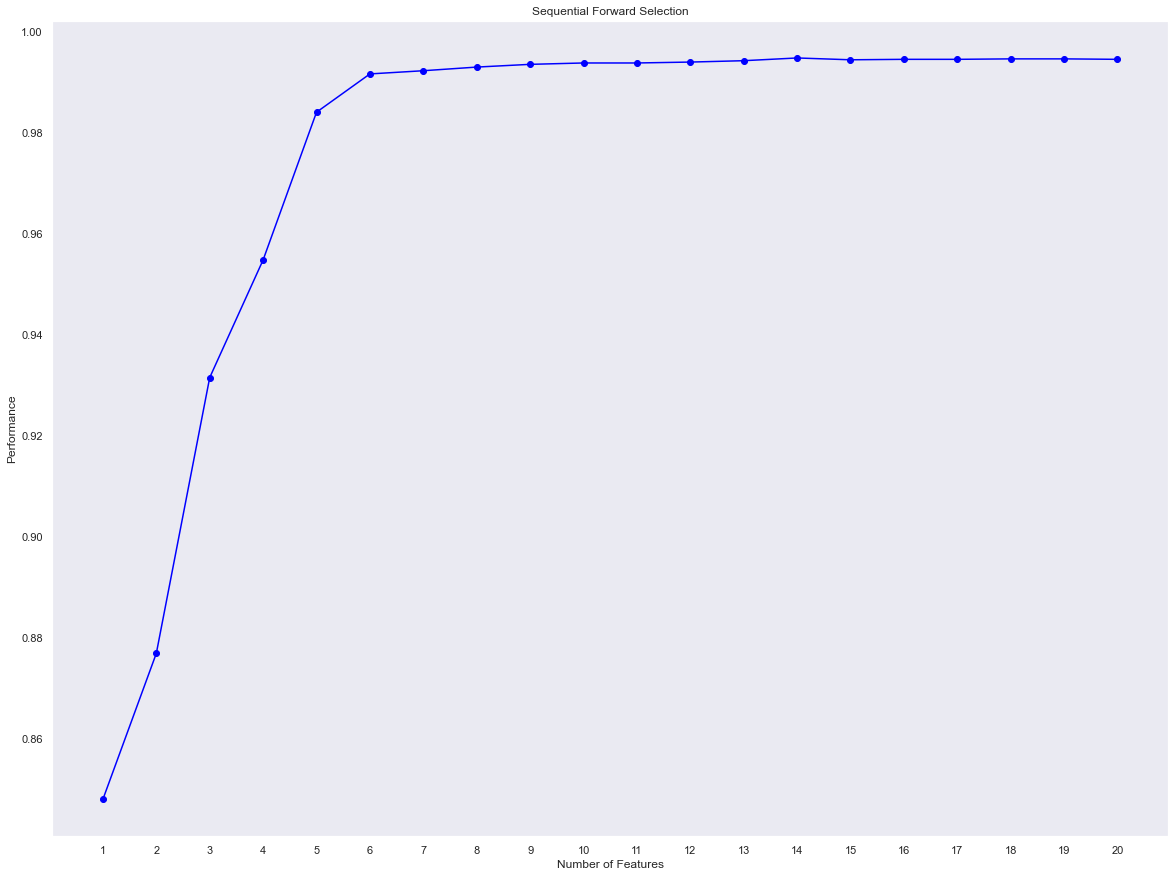

In [259]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err',figsize=(20, 15))

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()


In [260]:
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
df[["feature_idx","avg_score"]]


,feature_idx,avg_score
1,"(10,)",0.848083
2,"(10, 72)",0.876951
3,"(10, 72, 80)",0.931529
4,"(10, 29, 72, 80)",0.954804
5,"(1, 10, 29, 72, 80)",0.984032
6,"(1, 10, 28, 29, 72, 80)",0.99161
7,"(1, 10, 28, 29, 30, 72, 80)",0.992242
8,"(1, 10, 28, 29, 30, 32, 72, 80)",0.992963
9,"(1, 10, 23, 28, 29, 30, 32, 72, 80)",0.993505
10,"(1, 10, 16, 23, 28, 29, 30, 32, 72, 80)",0.993775


In [261]:
# Lets access the indices of the best features directly via the k_feature_idx_ attribute:
sfs1.k_feature_names_, sfs1.k_feature_idx_

(('loan_amnt',
  'funded_amnt',
  'sub_grade',
  'total_rec_late_fee',
  'recoveries',
  'derived_credit_pull_after_last_pay',
  'derived_issue_date',
  'derived_total_payment',
  'derived_term_b',
  'derived_purpose_b',
  'derived_outliers_installment_n',
  'derived_outliers_last_pymnt_amnt_n',
  'derived_outliers_total_pymnt_n',
  'derived_outliers_annual_inc_n',
  'derived_outliers_derived_pay_gap_n',
  'derived_outliers_derived_funded_amount&purpose_b',
  'derived_outliers_derived_gap_b',
  'purpose_other',
  'total_pymnt_woe',
  'installment_woe'),
 (0, 1, 4, 9, 10, 14, 15, 16, 17, 19, 23, 28, 29, 30, 32, 46, 49, 64, 72, 80))

In [262]:
sfs=list(sfs1.k_feature_names_)
sfs

['loan_amnt',
 'funded_amnt',
 'sub_grade',
 'total_rec_late_fee',
 'recoveries',
 'derived_credit_pull_after_last_pay',
 'derived_issue_date',
 'derived_total_payment',
 'derived_term_b',
 'derived_purpose_b',
 'derived_outliers_installment_n',
 'derived_outliers_last_pymnt_amnt_n',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_annual_inc_n',
 'derived_outliers_derived_pay_gap_n',
 'derived_outliers_derived_funded_amount&purpose_b',
 'derived_outliers_derived_gap_b',
 'purpose_other',
 'total_pymnt_woe',
 'installment_woe']

In [183]:
sfs=['loan_amnt',
 'funded_amnt',
 'sub_grade',
 'total_rec_late_fee',
 'recoveries',
 'derived_credit_pull_after_last_pay',
 'derived_issue_date',
 'derived_total_payment',
 'derived_term_b',
 'derived_purpose_b',
 'derived_outliers_installment_n',
 'derived_outliers_last_pymnt_amnt_n',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_annual_inc_n',
 'derived_outliers_derived_pay_gap_n',
 'derived_outliers_derived_funded_amount&purpose_b',
 'derived_outliers_derived_gap_b',
 'purpose_other',
 'total_pymnt_woe',
 'installment_woe']

## Embedded Method

**Wrapper methods provide better results in terms of performance, but they’ll also cost us a lot of computation time/resources.so if we could include the feature selection process in ML model training itself? That could lead us to even better features for that model, in a shorter amount of time. This is where embedded methods come into play.**

**Embedded methods,they perform feature selection during the model training, which is why we call them embedded methods.**

### Embedded Methods: Advantages

**The embedded method solves both issues we encountered with the filter and wrapper methods by combining their advantages. Here’s how:**

**They take into consideration the interaction of features like wrapper methods do.**
<BR>**They are faster like filter methods.**
<BR>**They are more accurate than filter methods.**
<BR>**They find the feature subset for the algorithm being trained.**
<BR>**They are much less prone to overfitting.**

### Feature Selection using Regularization
**As model complexity increases, the bias of the model decreases and variance increases (and vice-versa). By using various regularization techniques, we can try to achieve low training and testing error so that we’re able to trade-off bias and variance perfectly.**

**Regularization in machine learning adds a penalty to the different parameters of a model to reduce its freedom(avoid overfitting). This penalty is applied to the coefficient that multiplies each of the features in the linear model, and is done to avoid overfitting, make the model robust to noise, and to improve its generalization.**

**There are three main types of regularization for linear models:**

<BR> **lasso regression or L1 regularization**
<BR> **ridge regression or L2 regularization**
<BR> **elastic nets or L1/L2 regularization**

### Lasso Regression L1 Regularisation
**Lasso is exactly same as Ridge, in the sense that it also adds penalty. But instead of the squared slope/coefficient/weight, it adds the absolute value of the slope/weight as the penalty to Sum squared Error loss function.**



**If we take various values of penalty parameter Lambda or Alpha and try to get output with both Lasso and Ridge regression regularizations in the linear regression line eguation where we have multiple variables then you will notice that ,Lasso quickly made the coefficient of X to Zero whereas Ridge could reduce it to near zero with large values of Lambda. But Ridge was unable to make it zero even with Lambda as 100 or even 1000. So in this way we can say that Lasso can reduce the no of unrequired features very quickly.**

**A tuning parameter, λ controls the strength of the L1. λ is basically the amount of shrinkage:**

**When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.
As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).
As λ increases, bias increases.
As λ decreases, variance increases.**

**If an intercept is included in the model, it is usually left unchanged.**

### L2 regularization
**It doesn’t set the coefficient to zero, but only approaching zero—that’s why we use only L1 in feature selection.**

### L1/L2 regularization or Elastic Nets
**It is a combination of the L1 and L2. It incorporates their penalties, and therefore we can end up with features with zero as a coefficient—similar to L1.**

In [14]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR,Lasso
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

In [198]:
X = dev_final[model_feat]
y = dev_final["label"]

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size =0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(177369, 84)
(44343, 84)
(177369,)
(44343,)


In [200]:
# Lets apply the Lasso Model -- in Linear Dataset
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [201]:
coeff = lasso.coef_
coeff

array([ 3.80647553e-06,  4.79227370e-05,  0.00000000e+00,  0.00000000e+00,
        5.63420276e-03,  3.75631561e-07,  1.16416327e-04, -1.02234614e-04,
       -1.76189597e-06,  1.13702108e-03,  5.59770981e-05, -1.37031838e-06,
       -6.01791718e-07, -4.84287740e-06,  0.00000000e+00,  2.10337408e-06,
       -1.26105272e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.06261166e-05,
       -0.00000000e+00, -0.00000000e+00,  5.08101176e-07,  1.09811745e-07,
       -1.77768003e-06, -4.41976452e-05, -6.70838725e-07,  5.52231706e-06,
       -8.49556542e-06,  9.81847390e-05,  4.04933627e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [202]:
features = X.columns
features

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'dti', 'delinq_2yrs', 'pub_rec', 'total_rec_late_fee',
       'recoveries', 'acc_now_delinq', 'derived_overfunding',
       'derived_funded_amount&purpose', 'derived_credit_pull_after_last_pay',
       'derived_issue_date', 'derived_total_payment', 'derived_term_b',
       'derived_subgrade_b', 'derived_purpose_b', 'derived_home_b',
       'derived_delinq_b', 'derived_inquiry_b',
       'derived_outliers_installment_n', 'derived_outliers_inq_last_6mths_n',
       'derived_outliers_total_acc_n', 'derived_outliers_revol_bal_n',
       'derived_outliers_revol_util_n', 'derived_outliers_last_pymnt_amnt_n',
       'derived_outliers_total_pymnt_n', 'derived_outliers_annual_inc_n',
       'derived_outliers_derived_duration_n',
       'derived_outliers_derived_pay_gap_n', 'derived_outliers_derived_gap_n',
       'derived_outliers_derived_credit_line_n', 'derived_outliers_int_rate_b',
       'derived_outli

In [203]:
df_coeff = pd.DataFrame({"features":features,"coeff":coeff})
df_coeff.sort_values("coeff")

,features,coeff
7,delinq_2yrs,-1.022346e-04
29,derived_outliers_total_pymnt_n,-4.419765e-05
32,derived_outliers_derived_pay_gap_n,-8.495565e-06
13,derived_funded_amount&purpose,-4.842877e-06
28,derived_outliers_last_pymnt_amnt_n,-1.777680e-06
8,pub_rec,-1.761896e-06
11,acc_now_delinq,-1.370318e-06
16,derived_total_payment,-1.261053e-06
30,derived_outliers_annual_inc_n,-6.708387e-07
12,derived_overfunding,-6.017917e-07


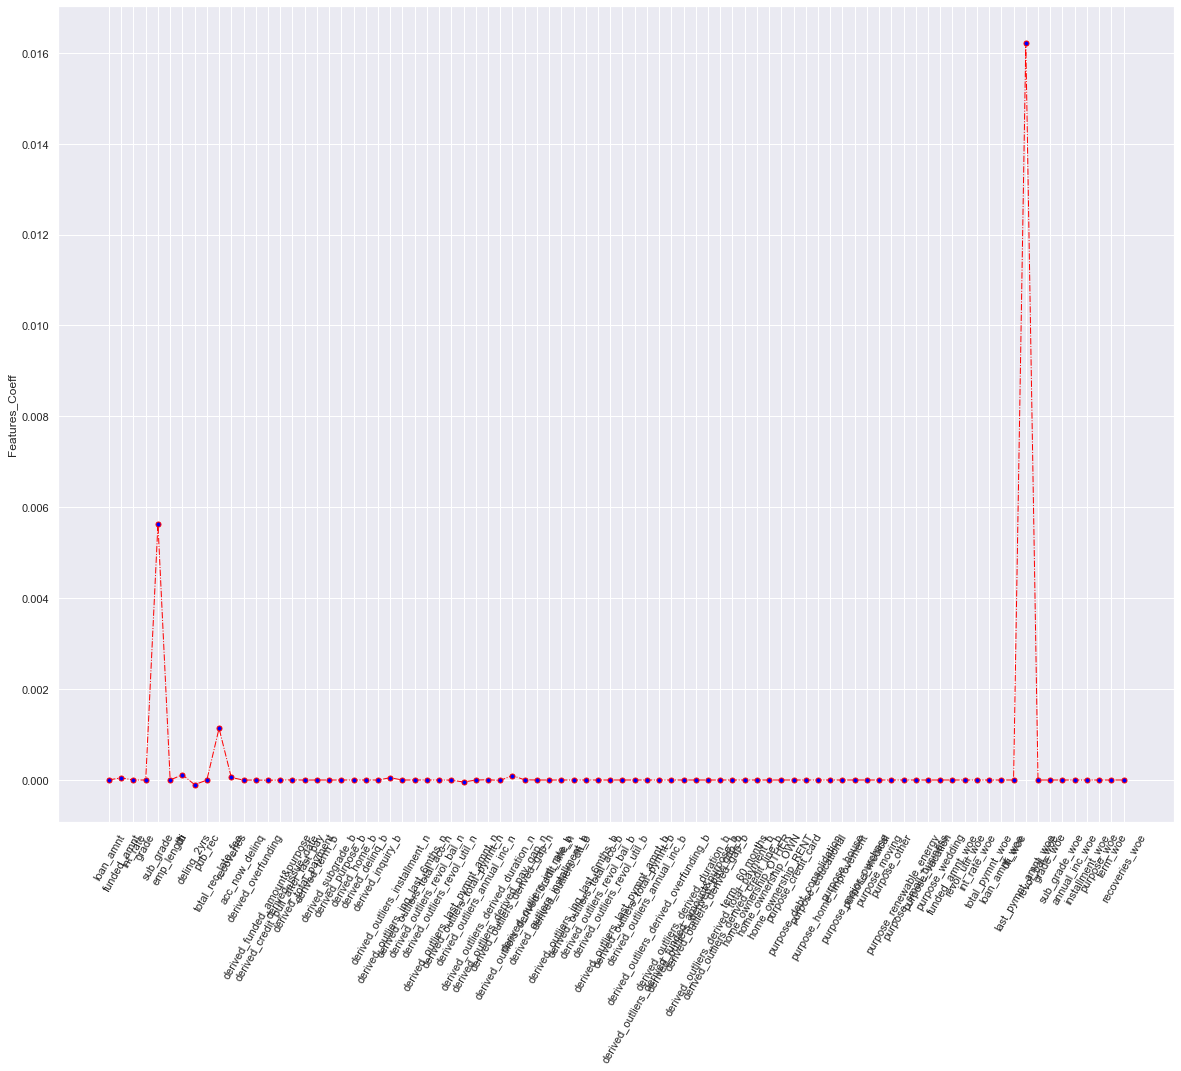

<Figure size 2160x3600 with 0 Axes>

In [204]:
# Lets plot the coeff with features
plt.figure(figsize=(20,15))
plt.plot(range(len(features)),coeff, color='red', linestyle='dashdot', linewidth = 1,marker='o', 
         markerfacecolor='blue', markersize=5)
plt.xticks(range(len(features)),features,rotation=60)
plt.ylabel("Features_Coeff")
plt.figure(figsize=(30,50))
plt.show()

<AxesSubplot:xlabel='features', ylabel='coeff'>

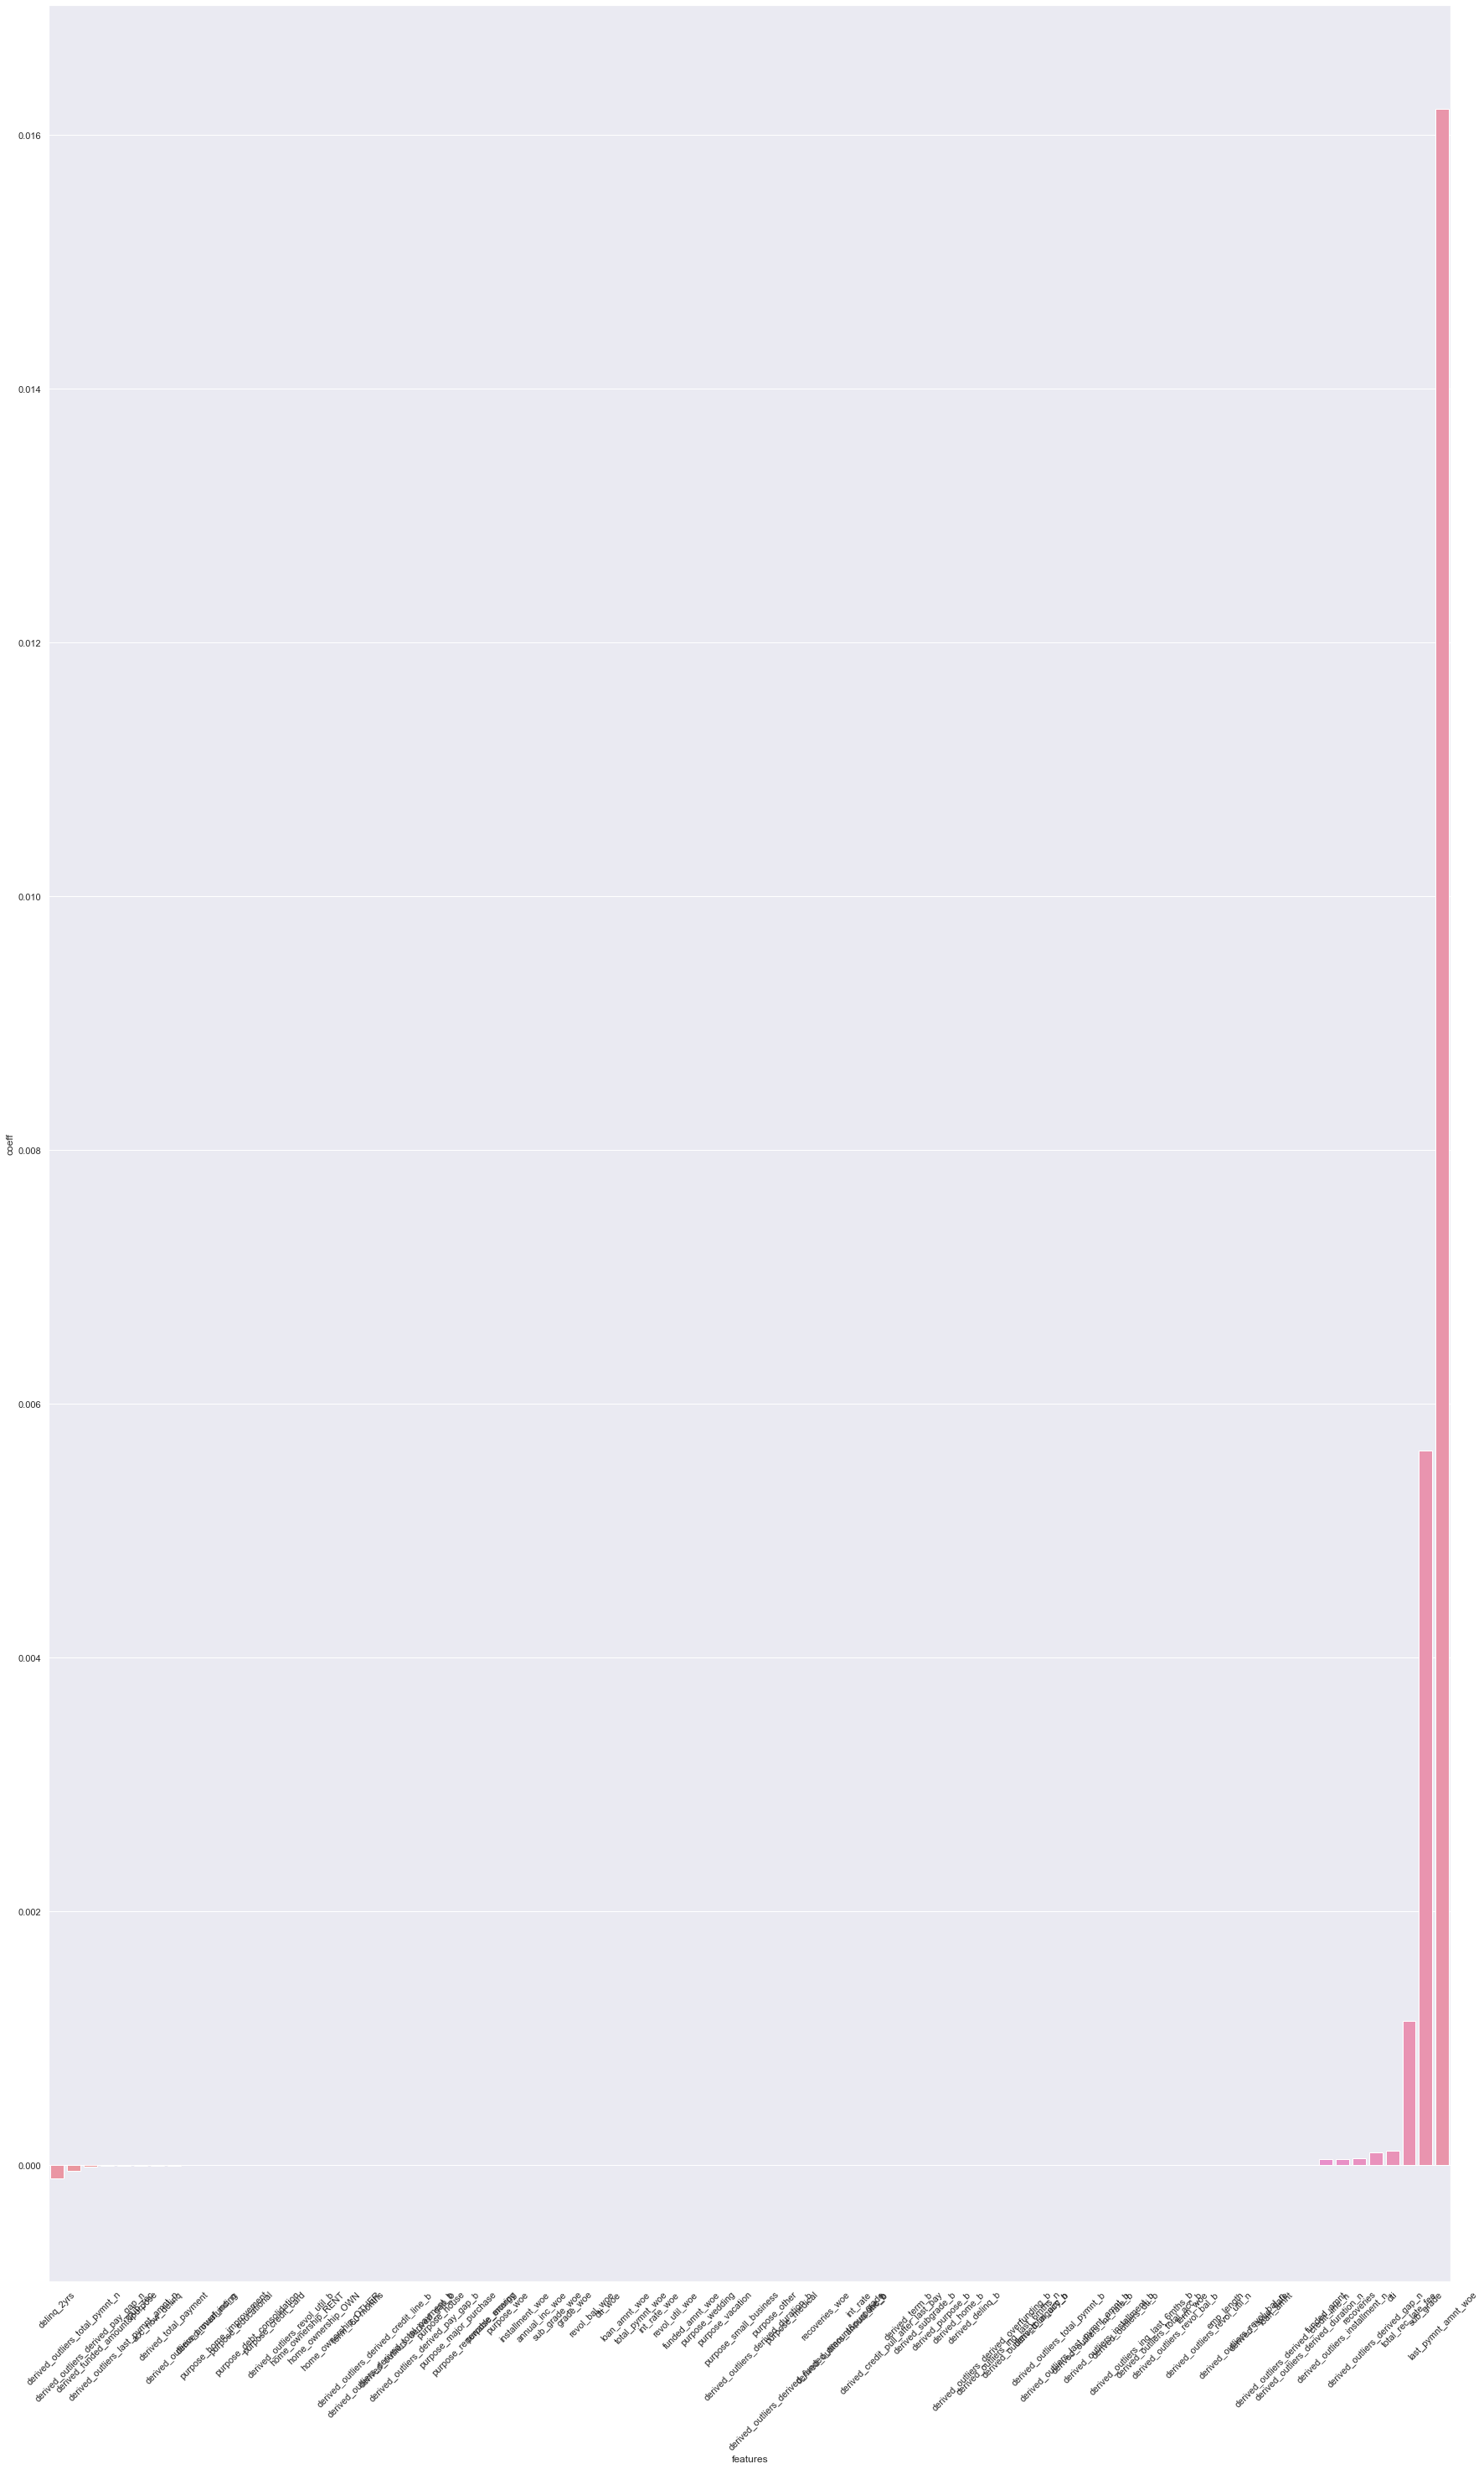

In [205]:
# Use Bar chart to show coeff
df_coeff.set_index('coeff')
# sort in ascending order to better visualization.
df_coeff = df_coeff.sort_values('coeff')
# plot the feature coeff in bars.
plt.figure(figsize=(30,50))
plt.xticks(rotation=45)
sns.barplot(x="features",y= "coeff", data=df_coeff)

In [206]:

df_coeff=df_coeff[(df_coeff['coeff'] > 0) | (df_coeff['coeff'] < 0)]
df_coeff

,features,coeff
7,delinq_2yrs,-1.022346e-04
29,derived_outliers_total_pymnt_n,-4.419765e-05
32,derived_outliers_derived_pay_gap_n,-8.495565e-06
13,derived_funded_amount&purpose,-4.842877e-06
28,derived_outliers_last_pymnt_amnt_n,-1.777680e-06
8,pub_rec,-1.761896e-06
11,acc_now_delinq,-1.370318e-06
16,derived_total_payment,-1.261053e-06
30,derived_outliers_annual_inc_n,-6.708387e-07
12,derived_overfunding,-6.017917e-07


In [207]:
lasso = df_coeff['features'].tolist()

In [208]:
lasso

['delinq_2yrs',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_derived_pay_gap_n',
 'derived_funded_amount&purpose',
 'derived_outliers_last_pymnt_amnt_n',
 'pub_rec',
 'acc_now_delinq',
 'derived_total_payment',
 'derived_outliers_annual_inc_n',
 'derived_overfunding',
 'derived_outliers_revol_util_n',
 'emp_length',
 'derived_outliers_revol_bal_n',
 'derived_issue_date',
 'loan_amnt',
 'derived_outliers_derived_credit_line_n',
 'derived_outliers_derived_duration_n',
 'funded_amnt',
 'derived_outliers_installment_n',
 'recoveries',
 'derived_outliers_derived_gap_n',
 'dti',
 'total_rec_late_fee',
 'sub_grade',
 'last_pymnt_amnt_woe']

In [184]:
lasso=['delinq_2yrs',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_derived_pay_gap_n',
 'derived_funded_amount&purpose',
 'pub_rec',
 'derived_outliers_last_pymnt_amnt_n',
 'acc_now_delinq',
 'derived_total_payment',
 'derived_outliers_annual_inc_n',
 'derived_outliers_revol_util_n',
 'emp_length',
 'derived_outliers_revol_bal_n',
 'derived_overfunding',
 'derived_issue_date',
 'loan_amnt',
 'derived_outliers_derived_duration_n',
 'derived_outliers_derived_credit_line_n',
 'funded_amnt',
 'derived_outliers_installment_n',
 'recoveries',
 'derived_outliers_derived_gap_n',
 'total_rec_late_fee',
 'sub_grade',
 'last_pymnt_amnt_woe']


## Checking for best features out of all these above methods of featutre selection

## From Catboost

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dev_final[Top_Feat_cat], dev_final['label'], 
                                                    test_size = 0.2, stratify = dev_final['label'],random_state=32)

In [266]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred_logistic=logmodel.predict(X_test)

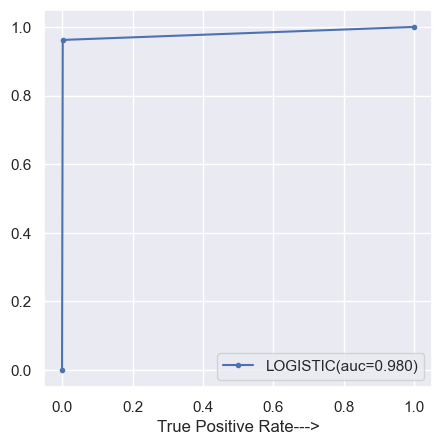

In [267]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()

## For Random Tree Features

In [268]:
X_train, X_test, y_train, y_test = train_test_split(dev_final[Top_Feat_rf], dev_final['label'], 
                                                    test_size = 0.2, stratify = dev_final['label'],random_state=32)

In [269]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)
y_pred_logistic=logmodel.predict(X_test)

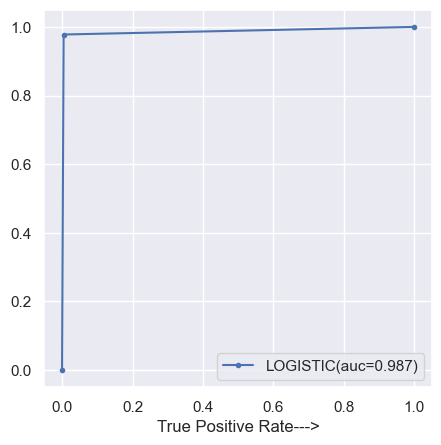

In [270]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()

## From Forward Selection

In [271]:
X_train, X_test, y_train, y_test = train_test_split(dev_final[sfs], dev_final['label'], 
                                                    test_size = 0.2, stratify = dev_final['label'],random_state=32)

In [272]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred_logistic=logmodel.predict(X_test)

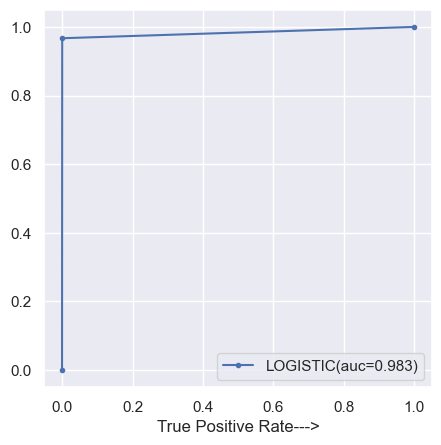

In [273]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()

## From Lasso

In [274]:
X_train, X_test, y_train, y_test = train_test_split(dev_final[lasso], dev_final['label'], 
                                                    test_size = 0.2, stratify = dev_final['label'],random_state=32)

In [275]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred_logistic=logmodel.predict(X_test)

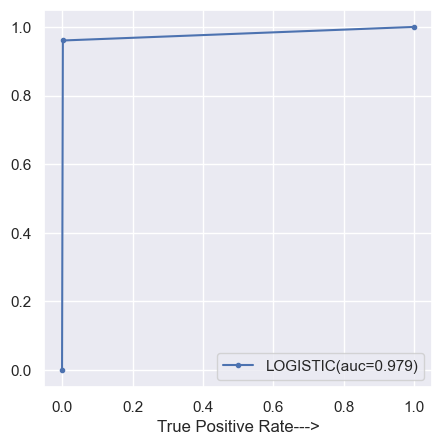

In [276]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
logistic_fpr, logistic_tpr,threshold=roc_curve(y_test,y_pred_logistic)
auc_logistic=auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr, logistic_tpr,marker='.',label='LOGISTIC(auc=%.3f)'%auc_logistic)

plt.xlabel('False Positive Rate--->')
plt.xlabel('True Positive Rate--->')

plt.legend()
plt.show()

In [277]:
correlation =dev_final[Top_Feat_rf].corr()
correlation

,derived_outliers_last_pymnt_amnt_n,last_pymnt_amnt_woe,derived_outliers_total_pymnt_n,derived_outliers_derived_pay_gap_n,total_pymnt_woe,recoveries,derived_total_payment,funded_amnt,derived_credit_pull_after_last_pay,int_rate,derived_outliers_derived_duration_n,derived_outliers_installment_n,loan_amnt,installment_woe,grade_woe,sub_grade,funded_amnt_woe,grade,loan_amnt_woe,sub_grade_woe,derived_funded_amount&purpose,derived_outliers_derived_total_payment_b,derived_outliers_last_pymnt_amnt_b,int_rate_woe,term_woe,total_rec_late_fee,derived_overfunding,derived_outliers_derived_pay_gap_b
derived_outliers_last_pymnt_amnt_n,1.000000,-0.786352,0.692878,0.643408,-0.610387,-0.158400,-0.037557,0.507815,-0.093689,0.073042,-0.050097,0.465983,0.505639,0.417419,0.066163,0.074969,0.486910,0.071521,0.484942,0.068625,0.489014,-0.126177,0.531814,0.064142,0.262199,-0.089483,0.469934,0.447910
last_pymnt_amnt_woe,-0.786352,1.000000,-0.470024,-0.473641,0.515307,0.216778,0.046915,-0.190966,0.078906,0.056179,0.062052,-0.186676,-0.189627,-0.229896,0.056645,0.065852,-0.194230,0.064344,-0.193187,0.055003,-0.168069,0.163642,-0.214496,0.050595,-0.052145,0.120693,-0.154429,-0.182314
derived_outliers_total_pymnt_n,0.692878,-0.470024,1.000000,0.496067,-0.878936,-0.058639,-0.063479,0.787431,-0.141903,0.088595,-0.076703,0.777653,0.786621,0.657934,0.053197,0.072380,0.749815,0.067690,0.749389,0.053817,0.764591,-0.206887,0.443828,0.077340,0.237651,-0.011260,0.739087,0.427555
derived_outliers_derived_pay_gap_n,0.643408,-0.473641,0.496067,1.000000,-0.404713,-0.042811,0.500503,0.417030,-0.128784,0.079908,0.647083,0.379738,0.414864,0.328947,0.080329,0.090101,0.396061,0.087206,0.394297,0.081963,0.406596,-0.050153,0.377175,0.070331,0.224967,-0.079512,0.392775,0.382119
total_pymnt_woe,-0.610387,0.515307,-0.878936,-0.404713,1.000000,0.039349,0.087869,-0.641718,0.146888,-0.002984,0.107967,-0.649760,-0.641378,-0.649711,0.033526,0.020657,-0.645922,0.022821,-0.645290,0.033269,-0.609949,0.302048,-0.280514,0.002191,-0.162762,0.017580,-0.584249,-0.270472
recoveries,-0.158400,0.216778,-0.058639,-0.042811,0.039349,1.000000,-0.009049,0.161574,0.113714,0.160972,0.039204,0.146709,0.161461,0.115695,0.133866,0.153665,0.151360,0.149565,0.151238,0.132421,0.159898,-0.018302,-0.041906,0.145930,0.144329,0.065166,0.155304,-0.033776
derived_total_payment,-0.037557,0.046915,-0.063479,0.500503,0.087869,-0.009049,1.000000,0.005067,-0.069438,0.009011,0.773801,0.002329,0.004845,-0.003436,0.017076,0.017770,0.002299,0.017844,0.002146,0.016927,0.008066,-0.006972,-0.008693,0.008415,0.010642,-0.006633,0.009191,-0.008803
funded_amnt,0.507815,-0.190966,0.787431,0.417030,-0.641718,0.161574,0.005067,1.000000,-0.012551,0.219072,-0.001439,0.961990,0.997776,0.800052,0.182643,0.218190,0.941912,0.210224,0.940909,0.183431,0.974117,-0.124496,0.428527,0.191730,0.402343,0.062474,0.942257,0.413956
derived_credit_pull_after_last_pay,-0.093689,0.078906,-0.141903,-0.128784,0.146888,0.113714,-0.069438,-0.012551,1.000000,0.103768,-0.088525,-0.004731,-0.013363,0.009514,0.095666,0.092733,-0.007318,0.090455,-0.008299,0.095386,-0.022235,0.061474,-0.062081,0.101321,0.017657,0.008555,-0.025916,-0.060027
int_rate,0.073042,0.056179,0.088595,0.079908,-0.002984,0.160972,0.009011,0.219072,0.103768,1.000000,0.021173,0.207356,0.217386,0.171362,0.930298,0.966897,0.204706,0.946888,0.202907,0.924989,0.224779,0.035933,0.129026,0.947063,0.452538,0.064403,0.220646,0.111238


In [278]:
numerics = ['int64', 'float64']
num_columns =dev_final[Top_Feat_rf].select_dtypes(include=numerics).columns

In [279]:
for column1 in dev_final[num_columns]:
     for column2 in dev_final[num_columns]:
        if column1!=column2 and dev_final[column1].corr(dev_final[column2])>=0.9:
             print(f"{column1} and {column2} are highly correlated")


funded_amnt and derived_outliers_installment_n are highly correlated
funded_amnt and loan_amnt are highly correlated
funded_amnt and funded_amnt_woe are highly correlated
funded_amnt and loan_amnt_woe are highly correlated
funded_amnt and derived_funded_amount&purpose are highly correlated
funded_amnt and derived_overfunding are highly correlated
int_rate and grade_woe are highly correlated
int_rate and sub_grade are highly correlated
int_rate and grade are highly correlated
int_rate and sub_grade_woe are highly correlated
int_rate and int_rate_woe are highly correlated
derived_outliers_installment_n and funded_amnt are highly correlated
derived_outliers_installment_n and loan_amnt are highly correlated
derived_outliers_installment_n and funded_amnt_woe are highly correlated
derived_outliers_installment_n and loan_amnt_woe are highly correlated
derived_outliers_installment_n and derived_funded_amount&purpose are highly correlated
derived_outliers_installment_n and derived_overfunding a

In [280]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [281]:
def vif(Z3):
    vif_data = pd.DataFrame()
    vif_data["feature"] = Z3.columns
    vif_data["VIF"] = [variance_inflation_factor(np.array(Z3), i)
    for i in range(len(Z3.columns))]
    return vif_data

In [284]:
vif_df=vif(dev_final[num_columns])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
7,funded_amnt,2929.618133
12,loan_amnt,2424.107461
20,derived_funded_amount&purpose,560.092447
18,loan_amnt_woe,548.608667
16,funded_amnt_woe,544.553097
26,derived_overfunding,323.591521
11,derived_outliers_installment_n,287.708799
15,sub_grade,189.863608
9,int_rate,162.929070
17,grade,154.933353


In [285]:
len(num_columns)

28

In [286]:
vif_list=[i for i in num_columns if i not in ['funded_amnt']]
vif_list

['derived_outliers_last_pymnt_amnt_n',
 'last_pymnt_amnt_woe',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_derived_pay_gap_n',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'int_rate',
 'derived_outliers_derived_duration_n',
 'derived_outliers_installment_n',
 'loan_amnt',
 'installment_woe',
 'grade_woe',
 'sub_grade',
 'funded_amnt_woe',
 'grade',
 'loan_amnt_woe',
 'sub_grade_woe',
 'derived_funded_amount&purpose',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [287]:
vif_df=vif(dev_final[vif_list])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
19,derived_funded_amount&purpose,511.705404
11,loan_amnt,461.922942
25,derived_overfunding,299.346105
17,loan_amnt_woe,267.551871
15,funded_amnt_woe,265.946651
10,derived_outliers_installment_n,264.283227
14,sub_grade,188.771328
8,int_rate,162.103979
16,grade,154.927969
13,grade_woe,66.413031


In [288]:
vif_list=[i for i in vif_list if i not in ['derived_funded_amount&purpose']]
vif_list

['derived_outliers_last_pymnt_amnt_n',
 'last_pymnt_amnt_woe',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_derived_pay_gap_n',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'int_rate',
 'derived_outliers_derived_duration_n',
 'derived_outliers_installment_n',
 'loan_amnt',
 'installment_woe',
 'grade_woe',
 'sub_grade',
 'funded_amnt_woe',
 'grade',
 'loan_amnt_woe',
 'sub_grade_woe',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [289]:
vif_df=vif(dev_final[vif_list])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
10,derived_outliers_installment_n,262.987049
11,loan_amnt,254.796843
17,loan_amnt_woe,239.301306
15,funded_amnt_woe,238.627745
14,sub_grade,188.364528
8,int_rate,160.512568
16,grade,154.617527
13,grade_woe,66.257578
18,sub_grade_woe,45.725943
2,derived_outliers_total_pymnt_n,30.151378


In [290]:
vif_list=[i for i in vif_list if i not in ['derived_outliers_installment_n']]
vif_list

['derived_outliers_last_pymnt_amnt_n',
 'last_pymnt_amnt_woe',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_derived_pay_gap_n',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'int_rate',
 'derived_outliers_derived_duration_n',
 'loan_amnt',
 'installment_woe',
 'grade_woe',
 'sub_grade',
 'funded_amnt_woe',
 'grade',
 'loan_amnt_woe',
 'sub_grade_woe',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [291]:
vif_df=vif(dev_final[vif_list])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
16,loan_amnt_woe,210.268246
14,funded_amnt_woe,204.817017
13,sub_grade,187.377909
8,int_rate,160.109218
15,grade,154.229424
12,grade_woe,66.208240
10,loan_amnt,60.406579
17,sub_grade_woe,45.647857
2,derived_outliers_total_pymnt_n,30.092249
0,derived_outliers_last_pymnt_amnt_n,15.712599


In [292]:
vif_list=[i for i in vif_list if i not in ['loan_amnt_woe']]
vif_list

['derived_outliers_last_pymnt_amnt_n',
 'last_pymnt_amnt_woe',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_derived_pay_gap_n',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'int_rate',
 'derived_outliers_derived_duration_n',
 'loan_amnt',
 'installment_woe',
 'grade_woe',
 'sub_grade',
 'funded_amnt_woe',
 'grade',
 'sub_grade_woe',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [293]:
vif_df=vif(dev_final[vif_list])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
13,sub_grade,185.539166
8,int_rate,154.170064
15,grade,153.958786
12,grade_woe,66.089397
10,loan_amnt,56.536020
16,sub_grade_woe,45.563542
2,derived_outliers_total_pymnt_n,30.035841
0,derived_outliers_last_pymnt_amnt_n,15.698415
3,derived_outliers_derived_pay_gap_n,15.188128
19,int_rate_woe,13.354145


In [294]:
vif_list=[i for i in vif_list if i not in ['sub_grade']]
vif_list

['derived_outliers_last_pymnt_amnt_n',
 'last_pymnt_amnt_woe',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_derived_pay_gap_n',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'int_rate',
 'derived_outliers_derived_duration_n',
 'loan_amnt',
 'installment_woe',
 'grade_woe',
 'funded_amnt_woe',
 'grade',
 'sub_grade_woe',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [295]:
vif_df=vif(dev_final[vif_list])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
8,int_rate,114.472400
14,grade,66.979229
10,loan_amnt,54.385132
12,grade_woe,53.177912
15,sub_grade_woe,35.278948
2,derived_outliers_total_pymnt_n,29.949009
0,derived_outliers_last_pymnt_amnt_n,15.698023
3,derived_outliers_derived_pay_gap_n,15.183598
18,int_rate_woe,13.324049
13,funded_amnt_woe,10.226655


In [296]:
vif_list=[i for i in vif_list if i not in ['int_rate']]
vif_list

['derived_outliers_last_pymnt_amnt_n',
 'last_pymnt_amnt_woe',
 'derived_outliers_total_pymnt_n',
 'derived_outliers_derived_pay_gap_n',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'derived_outliers_derived_duration_n',
 'loan_amnt',
 'installment_woe',
 'grade_woe',
 'funded_amnt_woe',
 'grade',
 'sub_grade_woe',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [297]:
vif_df=vif(dev_final[vif_list])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
11,grade_woe,43.986175
9,loan_amnt,38.533087
14,sub_grade_woe,34.543171
2,derived_outliers_total_pymnt_n,29.436346
13,grade,28.156683
0,derived_outliers_last_pymnt_amnt_n,15.696059
3,derived_outliers_derived_pay_gap_n,15.181859
17,int_rate_woe,10.070381
12,funded_amnt_woe,9.696396
8,derived_outliers_derived_duration_n,7.258858


In [313]:
vif_list=[i for i in vif_list if i not in ['grade_woe']]
vif_list

['last_pymnt_amnt_woe',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'derived_outliers_derived_duration_n',
 'installment_woe',
 'sub_grade_woe',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [314]:
vif_df=vif(dev_final[vif_list])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
7,sub_grade_woe,9.872628
10,int_rate_woe,9.617746
13,derived_overfunding,3.303910
1,total_pymnt_woe,2.839064
6,installment_woe,2.685202
5,derived_outliers_derived_duration_n,2.565318
3,derived_total_payment,2.541548
9,derived_outliers_last_pymnt_amnt_b,2.388766
14,derived_outliers_derived_pay_gap_b,2.312868
0,last_pymnt_amnt_woe,2.214100


In [315]:
vif_list=[i for i in vif_list if i not in ['sub_grade_woe']]
vif_list

['last_pymnt_amnt_woe',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'derived_outliers_derived_duration_n',
 'installment_woe',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [316]:
vif_df=vif(dev_final[vif_list])
vif_df.sort_values(by=['VIF'],ascending=False)

,feature,VIF
12,derived_overfunding,3.300504
1,total_pymnt_woe,2.801385
6,installment_woe,2.684854
5,derived_outliers_derived_duration_n,2.565227
3,derived_total_payment,2.541183
8,derived_outliers_last_pymnt_amnt_b,2.388588
13,derived_outliers_derived_pay_gap_b,2.311040
0,last_pymnt_amnt_woe,2.211267
4,derived_credit_pull_after_last_pay,1.959031
10,term_woe,1.390835


In [189]:
dev_final

,member_id,loan_amnt,funded_amnt,int_rate,grade,sub_grade,emp_length,dti,delinq_2yrs,pub_rec,total_rec_late_fee,recoveries,acc_now_delinq,label,derived_overfunding,derived_funded_amount&purpose,derived_credit_pull_after_last_pay,derived_issue_date,derived_total_payment,derived_term_b,derived_subgrade_b,derived_purpose_b,derived_home_b,derived_delinq_b,derived_inquiry_b,derived_outliers_installment_n,derived_outliers_inq_last_6mths_n,derived_outliers_total_acc_n,derived_outliers_revol_bal_n,derived_outliers_revol_util_n,derived_outliers_last_pymnt_amnt_n,derived_outliers_total_pymnt_n,derived_outliers_annual_inc_n,derived_outliers_derived_duration_n,derived_outliers_derived_pay_gap_n,derived_outliers_derived_gap_n,derived_outliers_derived_credit_line_n,derived_outliers_int_rate_b,derived_outliers_installment_b,derived_outliers_dti_b,derived_outliers_inq_last_6mths_b,derived_outliers_total_acc_b,derived_outliers_revol_bal_b,derived_outliers_revol_util_b,derived_outliers_last_pymnt_amnt_b,derived_outliers_total_pymnt_b,derived_outliers_annual_inc_b,derived_outliers_derived_overfunding_b,derived_outliers_derived_funded_amount&purpose_b,derived_outliers_derived_duration_b,derived_outliers_derived_pay_gap_b,derived_outliers_derived_gap_b,derived_outliers_derived_total_payment_b,derived_outliers_derived_credit_line_b,term_ 60 months,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_woe,last_pymnt_amnt_woe,revol_util_woe,dti_woe,int_rate_woe,loan_amnt_woe,term_woe,recoveries_woe,installment_woe,funded_amnt_woe,revol_bal_woe,total_pymnt_woe,annual_inc_woe,sub_grade_woe,purpose_woe
0,38670667,19200,19200,17.86,3,19,2.0,16.36,0.0,0.0,0.000000,0.0,0.0,0,-800.0,6700.0,0,1.0,14.462668,0,1,1,0,0,0,486.10,2.0,35.0,22211.0,35.7,73.97,22578.590000,65000.0,23.0,11398.290000,295.0,-9852.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.476094,1.269332,-0.197543,-0.032737,0.471160,0.169930,0.636597,0.0,0.031499,0.174019,0.047502,-2.154813,-0.088769,0.810343,0.064681
1,32639050,13000,13000,16.29,3,16,2.0,25.54,0.0,0.0,0.000000,0.0,0.0,1,-7000.0,500.0,0,0.0,12.113277,0,1,1,1,0,0,318.15,0.0,6.0,5959.0,99.3,318.15,4430.570000,45289.0,23.0,-2886.880000,118.0,-4383.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.476094,1.269332,0.377055,0.215425,0.471160,-0.042290,0.636597,0.0,0.031499,-0.042550,-0.032021,1.653555,0.069083,0.257140,0.064681
2,46112143,10000,10000,13.99,2,13,6.0,1.91,0.0,2.0,0.000000,0.0,0.0,1,-10000.0,-2500.0,1,1.0,11.582989,0,0,1,0,0,0,341.73,2.0,30.0,1617.0,15.4,341.73,3067.800000,150000.0,0.0,3067.800000,200.0,-6220.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.109605,1.269332,-0.530883,-0.460038,-0.309779,-0.042290,-0.237815,0.0,0.031499,-0.042550,-0.163906,1.653555,-0.266144,0.257140,0.064681
3,1894269,26000,26000,19.05,3,18,2.0,16.05,4.0,0.0,0.000000,0.0,0.0,0,6000.0,13500.0,1,1.0,14.983750,0,1,1,0,0,0,675.17,0.0,29.0,17242.0,84.6,21601.15,32400.992000,112600.0,23.0,16872.082000,188.0,-6566.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.476094,-5.549991,0.184604,-0.032737,0.877437,0.347003,0.636597,0.0,0.181062,0.347653,0.047502,-2.154813,-0.266144,0.810343,0.064681
4,1680080,3800,3800,19.05,3,18,0.0,18.19,0.0,0.0,14.933281,0.0,0.0,0,-15025.0,-8200.0,1,0.0,12.296153,0,1,0,0,0,0,139.39,0.0,20.0,3614.0,95.1,7.46,5029.339787,62000.0,35.0,150.689787,106.0,-4391.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.476094,1.269332,0.377055,-0.032737,0.877437,-0.244073,-0.237815,0.0,-0.342899,-0.245160,-0.032021,0.172272,0.069083,0.810343,-0.186638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [168]:
vif_list=['last_pymnt_amnt_woe',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'derived_outliers_derived_duration_n',
 'installment_woe',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [169]:
dev_final[vif_list]

,last_pymnt_amnt_woe,total_pymnt_woe,recoveries,derived_total_payment,derived_credit_pull_after_last_pay,derived_outliers_derived_duration_n,installment_woe,derived_outliers_derived_total_payment_b,derived_outliers_last_pymnt_amnt_b,int_rate_woe,term_woe,total_rec_late_fee,derived_overfunding,derived_outliers_derived_pay_gap_b
0,-3.928858,-0.776936,0.0,13.379997,1,23.0,0.031231,0,0,0.037587,-0.238345,0.00,-9950.0,0
1,-5.662761,-1.726650,0.0,15.056312,0,12.0,0.184635,0,0,0.037587,0.637255,65.12,9175.0,1
2,1.267931,0.071415,0.0,12.788789,1,35.0,-0.210343,0,0,-0.450070,-0.238345,0.00,-12825.0,0
3,-5.662761,-0.776936,0.0,13.689091,1,12.0,0.031231,0,0,0.477317,0.637255,0.00,-8687.5,0
4,1.267931,0.071415,0.0,12.847654,0,24.0,-0.210343,0,0,0.037587,-0.238345,0.00,-14000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221707,1.267931,0.071415,0.0,12.691200,1,12.0,0.031231,0,0,0.477317,0.637255,0.00,-5000.0,0
221708,-5.662761,-1.726650,0.0,14.443462,1,12.0,0.184635,0,0,0.037587,-0.238345,0.00,0.0,0
221709,1.267931,1.086432,0.0,12.506628,1,35.0,-0.210343,0,0,-0.450070,-0.238345,0.00,-7200.0,0
221710,1.267931,1.086432,0.0,12.300284,1,12.0,0.031231,0,0,0.477317,-0.238345,0.00,-8825.0,0


## <center> End of Step 3
**[Click here to go back to Content](#Notebook-Description:)**

***

# Step 4: Model Training and Hyperparameter Tuning

#### In this step we will prepare the final model using top features selected from previous step

- Train different ML Algorithms with default parameters and compare performance KPIs - AUC, Accuracy, Precision, Recall
- Bias-Variance Trade-off (Compare Train-Test KPIs)
- Select best model and perform hyper-parameter tuning
- Select optimal set of parameters and finalize model

### Output of this step is final model pkl file

## Logistic Regression

In [170]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [183]:

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(dev_final[vif_list], dev_final['label'], 
                                                    test_size = 0.2, stratify = dev_final['label'],random_state=42)

In [184]:
dev_final[vif_list].head()

,last_pymnt_amnt_woe,total_pymnt_woe,recoveries,derived_total_payment,derived_credit_pull_after_last_pay,derived_outliers_derived_duration_n,installment_woe,derived_outliers_derived_total_payment_b,derived_outliers_last_pymnt_amnt_b,int_rate_woe,term_woe,total_rec_late_fee,derived_overfunding,derived_outliers_derived_pay_gap_b
0,-3.928858,-0.776936,0.0,13.379997,1,23.0,0.031231,0,0,0.037587,-0.238345,0.00,-9950.0,0
1,-5.662761,-1.726650,0.0,15.056312,0,12.0,0.184635,0,0,0.037587,0.637255,65.12,9175.0,1
2,1.267931,0.071415,0.0,12.788789,1,35.0,-0.210343,0,0,-0.450070,-0.238345,0.00,-12825.0,0
3,-5.662761,-0.776936,0.0,13.689091,1,12.0,0.031231,0,0,0.477317,0.637255,0.00,-8687.5,0
4,1.267931,0.071415,0.0,12.847654,0,24.0,-0.210343,0,0,0.037587,-0.238345,0.00,-14000.0,0


========================== Logistic Regression - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.907
Test Accuracy: 0.906
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.976
Fold - 2
CV Score = 0.976
Fold - 3
CV Score = 0.976
Fold - 4
CV Score = 0.968
Fold - 5
CV Score = 0.977
Average 5-Fold CV Score: 0.975
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[29799  3755]
 [  393 10396]]
Train Confusion Matrix: 
[[119068  15147]
 [  1331  41823]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     33554
           1       0.73      0.96      0.83     10789

    accuracy                           0.91     44343
   macro avg       0.86      0.93      0.88     44343
weighted avg       0.93      0.91      0.91     44343

Train Classificati

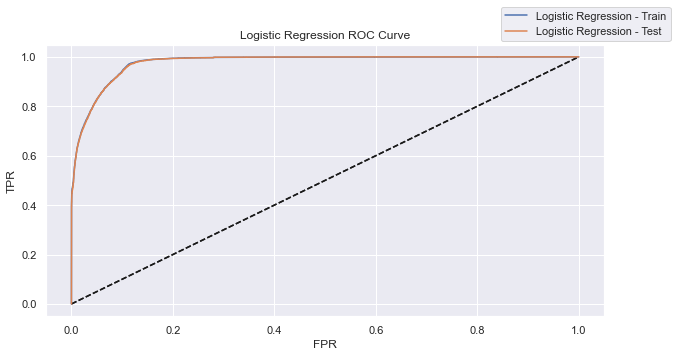

In [185]:
log_reg = LogisticRegression(class_weight='balanced',random_state=3)

log_reg.fit(X_train_f, y_train_f)

y_test_f_pred = log_reg.predict(X_test_f)
y_train_f_pred = log_reg.predict(X_train_f)

print("========================== Logistic Regression - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(log_reg.score(X_train_f, y_train_f)))
print("Test Accuracy: %0.3f"%(log_reg.score(X_test_f, y_test_f)))
print("=====================================================")
# Cross validation
from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_log_reg = cross_val_score(log_reg, X_train_f, y_train_f, cv=5, scoring='roc_auc')
for i in range(len(cv_results_log_reg)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_log_reg[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_log_reg)))
print("=====================================================")

# Performance Metrices
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test_f, y_test_f_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train_f, y_train_f_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test_f, y_test_f_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train_f, y_train_f_pred))

y_test_f_pred_prob = log_reg.predict_proba(X_test_f)[:,1]
y_train_f_pred_prob = log_reg.predict_proba(X_train_f)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train_f, y_train_f_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test_f, y_test_f_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test_f, y_test_f_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train_f, y_train_f_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Logistic Regression ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Logistic Regression - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier

========================== Random Forest - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 1.000
Test Accuracy: 0.992
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.998
Fold - 2
CV Score = 0.998
Fold - 3
CV Score = 0.998
Fold - 4
CV Score = 0.998
Fold - 5
CV Score = 0.998
Average 5-Fold CV Score: 0.998
===================== Model Perandom_formance Metrices ===========================
Test Confusion Matrix: 
[[33492    62]
 [  298 10491]]
Train Confusion Matrix: 
[[134215      0]
 [     2  43152]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     33554
           1       0.99      0.97      0.98     10789

    accuracy                           0.99     44343
   macro avg       0.99      0.99      0.99     44343
weighted avg       0.99      0.99      0.99     44343

Train Classificati

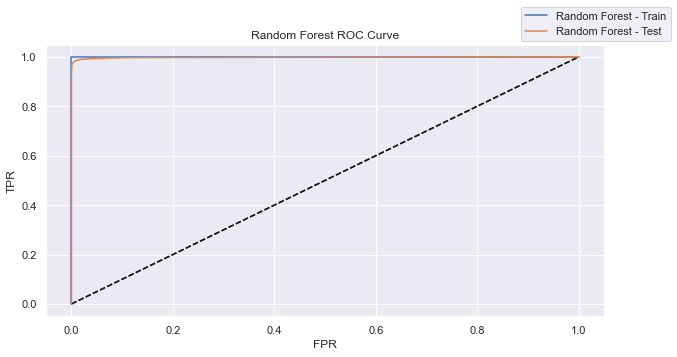

In [195]:
random_f = RandomForestClassifier(class_weight='balanced',random_state=2)

random_f.fit(X_train_f, y_train_f)

y_test_f_pred = random_f.predict(X_test_f)
y_train_f_pred = random_f.predict(X_train_f)

print("========================== Random Forest - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(random_f.score(X_train_f, y_train_f)))
print("Test Accuracy: %0.3f"%(random_f.score(X_test_f, y_test_f)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_random_f = cross_val_score(random_f, X_train_f, y_train_f, cv=5, scoring='roc_auc')
for i in range(len(cv_results_random_f)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_random_f[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_random_f)))
print("=====================================================")

# Perandom_formance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Perandom_formance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test_f, y_test_f_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train_f, y_train_f_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test_f, y_test_f_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train_f, y_train_f_pred))

y_test_f_pred_prob = random_f.predict_proba(X_test_f)[:,1]
y_train_f_pred_prob = random_f.predict_proba(X_train_f)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train_f, y_train_f_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test_f, y_test_f_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test_f, y_test_f_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train_f, y_train_f_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Random Forest ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Random Forest - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

### Bias-Variance Trade-off
**Articles on Bias-Variance**
1. https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/
2. https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

**Articles on Random Forest Overfitting**
1. https://crunchingthedata.com/random-forest-overfitting/
2. https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09

In [201]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1,6 ,1):
    vals.append(k)
    rf = RandomForestClassifier(max_depth=k, class_weight='balanced',random_state=2)
    rf.fit(X_train_f, y_train_f)
    
    tr_score = roc_auc_score(y_train_f, rf.predict_proba(X_train_f)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test_f, rf.predict_proba(X_test_f)[:,1])
    test_score.append(te_score)

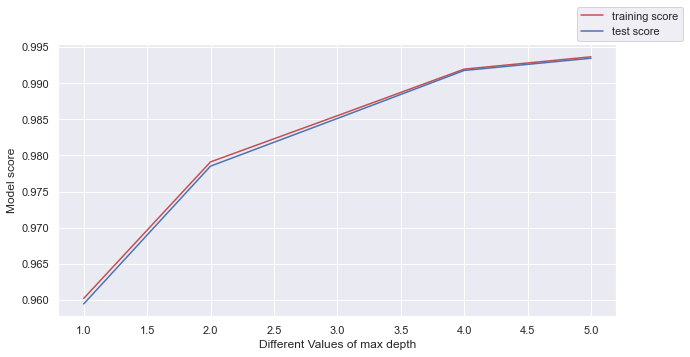

In [202]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [203]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(2,6 ,1):
    vals.append(k)
    rf = RandomForestClassifier(max_leaf_nodes=k, class_weight='balanced',max_depth=3,random_state=2)
    rf.fit(X_train_f, y_train_f)
    
    tr_score = roc_auc_score(y_train_f, rf.predict_proba(X_train_f)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test_f, rf.predict_proba(X_test_f)[:,1])
    test_score.append(te_score)

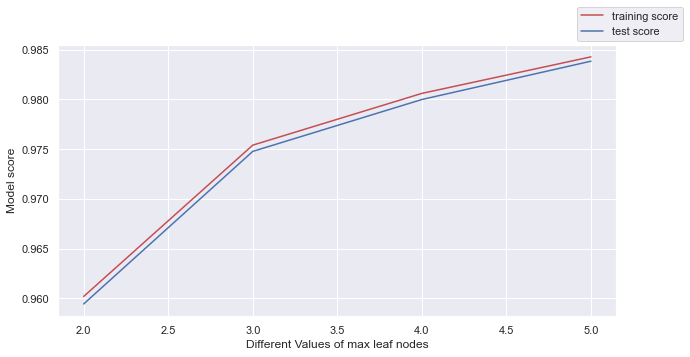

In [204]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max leaf nodes')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [216]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(2,6 ,1):
    vals.append(k)
    rf = RandomForestClassifier(min_samples_split=k, class_weight='balanced',max_depth=3,random_state=2)
    rf.fit(X_train_f, y_train_f)
    
    tr_score = roc_auc_score(y_train_f, rf.predict_proba(X_train_f)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test_f, rf.predict_proba(X_test_f)[:,1])
    test_score.append(te_score)

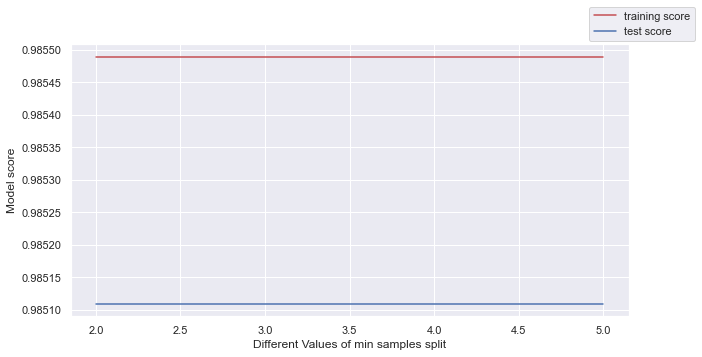

In [217]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of min samples split')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [207]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(10,130,15):
    vals.append(k)
    rf = RandomForestClassifier(n_estimators=k, class_weight='balanced',max_depth=4,random_state=2)
    rf.fit(X_train_f, y_train_f)
    
    tr_score = roc_auc_score(y_train_f, rf.predict_proba(X_train_f)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test_f, rf.predict_proba(X_test_f)[:,1])
    test_score.append(te_score)

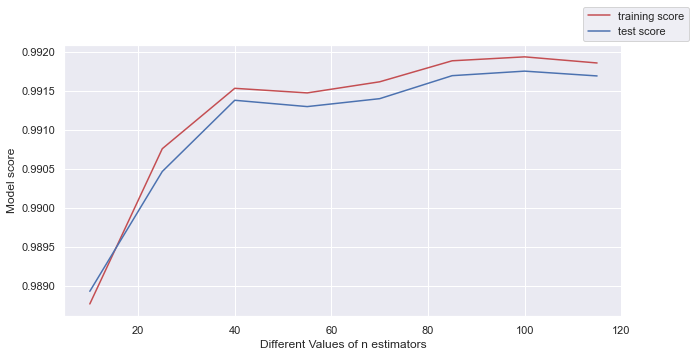

In [208]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of n estimators')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

## Hyperparameter Tuning
- Identify the model with more stable performance - in the abobe case it is Light GBM
- Understand the difference between parameter and hyperparameter
  - https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac
  - https://towardsdatascience.com/model-parameters-and-hyperparameters-in-machine-learning-what-is-the-difference-702d30970f6#:~:text=Model%20Parameters%3A%20These%20are%20the,a%20model%20with%20optimal%20performance.
- Define a dictionary of hyperparameters
- Perform GridSearch/ RandomizedSearch Cross Validation and identify the best hyperparameter combination
  - **GridSearchCV Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

**Light GBM Documentation** - Please go through it and understand different parameters
- https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [373]:
from sklearn.model_selection import GridSearchCV

In [374]:
params_rf = {'max_depth': [3,4,5],
               'max_leaf_nodes':[3,4],
               'n_estimators':[70,85,100]
              }

In [375]:
grid_rf = GridSearchCV(estimator  =rf ,
                         param_grid = params_rf,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [376]:
grid_rf.fit(X_train_f, y_train_f)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=2),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_leaf_nodes': [3, 4],
                         'min_samples_split': [3, 4],
                         'n_estimators': [70, 85, 100]},
             scoring='roc_auc', verbose=True)

In [377]:
print("Best Hyperparameters: \n", grid_rf.best_params_)
print("Best AUC Score: \n", grid_rf.best_score_)

Best Hyperparameters: 
 {'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 3, 'n_estimators': 85}
Best AUC Score: 
 0.9807017806628004


In [378]:
# Save the best combination of parameters as best model
best_model = grid_rf.best_estimator_

========================== Random Forest - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.914
Test Accuracy: 0.915
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.981
Fold - 2
CV Score = 0.978
Fold - 3
CV Score = 0.977
Fold - 4
CV Score = 0.979
Fold - 5
CV Score = 0.976
Average 5-Fold CV Score: 0.979
===================== Model Perandom_forestformance Metrices ===========================
Test Confusion Matrix: 
[[30384  3170]
 [  618 10171]]
Train Confusion Matrix: 
[[121372  12843]
 [  2490  40664]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     33554
           1       0.76      0.94      0.84     10789

    accuracy                           0.91     44343
   macro avg       0.87      0.92      0.89     44343
weighted avg       0.93      0.91      0.92     44343

Train Classi

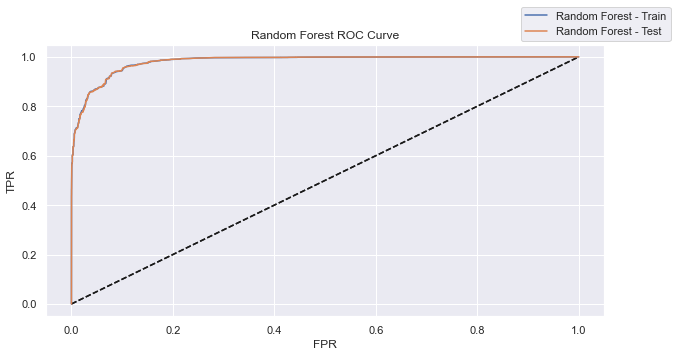

In [198]:
random_forestf = RandomForestClassifier(class_weight='balanced', max_depth=3 ,max_leaf_nodes= 4, min_samples_split= 3, n_estimators= 85)

random_forestf.fit(X_train_f, y_train_f)

y_test_f_pred = random_forestf.predict(X_test_f)
y_train_f_pred = random_forestf.predict(X_train_f)

print("========================== Random Forest - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(random_forestf.score(X_train_f, y_train_f)))
print("Test Accuracy: %0.3f"%(random_forestf.score(X_test_f, y_test_f)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_random_forestf = cross_val_score(random_forestf, X_train_f, y_train_f, cv=5, scoring='roc_auc')
for i in range(len(cv_results_random_forestf)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_random_forestf[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_random_forestf)))
print("=====================================================")

# Perandom_forestformance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Perandom_forestformance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test_f, y_test_f_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train_f, y_train_f_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test_f, y_test_f_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train_f, y_train_f_pred))

y_test_f_pred_prob = random_forestf.predict_proba(X_test_f)[:,1]
y_train_f_pred_prob = random_forestf.predict_proba(X_train_f)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train_f, y_train_f_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test_f, y_test_f_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test_f, y_test_f_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train_f, y_train_f_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Random Forest ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Random Forest - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

### Saving the best model

In [188]:
import pickle

In [189]:
with open('logistic_pkl_1', 'wb') as files:
    pickle.dump(log_reg, files)

In [190]:
# load saved model
with open('logistic_pkl_1' , 'rb') as f:
    logistic= pickle.load(f)
    

### Saving the best model

In [199]:
 import pickle

In [200]:
with open('random_final_pkl_1', 'wb') as files:
    pickle.dump(random_forestf, files)

In [201]:
# load saved model
with open('random_final_pkl_1' , 'rb') as f:
    random_forest= pickle.load(f)

### Saving the best model

In [202]:
 import pickle

In [203]:
with open('lg_pkl_1', 'wb') as files:
    pickle.dump(ligh_gbm, files)

In [204]:
# load saved model
with open('lg_pkl_1' , 'rb') as f:
    lgbm_model= pickle.load(f)

# Step 5: Model Scoring & Business KPIs
### We will score the model with Validation Data
- Get the Validation data and create only those features that were used in the model (Top_Feat)
- Perform all the pre-processing steps like imputation, scaling etc using numbers from development sample
- Score the model and report the Performance KPIs

In [205]:
raw_feat

Index(['member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'total_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'acc_now_delinq', 'total_pymnt', 'annual_inc', 'label'],
      dtype='object')

In [206]:
# Keeping only raw features
val_score = val[['member_id','label','funded_amnt','purpose','installment','total_pymnt','issue_d','last_credit_pull_d','last_pymnt_d','last_pymnt_amnt','term','recoveries','total_rec_late_fee','int_rate']]

In [207]:
dev_stat = pd.read_csv("Development_Statistics1.csv")
num_feat = list(dev_stat['Variable'])

In [208]:
dev_woe = pd.read_csv("Development_WOE1.csv")

In [209]:
num_feat=['total_pymnt', 'recoveries', 'last_pymnt_amnt', 'funded_amnt', 'installment','total_rec_late_fee','int_rate']
cat_feat=['purpose','issue_d','last_credit_pull_d','last_pymnt_d','term']

In [210]:
vif_list

['last_pymnt_amnt_woe',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'derived_outliers_derived_duration_n',
 'installment_woe',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [211]:
val_score['derived_total_payment']= np.log2(val_score['total_pymnt'])
val_score['derived_total_payment'].replace([np.inf, -np.inf],np.nan, inplace=True)

In [212]:
val_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55428 entries, 358351 to 173077
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   member_id              55428 non-null  int64  
 1   label                  55428 non-null  int64  
 2   funded_amnt            55428 non-null  int64  
 3   purpose                55428 non-null  object 
 4   installment            55428 non-null  float64
 5   total_pymnt            55428 non-null  float64
 6   issue_d                55428 non-null  object 
 7   last_credit_pull_d     55424 non-null  object 
 8   last_pymnt_d           55248 non-null  object 
 9   last_pymnt_amnt        55428 non-null  float64
 10  term                   55428 non-null  object 
 11  recoveries             55428 non-null  float64
 12  total_rec_late_fee     55428 non-null  float64
 13  int_rate               55428 non-null  float64
 14  derived_total_payment  55337 non-null  float64
d

In [213]:
date_columns = [
    'issue_d', 
      'last_pymnt_d', 
    'last_credit_pull_d']
# format dates
for col in date_columns:
    val_score.loc[:, col] = pd.to_datetime(val_score[col])

In [214]:
val_score['derived_credit_pull_after_last_pay'] = (val_score['last_credit_pull_d'] - val_score['last_pymnt_d']).dt.days
val_score['derived_credit_pull_after_last_pay'] = np.where(val_score['derived_credit_pull_after_last_pay'] > 0, 1, 0)

In [215]:
val_score['derived_duration'] = np.round((val_score['last_pymnt_d'] - val_score['issue_d']).dt.days / 31)

In [216]:
val_score

,member_id,label,funded_amnt,purpose,installment,total_pymnt,issue_d,last_credit_pull_d,last_pymnt_d,last_pymnt_amnt,term,recoveries,total_rec_late_fee,int_rate,derived_total_payment,derived_credit_pull_after_last_pay,derived_duration
358351,22391027,0,2500,other,84.23,2881.56000,2014-01-07,2015-01-12,2015-01-12,1533.88,36 months,0.0,0.0,12.99,11.492634,0,12.0
316150,28350383,0,2000,debt_consolidation,61.29,2137.07000,2014-01-08,2015-01-12,2015-01-12,1279.01,36 months,0.0,0.0,6.49,11.061418,0,12.0
377370,19827652,0,14000,credit_card,446.31,14839.26000,2014-01-06,2015-01-06,2015-01-02,11715.09,36 months,0.0,0.0,9.17,13.857132,1,12.0
152804,5024000,0,15000,debt_consolidation,499.08,16981.74870,2013-01-04,2016-01-01,2014-01-08,9497.25,36 months,0.0,0.0,12.12,14.051697,1,12.0
22008,814994,0,7000,debt_consolidation,239.55,8621.63000,2010-01-12,2016-01-01,2014-01-01,252.83,36 months,0.0,0.0,14.09,13.073745,1,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15366,945526,0,10625,credit_card,289.60,15930.53217,2011-01-05,2015-01-12,2014-01-04,6099.31,60 months,0.0,0.0,21.36,13.959507,1,35.0
273729,34611296,0,15000,credit_card,352.85,16043.07000,2014-01-10,2016-01-01,2015-01-04,14290.90,60 months,0.0,0.0,14.49,13.969663,1,12.0
609294,64273035,0,25200,debt_consolidation,791.78,25625.30000,2015-01-09,2015-01-11,2015-01-11,24856.42,36 months,0.0,0.0,8.18,14.645281,0,0.0
640064,59701957,0,10400,debt_consolidation,299.13,10881.60000,2015-01-08,2015-01-11,2015-01-10,10610.19,60 months,0.0,0.0,23.99,13.409603,1,0.0


In [217]:
# calculate third quantile loan amounts for each group in purpose category

if (val_score['purpose']=='car').any():
    median=10000
elif (val_score['purpose']=="credit_card").any():
    median=18825
elif (val_score['purpose']=="debt_consolidation").any():
    median=20000 
elif (val_score['purpose']=='educational').any():
    median=9000
elif (val_score['purpose']=='home_improvement').any():
    median=20000
elif (val_score['purpose']=='house').any():
    median=21000
elif (val_score['purpose']=='major_purchase').any():
    median=13525
elif (val_score['purpose']=='medical').any():
    median=12000
elif (val_score['purpose']=='moving').any():
    median=10000
elif (val_score['purpose']=='renewable_energy').any():
    median=12525
elif (val_score['purpose']=='small_business').any():
    median=20468.75
elif (val_score['purpose']=='vacation').any():
    median=8000
elif (val_score['purpose']=='wedding').any():
    median=13200
else:
    median=12000
val_score['derived_overfunding'] = val_score['funded_amnt'] -median

In [219]:
dev_final

,Unnamed: 0,member_id,loan_amnt,funded_amnt,int_rate,grade,sub_grade,emp_length,dti,delinq_2yrs,pub_rec,total_rec_late_fee,recoveries,acc_now_delinq,label,derived_overfunding,derived_funded_amount&purpose,derived_credit_pull_after_last_pay,derived_issue_date,derived_total_payment,derived_term_b,derived_subgrade_b,derived_purpose_b,derived_home_b,derived_delinq_b,derived_inquiry_b,derived_outliers_installment_n,derived_outliers_inq_last_6mths_n,derived_outliers_total_acc_n,derived_outliers_revol_bal_n,derived_outliers_revol_util_n,derived_outliers_last_pymnt_amnt_n,derived_outliers_total_pymnt_n,derived_outliers_annual_inc_n,derived_outliers_derived_duration_n,derived_outliers_derived_pay_gap_n,derived_outliers_derived_gap_n,derived_outliers_derived_credit_line_n,derived_outliers_int_rate_b,derived_outliers_installment_b,derived_outliers_dti_b,derived_outliers_inq_last_6mths_b,derived_outliers_total_acc_b,derived_outliers_revol_bal_b,derived_outliers_revol_util_b,derived_outliers_last_pymnt_amnt_b,derived_outliers_total_pymnt_b,derived_outliers_annual_inc_b,derived_outliers_derived_overfunding_b,derived_outliers_derived_funded_amount&purpose_b,derived_outliers_derived_duration_b,derived_outliers_derived_pay_gap_b,derived_outliers_derived_gap_b,derived_outliers_derived_total_payment_b,derived_outliers_derived_credit_line_b,term_ 60 months,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,total_pymnt_woe,purpose_woe,revol_bal_woe,loan_amnt_woe,grade_woe,last_pymnt_amnt_woe,recoveries_woe,dti_woe,revol_util_woe,annual_inc_woe,int_rate_woe,funded_amnt_woe,term_woe,installment_woe,sub_grade_woe
0,0,8723970,8875,8875,15.22,2,12,1.0,16.23,0.0,0.0,0.00,0.0,0.0,0,-9950.0,-3125.0,1,0.0,13.379997,0,1,0,1,0,0,308.62,0.0,13.0,5589.0,67.3,4797.44,10660.573530,31200.0,23.0,3562.313530,71.0,-2921.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.776936,-0.192315,0.000408,-0.224629,0.108373,-3.928858,0.0,-0.056134,0.176007,0.212628,0.037587,-0.225772,-0.238345,0.031231,0.009896
1,1,12520056,28000,28000,13.98,2,10,5.0,8.41,0.0,0.0,65.12,0.0,0.0,0,9175.0,16000.0,0,1.0,15.056312,0,0,0,0,0,0,651.23,0.0,38.0,38948.5,51.8,22350.17,34072.310000,150000.0,12.0,24237.985520,200.0,-6580.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.726650,-0.192315,-0.047844,0.349409,0.108373,-5.662761,0.0,-0.343271,0.014901,-0.264784,0.037587,0.348512,0.637255,0.184635,0.009896
2,2,925462,6000,6000,11.11,1,9,5.0,24.80,0.0,0.0,0.00,0.0,0.0,0,-12825.0,-6000.0,1,0.0,12.788789,0,0,0,1,0,0,196.75,2.5,26.0,8612.0,69.7,226.74,7076.346085,45000.0,35.0,190.096085,118.0,-4751.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.071415,-0.192315,0.000408,-0.224629,-0.467188,1.267931,0.0,0.214843,0.176007,0.067366,-0.450070,-0.225772,-0.238345,-0.210343,-0.467188
3,3,30955815,12000,12000,16.99,3,17,10.0,23.72,0.0,1.0,0.00,0.0,0.0,0,-8687.5,-800.0,1,1.0,13.689091,0,1,1,1,0,0,298.17,0.0,16.0,14544.0,79.9,11418.67,13207.690000,75000.0,12.0,9629.650000,153.0,-5116.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.776936,0.200535,0.041550,-0.032098,0.482420,-5.662761,0.0,0.214843,0.176007,-0.093650,0.477317,-0.032669,0.637255,0.031231,0.350462
4,4,414634,6000,6000,14.74,3,17,10.0,4.96,0.0,0.0,0.00,0.0,0.0,0,-14000.0,-6500.0,0,1.0,12.847654,0,1,1,0,0,0,207.23,2.0,31.0,3402.0,47.9,1780.33,7371.050000,100824.0,24.0,2397.530000,130.0,-4750.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.071415,0.062517,-0.049319,-0.224629,0.482420,1.267931,0.0,-0.343271,0.014901,-0.264784,0.037587,-0.225772,-0.238345,-0.210343,0.350462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [220]:
  # for derived_total_pymnt
q1 = dev_final['derived_total_payment'].quantile(0.25)
q3 = dev_final['derived_total_payment'].quantile(0.75)
        
iqr = q3 - q1
        
upper_whisker = q3 + (1.5*iqr)
lower_whisker = q1 - (1.5*iqr)


In [221]:
upper_whisker

16.55291367586993

In [222]:
lower_whisker

10.100927392110323

In [223]:
# for derived_last_pymnt_amnt_n
q1 = dev['last_pymnt_amnt'].quantile(0.25)
q3 = dev['last_pymnt_amnt'].quantile(0.75)
        
iqr = q3 - q1
        
upper_whisker1 = q3 + (1.5*iqr)
lower_whisker1 = q1 - (1.5*iqr)

In [224]:
upper_whisker1

22661.10125

In [225]:
lower_whisker1

-12923.90875

In [226]:
# for derived_outliers_derived_duration_b
q1 = data0['derived_duration'].quantile(0.25)
q3 = data0['derived_duration'].quantile(0.75)
        
iqr = q3 - q1
        
upper_whisker2 = q3 + (1.5*iqr)
lower_whisker2 = q1 - (1.5*iqr)

In [227]:
upper_whisker2

42.0

In [228]:
lower_whisker2

-6.0

In [229]:
# for derived_total_pymnt
q1 = data0['derived_pay_gap'].quantile(0.25)
q3 = data0['derived_pay_gap'].quantile(0.75)
        
iqr = q3 - q1
        
upper_whisker3 = q3 + (1.5*iqr)
lower_whisker3 = q1 - (1.5*iqr)

In [230]:
upper_whisker3

24237.985519999995

In [231]:
lower_whisker3

-13559.869199999997

In [232]:
# calculate total sceduled payment 
total_scheduled_pay = val_score['installment'] * val_score['derived_duration']

# calculate the payment gap between actual and scheduled 
val_score['derived_pay_gap'] = val_score['total_pymnt'] - total_scheduled_pay

In [233]:

 val_score['derived_outliers_derived_pay_gap_b'] = np.where((val_score['derived_pay_gap']>upper_whisker3) | (val_score['derived_pay_gap']<lower_whisker3), 1,0)    

In [234]:
 val_score['derived_outliers_derived_total_payment_b'] = np.where((val_score['derived_total_payment']>upper_whisker3) | (val_score['derived_total_payment']<lower_whisker3), 1,0)    

In [235]:
val_score['derived_outliers_last_pymnt_amnt_b'] = np.where((val_score['last_pymnt_amnt']>upper_whisker1) | (val_score['last_pymnt_amnt']<lower_whisker1), 1,0)    

In [236]:
val_score['derived_outliers_derived_duration_n'] = np.where(val_score['derived_duration']>upper_whisker2, upper_whisker2,np.where(val_score['derived_duration']<lower_whisker2, lower_whisker2, val_score['derived_duration']))

In [237]:
val_score

,member_id,label,funded_amnt,purpose,installment,total_pymnt,issue_d,last_credit_pull_d,last_pymnt_d,last_pymnt_amnt,term,recoveries,total_rec_late_fee,int_rate,derived_total_payment,derived_credit_pull_after_last_pay,derived_duration,derived_overfunding,derived_pay_gap,derived_outliers_derived_pay_gap_b,derived_outliers_derived_total_payment_b,derived_outliers_last_pymnt_amnt_b,derived_outliers_derived_duration_n
358351,22391027,0,2500,other,84.23,2881.56000,2014-01-07,2015-01-12,2015-01-12,1533.88,36 months,0.0,0.0,12.99,11.492634,0,12.0,-7500,1870.80000,0,0,0,12.0
316150,28350383,0,2000,debt_consolidation,61.29,2137.07000,2014-01-08,2015-01-12,2015-01-12,1279.01,36 months,0.0,0.0,6.49,11.061418,0,12.0,-8000,1401.59000,0,0,0,12.0
377370,19827652,0,14000,credit_card,446.31,14839.26000,2014-01-06,2015-01-06,2015-01-02,11715.09,36 months,0.0,0.0,9.17,13.857132,1,12.0,4000,9483.54000,0,0,0,12.0
152804,5024000,0,15000,debt_consolidation,499.08,16981.74870,2013-01-04,2016-01-01,2014-01-08,9497.25,36 months,0.0,0.0,12.12,14.051697,1,12.0,5000,10992.78870,0,0,0,12.0
22008,814994,0,7000,debt_consolidation,239.55,8621.63000,2010-01-12,2016-01-01,2014-01-01,252.83,36 months,0.0,0.0,14.09,13.073745,1,47.0,-3000,-2637.22000,0,0,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15366,945526,0,10625,credit_card,289.60,15930.53217,2011-01-05,2015-01-12,2014-01-04,6099.31,60 months,0.0,0.0,21.36,13.959507,1,35.0,625,5794.53217,0,0,0,35.0
273729,34611296,0,15000,credit_card,352.85,16043.07000,2014-01-10,2016-01-01,2015-01-04,14290.90,60 months,0.0,0.0,14.49,13.969663,1,12.0,5000,11808.87000,0,0,0,12.0
609294,64273035,0,25200,debt_consolidation,791.78,25625.30000,2015-01-09,2015-01-11,2015-01-11,24856.42,36 months,0.0,0.0,8.18,14.645281,0,0.0,15200,25625.30000,1,0,1,0.0
640064,59701957,0,10400,debt_consolidation,299.13,10881.60000,2015-01-08,2015-01-11,2015-01-10,10610.19,60 months,0.0,0.0,23.99,13.409603,1,0.0,400,10881.60000,0,0,0,0.0


In [238]:
val_score_woe = sc.woebin_ply(val_score, dev_woe)

[INFO] converting into woe values ...


In [239]:
woe_feat_val = [i for i in val_score_woe.columns if i.endswith('_woe') or i in (['member_id'])]

In [240]:
woe_feat_val

['member_id',
 'total_pymnt_woe',
 'last_pymnt_amnt_woe',
 'int_rate_woe',
 'term_woe',
 'installment_woe']

In [241]:
vif_list

['last_pymnt_amnt_woe',
 'total_pymnt_woe',
 'recoveries',
 'derived_total_payment',
 'derived_credit_pull_after_last_pay',
 'derived_outliers_derived_duration_n',
 'installment_woe',
 'derived_outliers_derived_total_payment_b',
 'derived_outliers_last_pymnt_amnt_b',
 'int_rate_woe',
 'term_woe',
 'total_rec_late_fee',
 'derived_overfunding',
 'derived_outliers_derived_pay_gap_b']

In [242]:
score_data = pd.merge(val_score[['member_id','label','derived_outliers_derived_pay_gap_b','derived_overfunding',
                                 'total_rec_late_fee','derived_outliers_last_pymnt_amnt_b','derived_outliers_derived_total_payment_b',
                                 'derived_outliers_derived_duration_n','derived_credit_pull_after_last_pay',
                                 'derived_total_payment','recoveries']], val_score_woe[woe_feat_val], on='member_id', how='left')

In [243]:
val_score_woe[woe_feat_val]

,member_id,total_pymnt_woe,last_pymnt_amnt_woe,int_rate_woe,term_woe,installment_woe
0,1296599,1.086432,1.267931,-0.450070,-0.238345,-0.210343
1,1314167,2.633871,1.267931,0.037587,0.637255,-0.342469
2,1313524,1.086432,1.267931,0.037587,-0.238345,-0.342469
3,1277178,-0.776936,1.267931,0.037587,-0.238345,0.031231
16,1299699,-0.776936,1.267931,0.037587,-0.238345,0.031231
...,...,...,...,...,...,...
887189,40413110,-1.726650,-5.662761,0.037587,-0.238345,0.184635
887290,39940303,0.071415,1.267931,0.877977,0.637255,0.184635
887332,39959868,-1.726650,-5.662761,-0.450070,-0.238345,0.031231
887346,39560970,0.071415,-3.928858,-0.450070,-0.238345,-0.210343


In [244]:
score_data

,member_id,label,derived_outliers_derived_pay_gap_b,derived_overfunding,total_rec_late_fee,derived_outliers_last_pymnt_amnt_b,derived_outliers_derived_total_payment_b,derived_outliers_derived_duration_n,derived_credit_pull_after_last_pay,derived_total_payment,recoveries,total_pymnt_woe,last_pymnt_amnt_woe,int_rate_woe,term_woe,installment_woe
0,22391027,0,0,-7500,0.0,0,0,12.0,0,11.492634,0.0,1.086432,1.267931,-0.450070,-0.238345,-0.342469
1,28350383,0,0,-8000,0.0,0,0,12.0,0,11.061418,0.0,1.086432,1.267931,-1.385219,-0.238345,-0.342469
2,19827652,0,0,4000,0.0,0,0,12.0,1,13.857132,0.0,-0.776936,-5.662761,-0.450070,-0.238345,0.031231
3,5024000,0,0,5000,0.0,0,0,12.0,1,14.051697,0.0,-1.726650,-5.662761,-0.450070,-0.238345,0.031231
4,814994,0,0,-3000,0.0,0,0,42.0,1,13.073745,0.0,0.071415,1.267931,0.037587,-0.238345,-0.210343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55423,945526,0,0,625,0.0,0,0,35.0,1,13.959507,0.0,-0.776936,-5.662761,0.877977,0.637255,0.031231
55424,34611296,0,0,5000,0.0,0,0,12.0,1,13.969663,0.0,-1.726650,-5.662761,0.037587,0.637255,0.031231
55425,64273035,0,1,15200,0.0,1,0,0.0,0,14.645281,0.0,-1.726650,-5.662761,-0.450070,-0.238345,0.184635
55426,59701957,0,0,400,0.0,0,0,0.0,1,13.409603,0.0,-0.776936,-5.662761,0.877977,0.637255,0.031231


In [245]:
score_data=score_data.dropna(axis=0)

In [246]:
score_data.columns

Index(['member_id', 'label', 'derived_outliers_derived_pay_gap_b',
       'derived_overfunding', 'total_rec_late_fee',
       'derived_outliers_last_pymnt_amnt_b',
       'derived_outliers_derived_total_payment_b',
       'derived_outliers_derived_duration_n',
       'derived_credit_pull_after_last_pay', 'derived_total_payment',
       'recoveries', 'total_pymnt_woe', 'last_pymnt_amnt_woe', 'int_rate_woe',
       'term_woe', 'installment_woe'],
      dtype='object')

In [247]:
score_feat=[ 'derived_outliers_derived_pay_gap_b',
       'derived_overfunding', 'total_rec_late_fee',
     'derived_outliers_last_pymnt_amnt_b',
       'derived_outliers_derived_total_payment_b',
       'derived_outliers_derived_duration_n',
       'derived_credit_pull_after_last_pay', 'derived_total_payment',
       'recoveries','int_rate_woe', 'total_pymnt_woe', 'last_pymnt_amnt_woe',
       'installment_woe','int_rate_woe']

In [248]:
score_data.isnull().sum()

member_id                                   0
label                                       0
derived_outliers_derived_pay_gap_b          0
derived_overfunding                         0
total_rec_late_fee                          0
derived_outliers_last_pymnt_amnt_b          0
derived_outliers_derived_total_payment_b    0
derived_outliers_derived_duration_n         0
derived_credit_pull_after_last_pay          0
derived_total_payment                       0
recoveries                                  0
total_pymnt_woe                             0
last_pymnt_amnt_woe                         0
int_rate_woe                                0
term_woe                                    0
installment_woe                             0
dtype: int64

In [249]:
score_data=score_data.drop(['member_id'],axis=1)

In [250]:
val_x=score_data.drop(['label'],axis=1)

In [251]:
val_y=score_data['label']

In [252]:
val_x.shape

(55246, 14)

In [253]:
val_y.shape

(55246,)

## Loop

In [258]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

import scorecardpy as sc
import pickle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# # load saved model
# with open('logr_pkl_1' , 'rb') as f:
#     lr= pickle.load(f)



In [259]:
def scoring(val_score, dev_woe):
    val_score['derived_total_payment']= np.log2(val_score['total_pymnt'])
    val_score['derived_total_payment'].replace([np.inf, -np.inf],np.nan, inplace=True)
    date_columns = [
    'issue_d', 
    'last_pymnt_d', 
    'last_credit_pull_d']
     # format dates
    for col in date_columns:
        val_score.loc[:, col] = pd.to_datetime(val_score[col])
    val_score['derived_credit_pull_after_last_pay'] = (val_score['last_credit_pull_d'] - val_score['last_pymnt_d']).dt.days
    val_score['derived_credit_pull_after_last_pay'] = np.where(val_score['derived_credit_pull_after_last_pay'] > 0, 1, 0)
    val_score['derived_duration'] = np.round((val_score['last_pymnt_d'] - val_score['issue_d']).dt.days / 31)
    if (val_score['purpose']=='car').any():
        median=10000
    elif (val_score['purpose']=="credit_card").any():
        median=18825
    elif (val_score['purpose']=="debt_consolidation").any():
        median=20000 
    elif (val_score['purpose']=='educational').any():
        median=9000
    elif (val_score['purpose']=='home_improvement').any():
        median=20000
    elif (val_score['purpose']=='house').any():
        median=21000
    elif (val_score['purpose']=='major_purchase').any():
        median=13525
    elif (val_score['purpose']=='medical').any():
        median=12000
    elif (val_score['purpose']=='moving').any():
        median=10000
    elif (val_score['purpose']=='renewable_energy').any():
        median=12525
    elif (val_score['purpose']=='small_business').any():
        median=20468.75
    elif (val_score['purpose']=='vacation').any():
        median=8000
    elif (val_score['purpose']=='wedding').any():
        median=13200
    else:
        median=12000
    val_score['derived_overfunding'] = val_score['funded_amnt'] -median
    # calculate total sceduled payment 
    total_scheduled_pay = val_score['installment'] * val_score['derived_duration']

# calculate the payment gap between actual and scheduled 
    val_score['derived_pay_gap'] = val_score['total_pymnt'] - total_scheduled_pay
    val_score['derived_outliers_derived_total_payment_b'] = np.where((val_score['derived_total_payment']>upper_whisker3) | (val_score['derived_total_payment']<lower_whisker3), 1,0)    
    val_score['derived_outliers_last_pymnt_amnt_b'] = np.where((val_score['last_pymnt_amnt']>upper_whisker1) | (val_score['last_pymnt_amnt']<lower_whisker1), 1,0)    
    val_score['derived_outliers_derived_duration_n'] = np.where(val_score['derived_duration']>upper_whisker2, upper_whisker2,np.where(val_score['derived_duration']<lower_whisker2, lower_whisker2, val_score['derived_duration']))
    val_score['derived_outliers_derived_pay_gap_b'] = np.where((val_score['derived_pay_gap']>upper_whisker3) | (val_score['derived_pay_gap']<lower_whisker3), 1,0)  
    val_score_woe = sc.woebin_ply(val_score, dev_woe)
    woe_feat_val = [i for i in val_score_woe.columns if i.endswith('_woe') or i in (['member_id'])]
    score_data_l = pd.merge(val_score[['member_id','label','derived_outliers_derived_pay_gap_b','derived_overfunding',
                                 'total_rec_late_fee','derived_outliers_last_pymnt_amnt_b','derived_outliers_derived_total_payment_b',
                                 'derived_outliers_derived_duration_n','derived_credit_pull_after_last_pay',
                                 'derived_total_payment','recoveries']], val_score_woe[woe_feat_val], on='member_id', how='left')
    score_data_l=score_data_l.dropna(axis=0)
    return(score_data_l)

In [260]:
score_data_1 = scoring(val_score, dev_woe)

[INFO] converting into woe values ...


In [261]:
score_data_1

,member_id,label,derived_outliers_derived_pay_gap_b,derived_overfunding,total_rec_late_fee,derived_outliers_last_pymnt_amnt_b,derived_outliers_derived_total_payment_b,derived_outliers_derived_duration_n,derived_credit_pull_after_last_pay,derived_total_payment,recoveries,total_pymnt_woe,last_pymnt_amnt_woe,int_rate_woe,term_woe,installment_woe
0,22391027,0,0,-7500,0.0,0,0,12.0,0,11.492634,0.0,1.086432,1.267931,-0.450070,-0.238345,-0.342469
1,28350383,0,0,-8000,0.0,0,0,12.0,0,11.061418,0.0,1.086432,1.267931,-1.385219,-0.238345,-0.342469
2,19827652,0,0,4000,0.0,0,0,12.0,1,13.857132,0.0,-0.776936,-5.662761,-0.450070,-0.238345,0.031231
3,5024000,0,0,5000,0.0,0,0,12.0,1,14.051697,0.0,-1.726650,-5.662761,-0.450070,-0.238345,0.031231
4,814994,0,0,-3000,0.0,0,0,42.0,1,13.073745,0.0,0.071415,1.267931,0.037587,-0.238345,-0.210343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55423,945526,0,0,625,0.0,0,0,35.0,1,13.959507,0.0,-0.776936,-5.662761,0.877977,0.637255,0.031231
55424,34611296,0,0,5000,0.0,0,0,12.0,1,13.969663,0.0,-1.726650,-5.662761,0.037587,0.637255,0.031231
55425,64273035,0,1,15200,0.0,1,0,0.0,0,14.645281,0.0,-1.726650,-5.662761,-0.450070,-0.238345,0.184635
55426,59701957,0,0,400,0.0,0,0,0.0,1,13.409603,0.0,-0.776936,-5.662761,0.877977,0.637255,0.031231


## Logistic model Validation Accuracy

========================== Model Validation Report =========================
================================= Accuracy =================================
===================== Model Validation Pelogisticormance Metrices ================
Validation Confusion Matrix: 
[[15969 25972]
 [ 4344  8961]]
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.38      0.51     41941
           1       0.26      0.67      0.37     13305

    accuracy                           0.45     55246
   macro avg       0.52      0.53      0.44     55246
weighted avg       0.66      0.45      0.48     55246

===================== Model Validation AUC Scores ==========================
Validation AUC Score: 0.545
===================== Model Validation AUC Curve ===========================


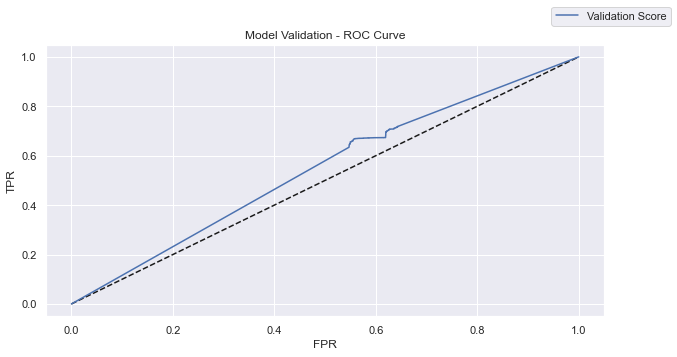

In [266]:
y_val_pred = logistic.predict(score_data[score_feat])
y_val_pred_prob = logistic.predict_proba(score_data[score_feat])[:,1]

val_accuracy = logistic.score(score_data[score_feat], score_data['label'])
auc_score = roc_auc_score(score_data['label'], y_val_pred_prob)


print("========================== Model Validation Report =========================")

print("================================= Accuracy =================================")
# print("Validation Accuracy: %0.3f"%val_accuracy)
print("============================================================================")

# Pelogisticormance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Validation Pelogisticormance Metrices ================")
print("Validation Confusion Matrix: ")
print(confusion_matrix(score_data['label'], y_val_pred))
print("============================================================================")

print("Validation Classification Report: ")
print(classification_report(score_data['label'], y_val_pred))
print("============================================================================")


print("===================== Model Validation AUC Scores ==========================")
print("Validation AUC Score: %0.3f"%auc_score)
print("============================================================================")

print("===================== Model Validation AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(score_data['label'], y_val_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Model Validation - ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Validation Score')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.show()

## Random Forest Validation Accuracy

========================== Model Validation Report =========================
================================= Accuracy =================================
===================== Model Validation Perandom_forestformance Metrices ================
Validation Confusion Matrix: 
[[ 4434 37507]
 [  179 13126]]
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.11      0.19     41941
           1       0.26      0.99      0.41     13305

    accuracy                           0.32     55246
   macro avg       0.61      0.55      0.30     55246
weighted avg       0.79      0.32      0.24     55246

===================== Model Validation AUC Scores ==========================
Validation AUC Score: 0.711
===================== Model Validation AUC Curve ===========================


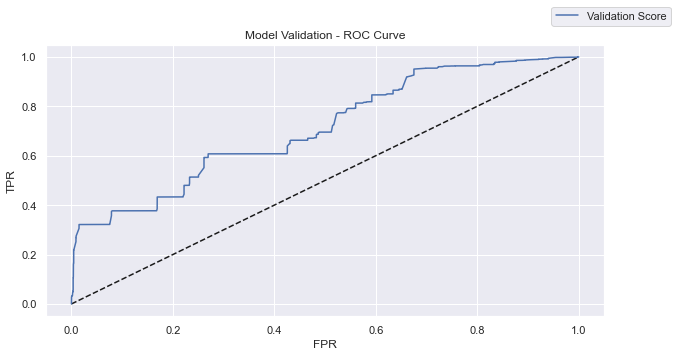

In [265]:
y_val_pred = random_forestf.predict(score_data[score_feat])
y_val_pred_prob = random_forestf.predict_proba(score_data[score_feat])[:,1]

val_accuracy = random_forestf.score(score_data[score_feat], score_data['label'])
auc_score = roc_auc_score(score_data['label'], y_val_pred_prob)


print("========================== Model Validation Report =========================")

print("================================= Accuracy =================================")
# print("Validation Accuracy: %0.3f"%val_accuracy)
print("============================================================================")

# Perandom_forestformance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Validation Perandom_forestformance Metrices ================")
print("Validation Confusion Matrix: ")
print(confusion_matrix(score_data['label'], y_val_pred))
print("============================================================================")

print("Validation Classification Report: ")
print(classification_report(score_data['label'], y_val_pred))
print("============================================================================")


print("===================== Model Validation AUC Scores ==========================")
print("Validation AUC Score: %0.3f"%auc_score)
print("============================================================================")

print("===================== Model Validation AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(score_data['label'], y_val_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Model Validation - ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Validation Score')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.show()

### Random Forest is my Final model with Roc AUC of 0.711.